Kelompok F

1. Justin Martinus
2. Kirono Dwi Saputro
3. Yudistira Dwi
4. Monica Fanggidae
5. Naufal Hafidz

#Importing the Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import requests
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
property_path = data_path / "Data-Property-Indonesia-Ganjil-2023"

# If the property folder doesn't exist, download it and prepare it...
if property_path.is_dir():
    print(f"{property_path} directory exists.")
else:
    print(f"Did not find {property_path} directory, creating one...")
    property_path.mkdir(parents=True, exist_ok=True)

    # Download data
    with open(property_path / "Data-Property-Indonesia-Ganjil-2023.xlsx", "wb") as f:
        request = requests.get("https://github.com/justin-martinus/Data-Mining-Sem5/raw/main/Dataset/Case1/Data-Property-Indonesia-Ganjil-2023.xlsx")
        print("Downloading property data...")
        f.write(request.content)



xls = pd.ExcelFile(property_path / "Data-Property-Indonesia-Ganjil-2023.xlsx")
sheet_names = xls.sheet_names
dataframes = {sheet_name: xls.parse(sheet_name) for sheet_name in sheet_names}

# Print the number of sheets
print("Number of sheets:", len(sheet_names))

# Print the names of all sheets
print("Sheet names:")
for sheet_name in sheet_names:
    print(sheet_name)

Did not find data/Data-Property-Indonesia-Ganjil-2023 directory, creating one...
Number of sheets: 15
Sheet names:
Bogor
Lampung - Sumatera selatan
Semarang
Kalimantan (All)
Depok
Tangerang
Jakarta
Bekasi
Padang - Palembang
Bandung
Medan
Surabaya
Yogyakarta
Bali
Sulawesi(All)




---

Ini adalah data property yang sudah diunduh, kemudian di-upload untuk diakses dari github untuk google colab dalam EDA kali ini

In [3]:
# Setup path to data folder
data_path = Path("data/")
province_path = data_path / "Data-Provinsi"

# If the province folder doesn't exist, download it and prepare it...
if province_path.is_dir():
    print(f"{province_path} directory exists.")
else:
    print(f"Did not find {province_path} directory, creating one...")
    province_path.mkdir(parents=True, exist_ok=True)

    # Download data
    with open(province_path / "data-infographic_bps_.xlsx", "wb") as f:
        request = requests.get("https://github.com/justin-martinus/Data-Mining-Sem5/raw/main/Dataset/Case1/data-infographic_bps_.xlsx")
        print("Downloading province data...")
        f.write(request.content)



df_prov = pd.read_excel(province_path / "data-infographic_bps_.xlsx")

Did not find data/Data-Provinsi directory, creating one...


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


---
Ada tambahan 2 data eksternal yang digunakan. Untuk yang ini adalah data umum terkait karakteristik masyrakat.

In [4]:
# Setup path to data folder
data_path = Path("data/")
salary_path = data_path / "Data-Salary"

# If the salary folder doesn't exist, download it and prepare it...
if salary_path.is_dir():
    print(f"{salary_path} directory exists.")
else:
    print(f"Did not find {salary_path} directory, creating one...")
    salary_path.mkdir(parents=True, exist_ok=True)

    # Download data
    with open(salary_path / "Indonesian Salary by Region (1997-2022).csv", "wb") as f:
        request = requests.get("https://raw.githubusercontent.com/justin-martinus/Data-Mining-Sem5/main/Dataset/Case1/Indonesian%20Salary%20by%20Region%20(1997-2022).csv")
        print("Downloading salary data...")
        f.write(request.content)



df_salary = pd.read_csv(salary_path / "Indonesian Salary by Region (1997-2022).csv")

Did not find data/Data-Salary directory, creating one...


---
Data ini adalah untuk gaji minimum dari setiap provinsi

In [5]:
# Create individual DataFrames for each sheet and name them accordingly
df_bogor = dataframes["Bogor"]
df_lampung_sumatera_selatan = dataframes["Lampung - Sumatera selatan"]
df_semarang = dataframes["Semarang"]
df_kalimantan_all = dataframes["Kalimantan (All)"]
df_depok = dataframes["Depok"]
df_tangerang = dataframes["Tangerang"]
df_jakarta = dataframes["Jakarta"]
df_bekasi = dataframes["Bekasi"]
df_padang_palembang = dataframes["Padang - Palembang"]
df_bandung = dataframes["Bandung"]
df_medan = dataframes["Medan"]
df_surabaya = dataframes["Surabaya"]
df_yogyakarta = dataframes["Yogyakarta"]
df_bali = dataframes["Bali"]
df_sulawesi_all = dataframes["Sulawesi(All)"]

---
Seluruh 15 sheets dibuat ke 15 dataframe berbeda

In [6]:
df_bali.sample(5)

created_at  LT (M2)  LB (M2)  KT  KM  garasi  carport    lokasi  \
101  2023-06-06 00:00:00    130.0     90.0   2   1     0.0      1.0    Badung   
59   2021-04-12 00:00:00    128.0    120.0   3   3     NaN      NaN    Badung   
131  2023-07-06 00:00:00    200.0    260.0   4   3     1.0      0.0    Badung   
9    2021-06-12 00:00:00    300.0    120.0   2   2     NaN      NaN  Denpasar   
109           30-05-2023    185.0    185.0   3   3     2.0      1.0  Denpasar   

    sertifikat  listrik  hadap       harga  \
101        SHM   1300.0    NaN   950000000   
59         SHM   4400.0    NaN  2400000000   
131        HGB   4400.0  Timur  1500000000   
9          SHM   2200.0    NaN  2200000000   
109        SHM   4400.0    NaN  3920000000   

                                                   URL  \
101  Rumah Ditaman Griya Jimbaran Danau Tamblingan ...   
59   https://www.rumah.com/listing-properti/dijual-...   
131  https://www.rumah123.com/properti/badung/hos13...   
9    https://www.rumah123.com/properti/denpasar/hos...   
109  Rumah Model Villa Sanur One Gate System Shm | ...   

                                            Deskripsi   
101                  Akses jalan 6 Meter mobil papasan  
59   Belakang Rs Siloam Sunset road. Miliki Hunian ...  
131                         Aset Lelang powered by BRI  
9    2 menit ke Poltekkes Denpasar,2 menit ke SMAN ...  
109  New Project Residence Cluster Mewah Di Sanur D...

In [7]:
df_prov.head()

No.        Province  No of District  No of Sub-District  No Of Village  \
0  1.0            Aceh            23.0               276.0         6445.0   
1  2.0  Sumatera Utara            33.0               417.0         5739.0   
2  3.0  Sumatera Barat            19.0               176.0         1013.0   
3  4.0            Riau            12.0               151.0         1642.0   
4  5.0           Jambi            11.0               128.0         1370.0   

          Most Dense       Least Dense  Most Populated      Least Populated  \
0         Banda Aceh         Gayo Lues      Aceh Utara          Kota Sabang   
1         Kota Medan     Pakpak Bharat      Kota Medan        Pakpak Bharat   
2  Kota Bukit Tinggi     Kep. Mentawai     Kota Padang  Kota Padang Panjang   
3     Kota Pekanbaru         Pelalawan  Kota Pekanbaru         Kep. Meranti   
4         Kota Jambi  Tj. Jabung Timur      Kota Jambi    Kota Sungai Penuh   

        Male  ...  Never atttending School  Not gradute -elementary  \
0  2248952.0  ...                     6.67                    19.05   
1  6483354.0  ...                     6.11                    19.58   
2  2404377.0  ...                     6.56                    23.54   
3  2853168.0  ...                     6.18                    20.34   
4  1581110.0  ...                     7.59                    21.40   

   Elementary  Junior  senior  vocational  Diploma  undergraduate  \
0       26.85   19.58   20.42        1.10     2.85           3.30   
1       24.96   19.78   22.18        2.49     1.79           2.96   
2       25.55   17.42   18.58        2.25     2.46           3.38   
3       28.37   18.56   19.60        1.92     2.09           2.76   
4       30.12   17.83   16.67        1.56     1.96           2.72   

   Postgraduate  Literacy rate  
0          0.18      91.759558  
1          0.15      93.655688  
2          0.25      92.320984  
3          0.18      94.214608  
4          0.15      92.428658  

[5 rows x 43 columns]

In [8]:
df_salary.head()

REGION  SALARY  YEAR
0            ACEH  128000  1997
1  SUMATERA UTARA  151000  1997
2  SUMATERA BARAT  119000  1997
3            RIAU  151500  1997
4           JAMBI  119500  1997

#Pre-Processing

##Data Wrangling and General Pre-Processing

###Columns' Consistency

In [9]:
df = pd.concat(list(dataframes.values()), ignore_index=True)
df.dtypes

created_at      object
LT              object
LB              object
KT              object
KM              object
garasi         float64
carport        float64
lokasi          object
sertifikat      object
listrik         object
hadap           object
harga          float64
URL             object
Unnamed: 13    float64
deskripsi       object
Unnamed: 15     object
harga (Rp)     float64
deskripsi       object
Created_at      object
LT (m2)        float64
LB (m2)        float64
Garasi          object
Carport         object
Lokasi          object
Sertifikat      object
Listrik         object
Hadap           object
Harga           object
Deskripsi       object
LT(m²)         float64
LB(m²)         float64
LT (M2)        float64
LB (M2)        float64
Deskripsi       object
dtype: object

---
Dapat dilihat bahwa kolom-kolom yang didapatkan memiliki beberapa nama berbeda, meskipun mereprentasikan hal yang sama sehingga butuh dibuat konsisten.

In [10]:
# Define a mapping for standard column names
column_mapping = {
    'created_at': 'Created_at',
    'LT': 'LT',
    'LB': 'LB',
    'KT': 'KT',
    'KM': 'KM',
    'garasi': 'garasi',
    'carport': 'carport',
    'lokasi': 'lokasi',
    'sertifikat': 'sertifikat',
    'listrik': 'listrik',
    'hadap': 'hadap',
    'harga': 'harga',
    'URL': 'URL',
    'deskripsi': 'deskripsi',
    'daerah': 'daerah',
    'harga (Rp)': 'harga',
    'Deskripsi': 'deskripsi',
    'LT(m²)': 'LT',
    'LB(m²)': 'LB',
    'LT (M2)': 'LT',
    'LB (M2)': 'LB',
    'Harga (Rp)': 'harga',
    'deskripsi ': 'deskripsi',
    'Deskripsi ': 'deskripsi',
    'LT (m2)': 'LT',
    'LB (m2)': 'LB',
    'Garasi': 'garasi',
    'Carport': 'carport',
    'Lokasi': 'lokasi',
    'Sertifikat': 'sertifikat',
    'Listrik': 'listrik',
    'Hadap': 'hadap',
    'Harga': 'harga'
}

# Iterate through each DataFrame and rename columns
for sheet_name, df in dataframes.items():
    df.rename(columns=column_mapping, inplace=True)

# Add a 'daerah' column to each DataFrame
for sheet_name in dataframes:
    dataframes[sheet_name]['daerah'] = sheet_name

# Combine all DataFrames into a single DataFrame
df = pd.concat(list(dataframes.values()), ignore_index=True)

# Deleting original dataframes of each sheets to save memory
del(df_bogor)
del(df_lampung_sumatera_selatan)
del(df_semarang)
del(df_kalimantan_all)
del(df_depok)
del(df_tangerang)
del(df_jakarta)
del(df_bekasi)
del(df_padang_palembang)
del(df_bandung)
del(df_medan)
del(df_surabaya)
del(df_yogyakarta)
del(df_bali)
del(df_sulawesi_all)

df.dtypes

Created_at      object
LT              object
LB              object
KT              object
KM              object
garasi          object
carport         object
lokasi          object
sertifikat      object
listrik         object
hadap           object
harga           object
URL             object
Unnamed: 13    float64
deskripsi       object
Unnamed: 15     object
daerah          object
dtype: object

###Duplicates Handling and Irrelevant Columns Drop

In [11]:
df[df.duplicated()]

Created_at   LT   LB   KT   KM garasi carport  \
1883                  NaN  NaN  NaN  NaN  NaN    NaN     NaN   
1884                  NaN  NaN  NaN  NaN  NaN    NaN     NaN   
1885                  NaN  NaN  NaN  NaN  NaN    NaN     NaN   
1886                  NaN  NaN  NaN  NaN  NaN    NaN     NaN   
1887                  NaN  NaN  NaN  NaN  NaN    NaN     NaN   
1888                  NaN  NaN  NaN  NaN  NaN    NaN     NaN   
1889                  NaN  NaN  NaN  NaN  NaN    NaN     NaN   
1890                  NaN  NaN  NaN  NaN  NaN    NaN     NaN   
1891                  NaN  NaN  NaN  NaN  NaN    NaN     NaN   
1892                  NaN  NaN  NaN  NaN  NaN    NaN     NaN   
1893                  NaN  NaN  NaN  NaN  NaN    NaN     NaN   
1894                  NaN  NaN  NaN  NaN  NaN    NaN     NaN   
1895                  NaN  NaN  NaN  NaN  NaN    NaN     NaN   
1896                  NaN  NaN  NaN  NaN  NaN    NaN     NaN   
1897                  NaN  NaN  NaN  NaN  NaN    NaN     NaN   
1898                  NaN  NaN  NaN  NaN  NaN    NaN     NaN   
1899                  NaN  NaN  NaN  NaN  NaN    NaN     NaN   
2077           23-08-2023  980  360    4    4    2.0     4.0   
2079           19-09-2023  148  150    3    2    0.0     1.0   
2171  2021-06-12 00:00:00  108   60  2.0  1.0    1.0     1.0   
2626  2023-06-06 00:00:00  116   80    3    2    0.0     1.0   

                     lokasi           sertifikat  listrik    hadap  \
1883                    NaN                  NaN      NaN      NaN   
1884                    NaN                  NaN      NaN      NaN   
1885                    NaN                  NaN      NaN      NaN   
1886                    NaN                  NaN      NaN      NaN   
1887                    NaN                  NaN      NaN      NaN   
1888                    NaN                  NaN      NaN      NaN   
1889                    NaN                  NaN      NaN      NaN   
1890                    NaN                  NaN      NaN      NaN   
1891                    NaN                  NaN      NaN      NaN   
1892                    NaN                  NaN      NaN      NaN   
1893                    NaN                  NaN      NaN      NaN   
1894                    NaN                  NaN      NaN      NaN   
1895                    NaN                  NaN      NaN      NaN   
1896                    NaN                  NaN      NaN      NaN   
1897                    NaN                  NaN      NaN      NaN   
1898                    NaN                  NaN      NaN      NaN   
1899                    NaN                  NaN      NaN      NaN   
2077  Kota Baru Parahyangan                  SHM  11000.0  Selatan   
2079                Cicendo                  SHM   3500.0      NaN   
2171            Medan Johor  PPJB,Girik,Adat,dll   1300.0      NaN   
2626             Umbulharjo                  SHM   3300.0  Selatan   

              harga                                                URL  \
1883            NaN                                                NaN   
1884            NaN                                                NaN   
1885            NaN                                                NaN   
1886            NaN                                                NaN   
1887            NaN                                                NaN   
1888            NaN                                                NaN   
1889            NaN                                                NaN   
1890            NaN                                                NaN   
1891            NaN                                                NaN   
1892            NaN                                                NaN   
1893            NaN                                                NaN   
1894            NaN                                                NaN   
1895            NaN                                                NaN   
1896            NaN          

---
Kolom URL cukup berguna untuk mendeteksi duplikat.

In [12]:
# Remove duplicates based on all columns
df = df.drop_duplicates()

#Removing unnecessary columns
df.drop(['Unnamed: 13', 'Unnamed: 15', 'URL', 'deskripsi', 'Created_at'], axis=1, inplace=True)

df.head()

LT  LB KT KM garasi carport          lokasi sertifikat listrik  hadap  \
0  75  38  2  1      1       1      Bojonggede        SHM    1300  Barat   
1  60  40  1  1      0       1  Babakan Madang        SHM    2200    NaN   
2  60  50  2  2      0       1  Babakan Madang        SHM    2200    NaN   
3  60  70  3  2      0       1  Babakan Madang        SHM    2200    NaN   
4  90  60  3  2      0       2  Babakan Madang        SHM    2200    NaN   

        harga daerah  
0   692550000  Bogor  
1   811400000  Bogor  
2   900500000  Bogor  
3  1001900000  Bogor  
4  1200800000  Bogor

---
Kolom URL hanya berguna untuk verifikasi kebenaran data dan duplikat sehingga di-drop karena sudah tidak bisa digunakan lagi. Untuk kolom deskripsi, meski bisa memberi informasi yang berguna, tetapi rawan bias atau misinformasi dan ekstraksi informasi sangat sulit sehingga kami memutuskan untuk tidak menggunakannya. Kolom unnamed hanyalah kolom yang tidak sengaja terbuat dan kosong pada excel. Kolom 'Created_at' bisa digunakan untuk relevansi data eksternal yang akan kami gunakan, kami sudah mendapati gambaran besar dari kolom tersebut sehingga kami drop karena tidak menemukan fungsi lain untuk kolom tersebut karena tidak bertujuan membandingkan harga rumah per periode waktu tertentu karena sulit dilakukan tanpa modelling dan periode waktu yang lebih tersebar.

###LT LB KT KM

---
Pada bagian ini, harus dipastikan bahwa LT, LB, KT, dan KM merupakan suatu angka. Hanya saja, beberapa baris mengandung kata-kata dari excel yang merupakan keterangan terkait beberapa kolom. Tentunya butuh dihapus baris tersebut karena hanya berisi kata-kata dan keterangan. Selain itu, ada juga beberapa *data point* yang tidak diketahui, tetapi diisi dengan "-", bukan nan sehingga akan diganti ke np.nan

In [13]:
df['LT'].unique()

array([75, 60, 90, 120, 125, 97, 72, 312, 105, 112, 162, 200, 50, 78, 84,
       1500, 699, 66, 314, 1272, 338, 62, 196, 167, 30, 128, 140, 98, 70,
       144, 91, 108, 210, 156, 255, 270, 240, 800, 280, 276, 437, 106,
       180, 867, 696, 698, 81, 65, 220, 93, 38, 102, 175, 100, 119, 188,
       470, 150, 195, 142, 89, 313, 131, 80, 79, 345, 206, 320, 1058, 168,
       67, 74, 107, 138, 153, 135, 115, 160, 83, 126, 87, 186, 76, 170,
       136, 171, 300, 88, 129, 69, 350, 64, 165, 109, 96, 137, 192, 1200,
       264, 114, 330, 110, 250, 85, 384.0, 407.0, 1716.0, 391.0, 48.0,
       145.0, 94.0, 71.0, 104.0, 117.0, 54.0, 2200.0, 161.0, 1560.0,
       143.0, 178.0, 400.0, 379.0, 215.0, 182.0, 1064.0, 336.0, 571.0,
       77.0, 549.0, 659.0, 360.0, 840.0, 500.0, 152.0, 174.0, 483.0,
       425.0, 2662.0, 512.0, 2500.0, 68.0, 372.0, 130.0, 495.0, 580.0,
       222.0, 95.0, 499.0, 148.0, 236.0, 176.0, 82.0, 208.0, 835.0, 302.0,
       122.0, 99.0, 55.0, 158.0, 658.0, 589.0, 265.0, 230.0, 

In [14]:
df[df['LT']=='Keterangan = Harga dalam bentuk juta']

LT   LB   KT   KM garasi carport  \
1900  Keterangan = Harga dalam bentuk juta  NaN  NaN  NaN    NaN     NaN   

     lokasi sertifikat listrik hadap harga              daerah  
1900    NaN        NaN     NaN   NaN   NaN  Padang - Palembang

In [15]:
df[df['LT']=='NOTE:']

LT                                            LB   KT   KM garasi  \
1098  NOTE:  lokasi yang kami gunakan hanya per kecamatan  NaN  NaN    NaN   

     carport lokasi sertifikat listrik hadap harga daerah  
1098     NaN    NaN        NaN     NaN   NaN   NaN  Depok

In [16]:
# Remove rows with 'LT' values 'Note:' or 'Keterangan = Harga dalam bentuk juta'
df = df[(df['LT'] != 'NOTE:') & (df['LT'] != 'Keterangan = Harga dalam bentuk juta')]

# Reset the DataFrame index
df.reset_index(drop=True, inplace=True)

In [17]:
df['LT'].unique()

array([75, 60, 90, 120, 125, 97, 72, 312, 105, 112, 162, 200, 50, 78, 84,
       1500, 699, 66, 314, 1272, 338, 62, 196, 167, 30, 128, 140, 98, 70,
       144, 91, 108, 210, 156, 255, 270, 240, 800, 280, 276, 437, 106,
       180, 867, 696, 698, 81, 65, 220, 93, 38, 102, 175, 100, 119, 188,
       470, 150, 195, 142, 89, 313, 131, 80, 79, 345, 206, 320, 1058, 168,
       67, 74, 107, 138, 153, 135, 115, 160, 83, 126, 87, 186, 76, 170,
       136, 171, 300, 88, 129, 69, 350, 64, 165, 109, 96, 137, 192, 1200,
       264, 114, 330, 110, 250, 85, 384.0, 407.0, 1716.0, 391.0, 48.0,
       145.0, 94.0, 71.0, 104.0, 117.0, 54.0, 2200.0, 161.0, 1560.0,
       143.0, 178.0, 400.0, 379.0, 215.0, 182.0, 1064.0, 336.0, 571.0,
       77.0, 549.0, 659.0, 360.0, 840.0, 500.0, 152.0, 174.0, 483.0,
       425.0, 2662.0, 512.0, 2500.0, 68.0, 372.0, 130.0, 495.0, 580.0,
       222.0, 95.0, 499.0, 148.0, 236.0, 176.0, 82.0, 208.0, 835.0, 302.0,
       122.0, 99.0, 55.0, 158.0, 658.0, 589.0, 265.0, 230.0, 

In [18]:
df['LB'].unique()

array([38, 40, 50, 70, 60, 125, 72, 33, 30, 129, 51, 90, 170, 79, 63, 39,
       45, 36, 1200, 350, 62, 300, 500, 48, 250, 43, 47, 202, 75, 164, 65,
       260, 169, 25, 100, 200, 49, 160, 37, 55, 42, 69, 150, 219, 358, 80,
       400, 120, 340, 54, 130, 650, 32, 213, 24, 21, 108, 68, 240, 66, 89,
       58, 287, 283, 198, 126, 31, 84, 154, 110, 52, 158, 135, 180, 144,
       83, 64, 88, 220, 270, 275, 102, 175, 99, 59, 105, 148, 325, 450,
       82, 165, 41, 109, 92, 56, 133, 185, 550, 95, 192.0, 323.0, 1871.0,
       nan, 119.0, 117.0, 85.0, 375.0, 215.0, 143.0, 168.0, 336.0, 246.0,
       316.0, 81.0, 378.0, 128.0, 190.0, 630.0, 115.0, 216.0, 900.0,
       233.0, 57.0, 142.0, 828.0, 225.0, 540.0, 280.0, 1400.0, 455.0,
       345.0, 285.0, 469, 420, 700, 392, 330, 265, 272, 315, 242, 289,
       372, 396, 155, 750, 308, 123, 67, 140, 600, 96, 210, 44, 138, 440,
       360, 104, 290, 720, 754, 341, 288, 171, 112, 106, 312, 567, 252,
       403, 149, 141, 247, 320, 156, 224, 107, 366, 

In [19]:
df[df['LB']=='harga 119 data pertama adalah per satuan juta']

LT                                             LB   KT   KM garasi  \
1098  NaN  harga 119 data pertama adalah per satuan juta  NaN  NaN    NaN   

     carport lokasi sertifikat listrik hadap harga daerah  
1098     NaN    NaN        NaN     NaN   NaN   NaN  Depok

In [20]:
# Remove rows with 'LT' values 'Note:' or 'Keterangan = Harga dalam bentuk juta'
df = df[(df['LB'] !='harga 119 data pertama adalah per satuan juta')]

# Reset the DataFrame index
df.reset_index(drop=True, inplace=True)

In [21]:
df['LB'].unique()

array([38, 40, 50, 70, 60, 125, 72, 33, 30, 129, 51, 90, 170, 79, 63, 39,
       45, 36, 1200, 350, 62, 300, 500, 48, 250, 43, 47, 202, 75, 164, 65,
       260, 169, 25, 100, 200, 49, 160, 37, 55, 42, 69, 150, 219, 358, 80,
       400, 120, 340, 54, 130, 650, 32, 213, 24, 21, 108, 68, 240, 66, 89,
       58, 287, 283, 198, 126, 31, 84, 154, 110, 52, 158, 135, 180, 144,
       83, 64, 88, 220, 270, 275, 102, 175, 99, 59, 105, 148, 325, 450,
       82, 165, 41, 109, 92, 56, 133, 185, 550, 95, 192.0, 323.0, 1871.0,
       nan, 119.0, 117.0, 85.0, 375.0, 215.0, 143.0, 168.0, 336.0, 246.0,
       316.0, 81.0, 378.0, 128.0, 190.0, 630.0, 115.0, 216.0, 900.0,
       233.0, 57.0, 142.0, 828.0, 225.0, 540.0, 280.0, 1400.0, 455.0,
       345.0, 285.0, 469, 420, 700, 392, 330, 265, 272, 315, 242, 289,
       372, 396, 155, 750, 308, 123, 67, 140, 600, 96, 210, 44, 138, 440,
       360, 104, 290, 720, 754, 341, 288, 171, 112, 106, 312, 567, 252,
       403, 149, 141, 247, 320, 156, 224, 107, 366, 

In [22]:
df['KM'].unique()

array([1, 2, 3, 6, 5, 4, 106.0, 7.0, nan, 11.0, 8, 9, 16.0, 10, 13.0, 43,
       12, 19, 29, 28, '-', 20], dtype=object)

In [23]:
df[df['KM']=='-']

LT   LB  KT KM garasi carport              lokasi sertifikat listrik  \
2917  257  436  16  -      -       -  Malalayang, Manado        SHM       -   

     hadap              harga         daerah  
2917     -  RP. 2.300.000.000  Sulawesi(All)

In [24]:
df['KM'] = df['KM'].replace('-', np.nan)

In [25]:
df['KM'].unique()

array([  1.,   2.,   3.,   6.,   5.,   4., 106.,   7.,  nan,  11.,   8.,
         9.,  16.,  10.,  13.,  43.,  12.,  19.,  29.,  28.,  20.])

In [26]:
df['KT'].unique()

array([2, 1, 3, 4, 5, 8, 6, 109.0, 7.0, nan, 11.0, 9, 15, 10, 16, 14.0,
       13.0, 12, 19, 22, 28, '-', 20], dtype=object)

In [27]:
df[df['KT']=='-']

LT  LB KT   KM garasi carport            lokasi sertifikat listrik  \
2921  120  52  -  1.0      1       1     Wanea, Manado        HGB    1300   
2949   90  45  -  1.0      -       1  Mapanget, Manado        SHM    1300   
2954   90  48  -  1.0      -       1  Mapanget, Manado        SHM    1300   
2960   90  45  -  1.0      -       1  Mapanget, Manado        SHM    1300   

      hadap              harga         daerah  
2921  Timur  RP. 1.060.000.000  Sulawesi(All)  
2949      -    RP. 405.000.000  Sulawesi(All)  
2954      -    RP. 460.000.000  Sulawesi(All)  
2960      -    RP. 460.000.000  Sulawesi(All)

In [28]:
df['KT'] = df['KT'].replace('-', np.nan)

In [29]:
df['KT'].unique()

array([  2.,   1.,   3.,   4.,   5.,   8.,   6., 109.,   7.,  nan,  11.,
         9.,  15.,  10.,  16.,  14.,  13.,  12.,  19.,  22.,  28.,  20.])

###Harga

In [30]:
df['harga'].unique()

array([692550000, 811400000, 900500000, 1001900000, 1200800000,
       1538200000, 1946600000, 1230000000, 617000000, 500000000,
       250000000, 679000000, 1800000000, 850000000, 1350000000,
       1000000000, 450000000, 800000000, 593000000, 671000000, 467600000,
       200000000, 310000000, 820000000, 599000000, 9900000000, 7300000000,
       891500000, 420000000, 241000000, 390000000, 379000000, 2900000000,
       15000000000, 600000000, 3700000000, 460000000, 880000000,
       2100000000, 760000000, 3200000000, 574600000, 916000000, 810000000,
       3128000000, 2536000000, 750000000, 2975000000, 350000000,
       670000000, 2128000000, 130000000, 1250000000, 1450000000,
       1500000000, 1850000000, 840950000, 399000000, 456000000, 397223000,
       551834000, 485000000, 715000000, 378990000, 368000000, 925045000,
       1621400000, 488500000, 795000000, 221000000, 239999999, 205000000,
       1400000000, 650000000, 2500000000, 633150000, 550000000, 377684362,
       4500000000

In [31]:
# Replace 'RP. ' with an empty string only in rows that contain it
df['harga'] = df['harga'].astype('str')
df['harga'] = df['harga'].apply(lambda x: x.replace('RP. ', '') if 'RP. ' in x else x)
df['harga'] = df['harga'].apply(lambda x: x.replace('Rp. ', '') if 'Rp. ' in x else x)
df['harga'] = df['harga'].apply(lambda x: x.replace('Rp', '') if 'Rp' in x else x)
df['harga'] = df['harga'].apply(lambda x: x.replace('Rp ', '') if 'Rp ' in x else x)
df.loc[df['daerah'] == 'Sulawesi(All)', 'harga'] = df.loc[df['daerah'] == 'Sulawesi(All)', 'harga'].apply(lambda x: x.replace('.', '') if '.' in x else x)
df['harga'] = df['harga'].apply(lambda x: x.replace('.0', '') if '.0' in x else x)

---
Kolom harga memiliki beberapa inkonsistensi berupa format harga dalam satuan rupiah dan jutaan rupiah yang tercampur, lalu ada yang menggunakan satuan RP juga sehingga tidak bisa diubah ke data type yang diinginkan sehingga dihapus untuk RP yang ditemukan. Selain itu, ada yang mengisi harga dalam float dan int, tetapi masih berupa data type object sehingga butuh diperbaiki juga.

In [32]:
# Get all unique values in the 'harga' column and convert them to a list
unique_harga = df['harga'].unique().tolist()

# Display the list of unique values
for value in unique_harga:
    print(value)

692550000
811400000
900500000
1001900000
1200800000
1538200000
1946600000
1230000000
617000000
500000000
250000000
679000000
1800000000
850000000
1350000000
1000000000
450000000
800000000
593000000
671000000
467600000
200000000
310000000
820000000
599000000
9900000000
7300000000
891500000
420000000
241000000
390000000
379000000
2900000000
15000000000
600000000
3700000000
460000000
880000000
2100000000
760000000
3200000000
574600000
916000000
810000000
3128000000
2536000000
750000000
2975000000
350000000
670000000
2128000000
130000000
1250000000
1450000000
1500000000
1850000000
840950000
399000000
456000000
397223000
551834000
485000000
715000000
378990000
368000000
925045000
1621400000
488500000
795000000
221000000
239999999
205000000
1400000000
650000000
2500000000
633150000
550000000
377684362
4500000000
418000000
325000000
215000000
295000000
7000000000
900000000
3300000000
5500000000
909000000
400000000
1700000000
16500000000
8500000000
6850000000
222750000
270000000
598000000
5250

In [33]:
df['harga'].astype('float64').max()

2500000000000.0

In [34]:
df['harga'].astype('float64').min()

41.0

In [35]:
df['daerah'].unique()

array(['Bogor', 'Lampung - Sumatera selatan', 'Semarang',
       'Kalimantan (All)', 'Depok', 'Tangerang', 'Jakarta', 'Bekasi',
       'Padang - Palembang', 'Bandung', 'Medan', 'Surabaya', 'Yogyakarta',
       'Bali', 'Sulawesi(All)'], dtype=object)

In [36]:
df[df['daerah']=='Sulawesi(All)']['harga'].astype('float64').describe()

count    1.650000e+02
mean     1.663917e+09
std      2.116251e+09
min      1.565000e+08
25%      4.990000e+08
50%      8.950000e+08
75%      1.600000e+09
max      1.090000e+10
Name: harga, dtype: float64

In [37]:
df[df['daerah']=='Bali']['harga'].astype('float64').describe()

count    1.910000e+02
mean     1.572570e+10
std      1.807629e+11
min      1.600000e+08
25%      9.000000e+08
50%      1.600000e+09
75%      2.625000e+09
max      2.500000e+12
Name: harga, dtype: float64

In [38]:
df[df['daerah']=='Yogyakarta']['harga'].astype('float64').describe()

count    2.000000e+02
mean     2.146107e+09
std      3.040763e+09
min      4.000000e+07
25%      8.500000e+08
50%      1.250000e+09
75%      2.300000e+09
max      2.650000e+10
Name: harga, dtype: float64

In [39]:
df[df['daerah']=='Surabaya']['harga'].astype('float64').describe()

count    1.970000e+02
mean     3.801429e+09
std      4.890612e+09
min      1.990000e+08
25%      1.160000e+09
50%      2.050000e+09
75%      4.700000e+09
max      4.000000e+10
Name: harga, dtype: float64

In [40]:
df[df['daerah']=='Medan']['harga'].astype('float64').describe()

count    1.950000e+02
mean     9.303036e+09
std      1.073924e+11
min      1.505000e+08
25%      4.950000e+08
50%      8.000000e+08
75%      1.625000e+09
max      1.500000e+12
Name: harga, dtype: float64

In [41]:
df[df['daerah']=='Bandung']['harga'].astype('float64').describe()

count    1.980000e+02
mean     3.050732e+09
std      6.601834e+09
min      1.150000e+08
25%      4.137500e+08
50%      1.175000e+09
75%      2.687500e+09
max      5.500000e+10
Name: harga, dtype: float64

In [42]:
df[df['daerah']=='Padang - Palembang']['harga'].astype('float64').describe()

count    2.000000e+02
mean     1.241015e+08
std      3.709360e+08
min      1.700000e+02
25%      6.475000e+02
50%      1.300000e+03
75%      2.912500e+03
max      2.000000e+09
Name: harga, dtype: float64

In [43]:
df[df['daerah']=='Bekasi']['harga'].astype('float64').describe()

count    1.930000e+02
mean     1.101648e+09
std      8.190058e+08
min      8.000000e+07
25%      5.990000e+08
50%      9.100000e+08
75%      1.350000e+09
max      5.500000e+09
Name: harga, dtype: float64

In [44]:
df[df['daerah']=='Jakarta']['harga'].astype('float64').describe()

count    1.750000e+02
mean     6.751335e+09
std      1.364914e+10
min      3.800000e+08
25%      1.100000e+09
50%      2.288809e+09
75%      4.800000e+09
max      1.050000e+11
Name: harga, dtype: float64

In [45]:
df[df['daerah']=='Tangerang']['harga'].astype('float64').describe()

count    2.140000e+02
mean     3.583297e+08
std      8.516836e+08
min      9.500000e+01
25%      1.460000e+03
50%      2.800000e+03
75%      4.070000e+08
max      7.100000e+09
Name: harga, dtype: float64

In [46]:
df[df['daerah']=='Depok']['harga'].astype('float64').describe()

count    2.050000e+02
mean     6.108934e+08
std      1.353789e+09
min      4.100000e+01
25%      7.360000e+02
50%      1.750000e+03
75%      8.980000e+08
max      1.000000e+10
Name: harga, dtype: float64

In [47]:
df[df['daerah']=='Bogor']['harga'].astype('float64').describe()

count    2.950000e+02
mean     1.389263e+09
std      1.862707e+09
min      6.500000e+07
25%      4.800000e+08
50%      8.272000e+08
75%      1.475000e+09
max      1.650000e+10
Name: harga, dtype: float64

In [48]:
df[df['daerah']=='Lampung - Sumatera selatan']['harga'].astype('float64').describe()

count    1.840000e+02
mean     1.209312e+09
std      1.799860e+09
min      3.000000e+07
25%      3.300000e+08
50%      5.875000e+08
75%      1.062500e+09
max      1.100000e+10
Name: harga, dtype: float64

In [49]:
df[df['daerah']=='Semarang']['harga'].astype('float64').describe()

count    1.910000e+02
mean     2.347976e+09
std      3.481368e+09
min      1.960000e+08
25%      5.600000e+08
50%      1.100000e+09
75%      2.550000e+09
max      2.200000e+10
Name: harga, dtype: float64

In [50]:
df[df['daerah']=='Kalimantan (All)']['harga'].astype('float64').describe()

count    2.180000e+02
mean     1.528478e+09
std      1.517796e+09
min      1.550000e+08
25%      4.950000e+08
50%      9.995000e+08
75%      2.000000e+09
max      7.000000e+09
Name: harga, dtype: float64

---
Padang - Palembang, Tangerang, Depok terlihat aneh

In [51]:
df[df['daerah']=='Padang - Palembang']['harga'].astype('float64').unique()

array([9.990e+02, 4.550e+02, 1.470e+03, 6.750e+02, 5.500e+02, 5.000e+02,
       2.000e+02, 2.850e+02, 4.850e+02, 6.990e+02, 1.600e+03, 3.510e+02,
       2.200e+03, 7.000e+03, 1.750e+03, 6.500e+02, 1.700e+02, 3.000e+02,
       9.000e+02, 3.750e+02, 1.500e+03, 2.150e+02, 7.650e+02, 1.050e+03,
       5.300e+02, 2.800e+02, 1.100e+03, 6.040e+02, 5.750e+02, 1.350e+03,
       4.000e+03, 7.750e+02, 1.376e+03, 9.800e+02, 9.750e+02, 8.500e+02,
       1.950e+03, 5.050e+02, 8.750e+02, 4.500e+03, 2.900e+03, 3.000e+03,
       4.500e+02, 6.500e+03, 3.150e+03, 2.300e+03, 2.700e+03, 6.370e+02,
       3.500e+02, 8.500e+03, 2.600e+03, 1.000e+04, 3.800e+02, 7.500e+02,
       3.700e+03, 1.150e+03, 5.000e+03, 3.500e+03, 6.600e+02, 1.850e+03,
       1.270e+03, 8.600e+02, 2.000e+04, 5.400e+02, 3.446e+03, 2.716e+03,
       3.250e+02, 1.200e+03, 4.200e+03, 5.860e+02, 2.800e+03, 6.200e+02,
       1.400e+03, 2.350e+03, 1.300e+03, 6.150e+02, 1.110e+03, 7.490e+02,
       1.790e+03, 6.000e+02, 3.700e+02, 8.300e+02, 

In [52]:
df[df['daerah']=='Tangerang']['harga'].astype('float64').unique()

array([5.000e+02, 4.800e+02, 6.000e+02, 4.250e+03, 1.700e+03, 8.300e+02,
       4.500e+02, 1.480e+02, 7.600e+02, 1.200e+03, 1.500e+03, 9.800e+02,
       2.200e+03, 2.900e+03, 1.950e+03, 1.300e+04, 1.250e+03, 1.550e+03,
       1.800e+03, 2.400e+03, 1.490e+03, 1.600e+03, 2.050e+03, 1.050e+03,
       1.550e+04, 9.500e+01, 4.700e+03, 2.300e+03, 5.500e+03, 1.650e+03,
       5.900e+03, 5.300e+03, 1.250e+04, 6.500e+03, 2.410e+03, 2.600e+03,
       1.350e+03, 5.050e+03, 3.450e+03, 9.500e+02, 2.440e+03, 1.140e+03,
       3.850e+03, 3.900e+03, 1.400e+04, 1.260e+04, 4.100e+03, 5.750e+02,
       7.560e+02, 3.000e+03, 9.720e+02, 2.700e+03, 1.160e+04, 7.500e+02,
       1.450e+03, 1.590e+03, 7.800e+02, 7.000e+02, 2.500e+02, 2.800e+03,
       3.960e+02, 2.280e+03, 3.300e+03, 5.200e+03, 3.750e+03, 3.500e+03,
       3.400e+03, 4.500e+03, 1.000e+05, 7.700e+03, 2.000e+03, 1.000e+03,
       1.260e+03, 2.150e+03, 2.210e+02, 1.900e+03, 7.110e+02, 8.500e+02,
       1.860e+03, 9.750e+08, 2.340e+09, 4.860e+08, 

In [53]:
df[df['daerah']=='Depok']['harga'].astype('float64').unique()

array([2.10e+03, 2.50e+02, 3.50e+02, 1.30e+02, 4.05e+02, 2.15e+02,
       8.65e+02, 4.70e+02, 4.80e+02, 5.30e+02, 2.00e+03, 3.90e+02,
       4.99e+02, 9.64e+02, 8.00e+02, 2.60e+02, 1.70e+03, 1.20e+03,
       4.50e+02, 4.00e+03, 7.00e+03, 3.60e+03, 1.10e+03, 6.50e+03,
       1.28e+03, 3.50e+03, 4.98e+02, 9.28e+02, 2.50e+03, 5.90e+02,
       4.65e+02, 1.65e+03, 1.19e+03, 9.66e+02, 5.48e+02, 9.05e+02,
       1.02e+03, 1.50e+03, 1.03e+03, 1.15e+03, 7.95e+02, 4.90e+02,
       8.77e+02, 1.42e+03, 1.04e+03, 7.00e+02, 8.42e+02, 1.80e+03,
       8.75e+02, 7.89e+02, 8.32e+02, 4.10e+01, 4.85e+02, 2.80e+02,
       8.76e+02, 7.20e+02, 5.50e+02, 5.65e+02, 8.26e+02, 9.20e+02,
       8.96e+02, 7.42e+02, 9.33e+02, 9.60e+02, 1.07e+03, 8.10e+02,
       5.80e+02, 1.97e+03, 6.65e+02, 2.35e+02, 3.35e+02, 6.10e+02,
       9.00e+03, 7.36e+02, 4.80e+03, 1.00e+03, 6.50e+02, 8.45e+02,
       1.05e+03, 5.55e+02, 3.20e+02, 7.50e+02, 1.95e+02, 1.85e+02,
       1.75e+03, 6.70e+08, 6.30e+08, 6.60e+08, 9.70e+08, 4.90e

---
Nampaknya hanya perbedaan dalam satuan rupiah atau juta rupiah, bisa dikonsistenkan.

In [54]:
# Custom function to convert 'harga' values to million format as strings
def convert_to_million(value):
    if len(str(value))>6:  # Check if the value is in billion format
        value = str(int(float(value) / 1000000))  # Convert to million and then to string
    return value

# Apply the custom function to the 'harga' column
df['harga'] = df['harga'].apply(convert_to_million)

---
Setelah memastikan tidak ada lagi harga yang terlalu berupa anomali, ditentukan harga berupa satuan jutaan rupiah agar konsisten. Pemilihan ini tidak hanya untuk mempermudah interpretasi pada visualisasi karena harga di-scale down, tetapi juga setelah diproses, tidak ada harga yang menjadi mendekati 0 (yang bisa saja terjadi karena harga dekat ke 1 juta) dan dengan pengetahuan umum bahwa rumah tidak akan dijual dekat dengan 1 juta rupiah saja.

In [55]:
df['harga'].astype('float64').describe()

count    3.021000e+03
mean     3.615269e+03
std      5.322441e+04
min      3.000000e+01
25%      6.000000e+02
50%      1.100000e+03
75%      2.200000e+03
max      2.500000e+06
Name: harga, dtype: float64

In [56]:
# Get all unique values in the 'harga' column and convert them to a list
unique_harga = df['harga'].unique().tolist()

# Display the list of unique values
for value in unique_harga:
    print(value)

692
811
900
1001
1200
1538
1946
1230
617
500
250
679
1800
850
1350
1000
450
800
593
671
467
200
310
820
599
9900
7300
891
420
241
390
379
2900
15000
600
3700
460
880
2100
760
3200
574
916
810
3128
2536
750
2975
350
670
2128
130
1250
1450
1500
1850
840
399
456
397
551
485
715
378
368
925
1621
488
795
221
239
205
1400
650
2500
633
550
377
4500
418
325
215
295
7000
3300
5500
909
400
1700
16500
8500
6850
222
270
598
525
168
189
65
70
739
770
425
300
1300
498
299
487
825
475
2200
765
4350
369
260
1403
1318
1750
950
201
632
623
663
1150
915
845
860
363
316
395
678
3800
1600
890
318
1100
1399
385
375
419
440
408
984
2950
1010
1220
995
700
2350
930
1560
1070
1280
1050
575
960
780
1440
1080
1190
1530
497
1320
1240
604
5700
2400
990
1980
3100
1950
660
5400
720
372
3000
1140
2940
1650
515
710
590
1851
610
3570
827
923
1417
2160
2300
1025
580
4200
1550
3950
4750
3500
6000
365
920
470
699
530
238
2750
11000
330
150
490
415
585
170
100
30
68
675
8600
455
355
8000
275
630
7500
320
2650
225
298
549
25

###Changing dtypes

In [57]:
df['garasi'] = df['garasi'].replace('-', np.nan)
df['carport'] = df['carport'].replace('-', np.nan)

In [58]:
#Changing the data types to avoid confusion during the latter processes
df['garasi'] = df['garasi'].astype('float64')
df['carport'] = df['carport'].astype('float64')
df['lokasi'] = df['lokasi'].astype('category')
df['sertifikat'] = df['sertifikat'].astype('category')
df['listrik'] = df['listrik'].astype('category')
df['hadap'] = df['hadap'].astype('category')
df['daerah'] = df['daerah'].astype('category')
df['LT'] = df['LT'].astype('float64')
df['LB'] = df['LB'].astype('float64')
df['KM'] = df['KM'].astype('float64')
df['KT'] = df['KT'].astype('float64')
df['harga'] = df['harga'].astype('float64')
df.dtypes

LT             float64
LB             float64
KT             float64
KM             float64
garasi         float64
carport        float64
lokasi        category
sertifikat    category
listrik       category
hadap         category
harga          float64
daerah        category
dtype: object

---
Setelah selesai memastikan setiap kolom memiliki entri yang konsisten, datatype akhirnya bisa diubah ke yang diinginkan.

In [59]:
df.describe()

LT           LB           KT           KM       garasi  \
count  3024.000000  3023.000000  3017.000000  3018.000000  1915.000000   
mean    190.361551   158.929474     3.360955     2.481113     0.738903   
std     260.123419   177.907400     2.608134     2.655656     1.059724   
min       7.000000     7.000000     1.000000     1.000000     0.000000   
25%      81.000000    60.000000     2.000000     1.000000     0.000000   
50%     119.000000   100.000000     3.000000     2.000000     1.000000   
75%     200.000000   192.900000     4.000000     3.000000     1.000000   
max    5050.000000  2875.000000   109.000000   106.000000    13.000000   

           carport         harga  
count  2454.000000  3.021000e+03  
mean      1.328443  3.615269e+03  
std       1.103172  5.322441e+04  
min       0.000000  3.000000e+01  
25%       1.000000  6.000000e+02  
50%       1.000000  1.100000e+03  
75%       2.000000  2.200000e+03  
max      19.000000  2.500000e+06

##Additional Datasets Pre-Processing

---
Langkah ini memastikan dataset eksternal bisa digabung dengan dataset utama. Berhubung dataset sudah cukup bersih, tidak perlu dilakukan banyak preprocessing.

In [60]:
df_prov = df_prov[['Province', 'Dependency Ratio-2025', 'Population Urban (%)', 'Population Rural (%)', 'Never atttending School',
                  'Not gradute -elementary', 'Elementary', 'Junior', 'senior', 'vocational', 'Diploma', 'undergraduate',
                  'Postgraduate', 'Literacy rate']]

df_prov.head()

Province  Dependency Ratio-2025  Population Urban (%)  \
0            Aceh                   50.8                 28.12   
1  Sumatera Utara                   53.6                 49.16   
2  Sumatera Barat                   53.6                 38.74   
3            Riau                   48.4                 39.17   
4           Jambi                   43.3                 30.68   

   Population Rural (%)  Never atttending School  Not gradute -elementary  \
0                 71.88                     6.67                    19.05   
1                 50.84                     6.11                    19.58   
2                 61.26                     6.56                    23.54   
3                 60.83                     6.18                    20.34   
4                 69.32                     7.59                    21.40   

   Elementary  Junior  senior  vocational  Diploma  undergraduate  \
0       26.85   19.58   20.42        1.10     2.85           3.30   
1       24.96   19.78   22.18        2.49     1.79           2.96   
2       25.55   17.42   18.58        2.25     2.46           3.38   
3       28.37   18.56   19.60        1.92     2.09           2.76   
4       30.12   17.83   16.67        1.56     1.96           2.72   

   Postgraduate  Literacy rate  
0          0.18      91.759558  
1          0.15      93.655688  
2          0.25      92.320984  
3          0.18      94.214608  
4          0.15      92.428658

---
Ada banyak kolom yang tidak begitu relevan atau sudah terwakilkan dengan yang sudah dipilih untuk digunakan.

In [61]:
# Make a copy of the DataFrame to avoid SettingWithCopyWarning
df_province = df_prov.copy()

# Define the academic columns
academic_columns = ['Never atttending School', 'Not gradute -elementary', 'Elementary',
                    'Junior', 'senior', 'vocational', 'Diploma', 'undergraduate',
                    'Postgraduate']

# Create new columns for low_acad and suff_acad
df_province['low_acad'] = df_province[academic_columns[:5]].sum(axis=1)
df_province['suff_acad'] = df_province[academic_columns[6:]].sum(axis=1)

# Drop the original academic columns
df_province.drop(columns=academic_columns, inplace=True)

# Convert 'Province' to lowercase
df_province['Province'] = df_province['Province'].str.lower()

# Deleting the previous df
del(df_prov)

# Display the modified DataFrame
df_province.head()

Province  Dependency Ratio-2025  Population Urban (%)  \
0            aceh                   50.8                 28.12   
1  sumatera utara                   53.6                 49.16   
2  sumatera barat                   53.6                 38.74   
3            riau                   48.4                 39.17   
4           jambi                   43.3                 30.68   

   Population Rural (%)  Literacy rate  low_acad  suff_acad  
0                 71.88      91.759558     92.57       6.33  
1                 50.84      93.655688     92.61       4.90  
2                 61.26      92.320984     91.65       6.09  
3                 60.83      94.214608     93.05       5.03  
4                 69.32      92.428658     93.61       4.83

---
Untuk mempermudah, tingkat pendidikan dipisah ke cukup dan kurang cukup yang terdiri dari hingga sma dan lebih dari sma.

In [62]:
# Convert 'REGION' to lowercase
df_salary['REGION'] = df_salary['REGION'].str.lower()
#2022 for most recent salary
df_salary_2022 = df_salary[df_salary['YEAR']==2022].copy()
df_salary_2022.drop('YEAR', axis=1, inplace=True)
df_salary_2022.head()

REGION   SALARY
835            aceh  3166460
836  sumatera utara  2522609
837  sumatera barat  2512539
838            riau  2938564
839           jambi  2649034

---
Di sini dalam analisis umum, kami hanya akan menggunakan gaji minimum 2022 sebagai acuan berdasarkan kebanyakan data diambil pada tahun yang dekat dengan 2022. Akan tetapi, data keseluruhan tidak akan dibuang karena bisa saja digunakan untuk analisis yang lebih spesifik.

In [63]:
add_data = df_salary_2022.merge(df_province, left_on='REGION', right_on='Province', how='inner')
add_data.drop('REGION', axis=1, inplace=True)
add_data.head()

SALARY        Province  Dependency Ratio-2025  Population Urban (%)  \
0  3166460            aceh                   50.8                 28.12   
1  2522609  sumatera utara                   53.6                 49.16   
2  2512539  sumatera barat                   53.6                 38.74   
3  2938564            riau                   48.4                 39.17   
4  2649034           jambi                   43.3                 30.68   

   Population Rural (%)  Literacy rate  low_acad  suff_acad  
0                 71.88      91.759558     92.57       6.33  
1                 50.84      93.655688     92.61       4.90  
2                 61.26      92.320984     91.65       6.09  
3                 60.83      94.214608     93.05       5.03  
4                 69.32      92.428658     93.61       4.83

In [64]:
add_data['Province'].unique()

array(['aceh', 'sumatera utara', 'sumatera barat', 'riau', 'jambi',
       'sumatera selatan', 'bengkulu', 'lampung', 'dki jakarta',
       'jawa barat', 'jawa tengah', 'di yogyakarta', 'jawa timur',
       'banten', 'bali', 'nusa tenggara barat', 'nusa tenggara timur',
       'kalimantan barat', 'kalimantan tengah', 'kalimantan selatan',
       'kalimantan timur', 'sulawesi utara', 'sulawesi tengah',
       'sulawesi selatan', 'sulawesi tenggara', 'gorontalo',
       'sulawesi barat', 'maluku', 'maluku utara', 'papua barat', 'papua'],
      dtype=object)

In [65]:
np.array(df['daerah'].unique())

array(['Bogor', 'Lampung - Sumatera selatan', 'Semarang',
       'Kalimantan (All)', 'Depok', 'Tangerang', 'Jakarta', 'Bekasi',
       'Padang - Palembang', 'Bandung', 'Medan', 'Surabaya', 'Yogyakarta',
       'Bali', 'Sulawesi(All)'], dtype=object)

In [66]:
add_data.dtypes

SALARY                     int64
Province                  object
Dependency Ratio-2025    float64
Population Urban (%)     float64
Population Rural (%)     float64
Literacy rate            float64
low_acad                 float64
suff_acad                float64
dtype: object

In [67]:
add_data['Province'] = add_data['Province'].astype('category')
add_data.dtypes

SALARY                      int64
Province                 category
Dependency Ratio-2025     float64
Population Urban (%)      float64
Population Rural (%)      float64
Literacy rate             float64
low_acad                  float64
suff_acad                 float64
dtype: object

In [68]:
mapping_dict = {
    'aceh': np.nan,  # Not found in 'daerah'
    'sumatera utara': 'Medan',  # Not found in 'daerah'
    'sumatera barat': np.nan,  # Not found in 'daerah'
    'riau': 'Padang - Palembang',  # Mapped to 'Padang - Palembang' in 'daerah'
    'jambi': np.nan,  # Not found in 'daerah'
    'sumatera selatan': 'Lampung - Sumatera selatan',  # Mapped to 'Lampung - Sumatera selatan' in 'daerah'
    'bengkulu': np.nan,  # Not found in 'daerah'
    'lampung': 'Lampung - Sumatera selatan',  # Mapped to 'Lampung - Sumatera selatan' in 'daerah'
    'dki jakarta': 'Jakarta',  # Mapped to 'Jakarta' in 'daerah'
    'jawa barat': 'Bogor',  # Mapped to 'Bogor' in 'daerah'
    'jawa tengah': 'Semarang',  # Mapped to 'Semarang' in 'daerah'
    'di yogyakarta': 'Yogyakarta',  # Mapped to 'Yogyakarta' in 'daerah'
    'jawa timur': 'Surabaya',  # Mapped to 'Surabaya' in 'daerah'
    'banten': 'Tangerang',  # Mapped to 'Tangerang' in 'daerah'
    'bali': 'Bali',  # Mapped to 'Bali' in 'daerah'
    'nusa tenggara barat': np.nan,  # Not found in 'daerah'
    'nusa tenggara timur': np.nan,  # Not found in 'daerah'
    'kalimantan barat': 'Kalimantan (All)',  # Mapped to 'Kalimantan (All)' in 'daerah'
    'kalimantan tengah': 'Kalimantan (All)',  # Mapped to 'Kalimantan (All)' in 'daerah'
    'kalimantan selatan': 'Kalimantan (All)',  # Mapped to 'Kalimantan (All)' in 'daerah'
    'kalimantan timur': 'Kalimantan (All)',  # Mapped to 'Kalimantan (All)' in 'daerah'
    'sulawesi utara': 'Sulawesi(All)',  # Mapped to 'Sulawesi(All)' in 'daerah'
    'sulawesi tengah': 'Sulawesi(All)',  # Mapped to 'Sulawesi(All)' in 'daerah'
    'sulawesi selatan': 'Sulawesi(All)',  # Mapped to 'Sulawesi(All)' in 'daerah'
    'sulawesi tenggara': 'Sulawesi(All)',  # Mapped to 'Sulawesi(All)' in 'daerah'
    'gorontalo': 'Sulawesi(All)',  # Mapped to 'Sulawesi(All)' in 'daerah'
    'sulawesi barat': 'Sulawesi(All)',  # Mapped to 'Sulawesi(All)' in 'daerah'
    'maluku': np.nan,  # Not found in 'daerah'
    'maluku utara': np.nan,  # Not found in 'daerah'
    'papua barat': np.nan,  # Not found in 'daerah'
    'papua': np.nan  # Not found in 'daerah'
}

# Map the property types using the mapping dictionary
add_data['Province'] = add_data['Province'].map(mapping_dict)
add_data['Province'].unique()

array([nan, 'Medan', 'Padang - Palembang', 'Lampung - Sumatera selatan',
       'Jakarta', 'Bogor', 'Semarang', 'Yogyakarta', 'Surabaya',
       'Tangerang', 'Bali', 'Kalimantan (All)', 'Sulawesi(All)'],
      dtype=object)

---
Di sini kami memastikan tiap provinsi bisa diubah ke daerah yang digunakan pada data sebagai representasinya. Hanya saja di sini ditemukan bahwa Bogor, Depok, Bandung, dan Bekasi berasal dari provinsi yang sama sehingga kami asumsikan Bogor sebagai representasi dari mereka berempat terkait penjumlahan data eksternal, hanya saja untuk data utama tetap akan dibedakan.

In [69]:
add_data.dropna(inplace=True)

In [70]:
add_data.head()

SALARY                    Province  Dependency Ratio-2025  \
1  2522609                       Medan                   53.6   
3  2938564          Padang - Palembang                   48.4   
5  3144446  Lampung - Sumatera selatan                   47.3   
7  2440486  Lampung - Sumatera selatan                   47.3   
8  4452724                     Jakarta                   42.2   

   Population Urban (%)  Population Rural (%)  Literacy rate  low_acad  \
1                 49.16                 50.84      93.655688     92.61   
3                 39.17                 60.83      94.214608     93.05   
5                 35.79                 64.21      93.745209     94.66   
7                 25.70                 74.30      93.019191     95.02   
8                100.00                  0.00      97.551815     82.92   

   suff_acad  
1       4.90  
3       5.03  
5       4.23  
7       3.50  
8      12.84

In [71]:
result = add_data.groupby('Province').mean().reset_index()
result

Province     SALARY  Dependency Ratio-2025  \
0                         Bali  2516971.0              42.200000   
1                        Bogor  1841487.0              46.400000   
2                      Jakarta  4452724.0              42.200000   
3             Kalimantan (All)  2819453.5              45.025000   
4   Lampung - Sumatera selatan  2792466.0              47.300000   
5                        Medan  2522609.0              53.600000   
6           Padang - Palembang  2938564.0              48.400000   
7                     Semarang  1813011.0              48.400000   
8                Sulawesi(All)  2842896.0              50.283333   
9                     Surabaya  1891567.0              44.300000   
10                   Tangerang  2501203.0              43.900000   
11                  Yogyakarta  1840951.0              46.800000   

    Population Urban (%)  Population Rural (%)  Literacy rate   low_acad  \
0              60.210000             39.790000      88.008569  91.130000   
1              65.690000             34.310000      93.872261  92.960000   
2             100.000000              0.000000      97.551815  82.920000   
3              41.950000             58.050000      92.472526  93.490000   
4              30.745000             69.255000      93.382200  94.840000   
5              49.160000             50.840000      93.655688  92.610000   
6              39.170000             60.830000      94.214608  93.050000   
7              45.720000             54.280000      89.875142  94.410000   
8              31.741667             68.258333      88.941371  93.166667   
9              47.580000             52.420000      88.108246  93.910000   
10             67.010000             32.990000      93.744602  92.150000   
11             66.440000             33.560000      89.732036  86.310000   

    suff_acad  
0    7.280000  
1    5.170000  
2   12.840000  
3    4.907500  
4    3.865000  
5    4.900000  
6    5.030000  
7    4.070000  
8    5.038333  
9    4.400000  
10   5.790000  
11   9.640000

In [72]:
df.head()

LT    LB   KT   KM  garasi  carport          lokasi sertifikat listrik  \
0  75.0  38.0  2.0  1.0     1.0      1.0      Bojonggede        SHM    1300   
1  60.0  40.0  1.0  1.0     0.0      1.0  Babakan Madang        SHM    2200   
2  60.0  50.0  2.0  2.0     0.0      1.0  Babakan Madang        SHM    2200   
3  60.0  70.0  3.0  2.0     0.0      1.0  Babakan Madang        SHM    2200   
4  90.0  60.0  3.0  2.0     0.0      2.0  Babakan Madang        SHM    2200   

   hadap   harga daerah  
0  Barat   692.0  Bogor  
1    NaN   811.0  Bogor  
2    NaN   900.0  Bogor  
3    NaN  1001.0  Bogor  
4    NaN  1200.0  Bogor

In [73]:
df = df.merge(add_data, left_on='daerah', right_on='Province', how='left', suffixes=('', ''))

In [74]:
result.head()

Province     SALARY  Dependency Ratio-2025  \
0                        Bali  2516971.0                 42.200   
1                       Bogor  1841487.0                 46.400   
2                     Jakarta  4452724.0                 42.200   
3            Kalimantan (All)  2819453.5                 45.025   
4  Lampung - Sumatera selatan  2792466.0                 47.300   

   Population Urban (%)  Population Rural (%)  Literacy rate  low_acad  \
0                60.210                39.790      88.008569     91.13   
1                65.690                34.310      93.872261     92.96   
2               100.000                 0.000      97.551815     82.92   
3                41.950                58.050      92.472526     93.49   
4                30.745                69.255      93.382200     94.84   

   suff_acad  
0     7.2800  
1     5.1700  
2    12.8400  
3     4.9075  
4     3.8650

In [75]:
# Define the cities to map
cities_to_map = ['Bogor', 'Depok', 'Bekasi', 'Bandung']

# Define the columns to update in df
columns_to_update = ['Dependency Ratio-2025', 'Population Urban (%)', 'Population Rural (%)', 'Literacy rate', 'low_acad', 'suff_acad', 'SALARY']

# Map the values from 'result' to 'df' based on 'daerah' (city) for the specified cities
for city in cities_to_map:
    df.loc[df['daerah'] == city, columns_to_update] = result.loc[result['Province'] == 'Bogor', columns_to_update].values[0]

# Now, df contains values from result for those specific cities

---
Di sini barulah kami jadikan keempatnya memiliki data yang dijumlahkan yang sama karena berasal dari provinsi yang sama.

In [76]:
df[df['daerah']=='Bekasi'].head()

LT     LB   KT   KM  garasi  carport            lokasi sertifikat  \
2331   71.0   43.0  2.0  1.0     NaN      1.0  Kabupaten Bekasi        SHM   
2332   59.0   60.0  2.0  1.0     NaN      1.0  Kabupaten Bekasi        SHM   
2333  124.0   95.0  2.0  1.0     NaN      1.0  Kabupaten Bekasi        SHM   
2334  144.0  100.0  2.0  1.0     NaN      1.0  Kabupaten Bekasi        SHM   
2335  108.0  100.0  3.0  2.0     NaN      1.0  Kabupaten Bekasi        SHM   

     listrik    hadap   harga  daerah     SALARY Province  \
2331    1300      NaN   550.0  Bekasi  1841487.0      NaN   
2332     NaN      NaN   440.0  Bekasi  1841487.0      NaN   
2333     NaN      NaN   699.0  Bekasi  1841487.0      NaN   
2334    2200  Selatan  1350.0  Bekasi  1841487.0      NaN   
2335    2200    Timur  1400.0  Bekasi  1841487.0      NaN   

      Dependency Ratio-2025  Population Urban (%)  Population Rural (%)  \
2331                   46.4                 65.69                 34.31   
2332                   46.4                 65.69                 34.31   
2333                   46.4                 65.69                 34.31   
2334                   46.4                 65.69                 34.31   
2335                   46.4                 65.69                 34.31   

      Literacy rate  low_acad  suff_acad  
2331      93.872261     92.96       5.17  
2332      93.872261     92.96       5.17  
2333      93.872261     92.96       5.17  
2334      93.872261     92.96       5.17  
2335      93.872261     92.96       5.17

##Additional Pre-Processing

In [77]:
df['daerah'] = df['daerah'].str.lower()
df['sertifikat'] = df['sertifikat'].str.lower()
df.drop(['hadap', 'Province', 'lokasi'], axis=1, inplace=True)
df.sample(5)

LT     LB   KT   KM  garasi  carport sertifikat listrik   harga  \
4652  171.0  322.0  3.0  4.0     2.0      2.0        shm    4400  3800.0   
2419   81.0   70.0  3.0  2.0     NaN      1.0        shm    2200   859.0   
685   108.0   69.0  3.0  2.0     1.0      1.0        shm    2200   735.0   
2490   72.0   90.0  2.0  1.0     0.0      1.0        shm    1300   900.0   
2322   49.0   90.0  4.0  3.0     0.0      1.0        shm    2200  1100.0   

             daerah     SALARY  Dependency Ratio-2025  Population Urban (%)  \
4652  sulawesi(all)  3165876.0                   50.4                 36.66   
2419         bekasi  1841487.0                   46.4                 65.69   
685        semarang  1813011.0                   48.4                 45.72   
2490         bekasi  1841487.0                   46.4                 65.69   
2322        jakarta  4452724.0                   42.2                100.00   

      Population Rural (%)  Literacy rate  low_acad  suff_acad  
4652                 63.34      85.374668     92.80       5.92  
2419                 34.31      93.872261     92.96       5.17  
685                  54.28      89.875142     94.41       4.07  
2490                 34.31      93.872261     92.96       5.17  
2322                  0.00      97.551815     82.92      12.84

---
Pengubahan string ke lowercase untuk daerah dan sertifikat, serta drop 'hadap' karena banyak missing values dan tidak akan begitu relevan dengan analisis yang akan kami lakukan. Untuk 'lokasi', meski bisa sangat berguna, tetapi pembagian lokasi pada kolom tersebut tidak begitu konsisten sehingga sulit untuk diproses dan akan memakan waktu yang lama. Kami merasa analisis dengan 'daerah' saja bisa cukup mewakili kebanyakan hasil analisis yang kami dapatkan. Sementara itu, kolom 'Province' hanyalah dupikat dari 'daerah'.

##Other Mapping

In [78]:
df.head()

LT    LB   KT   KM  garasi  carport sertifikat listrik   harga daerah  \
0  75.0  38.0  2.0  1.0     1.0      1.0        shm    1300   692.0  bogor   
1  60.0  40.0  1.0  1.0     0.0      1.0        shm    2200   811.0  bogor   
2  60.0  50.0  2.0  2.0     0.0      1.0        shm    2200   900.0  bogor   
3  60.0  70.0  3.0  2.0     0.0      1.0        shm    2200  1001.0  bogor   
4  90.0  60.0  3.0  2.0     0.0      2.0        shm    2200  1200.0  bogor   

      SALARY  Dependency Ratio-2025  Population Urban (%)  \
0  1841487.0                   46.4                 65.69   
1  1841487.0                   46.4                 65.69   
2  1841487.0                   46.4                 65.69   
3  1841487.0                   46.4                 65.69   
4  1841487.0                   46.4                 65.69   

   Population Rural (%)  Literacy rate  low_acad  suff_acad  
0                 34.31      93.872261     92.96       5.17  
1                 34.31      93.872261     92.96       5.17  
2                 34.31      93.872261     92.96       5.17  
3                 34.31      93.872261     92.96       5.17  
4                 34.31      93.872261     92.96       5.17

In [79]:
df['sertifikat'].unique()

array(['shm', 'shgb', 'lainnya', 'hgb', 'shbg', nan, 'shm & imb',
       'lainnya (ppjb,girik,adat,dll)', 'hjb', 'ppjb',
       'lainnya(ppjb, girik, adat, dll)', 'shm + imb', 'shm + imb + pbb',
       'shm + hak pakai', 'ajb', 'shm,imb', 'shm - imb',
       'ppjb,girik,adat,dll', 'sppjb', 'hp', 'shm ', 'smb ', '-'],
      dtype=object)

In [80]:
# Mapping dictionary to categorize property types
property_type_mapping = {
    'shm': 'shm',
    'shgb': 'shgb',
    'lainnya': 'lainnya',
    'hgb': 'lainnya',
    'shbg': 'shgb',
    'nan': 'lainnya',
    'shm & imb': 'shm',
    'lainnya (ppjb,girik,adat,dll)': 'lainnya',
    'hjb': 'lainnya',
    'ppjb': 'lainnya',
    'lainnya(ppjb, girik, adat, dll)': 'lainnya',
    'shm + imb': 'shm',
    'shm + imb + pbb': 'shm',
    'shm + hak pakai': 'shm',
    'ajb': 'lainnya',
    'shm,imb': 'shm',
    'shm - imb': 'shm',
    'ppjb,girik,adat,dll': 'lainnya',
    'sppjb': 'lainnya',
    'hp': 'lainnya',
    'shm ': 'shm',
    'smb ': 'lainnya',
    '-': 'lainnya',
}

# Map the property types using the mapping dictionary
df['sertifikat'] = df['sertifikat'].map(property_type_mapping)
df['sertifikat'].unique()

array(['shm', 'shgb', 'lainnya', nan], dtype=object)

---
Memastikan dan mengerucutkan variasi sertifikat sudah konsisten untuk mempermudah kesimpulan visual.

In [81]:
df['listrik'].unique()

[1300, 2200, 3500, 17600, 900, ..., 13300.0, 22000.0, 38500.0, '-', 4899]
Length: 64
Categories (63, object): [130.0, 220, 400, 450, ..., '900 Watt', 'Lainnya', 'Lainnya Watt', 'Token']

In [82]:
import re

# Mapping dictionary to convert values to numbers and set non-numeric values to NaN
def convert_to_number(value):
    # Use regular expression to extract numeric part
    match = re.search(r'(\d+(\.\d+)?)', str(value))
    if match:
        # Convert the extracted part to a float
        return float(match.group(0))
    else:
        return np.nan

df['listrik'] = df['listrik'].apply(convert_to_number)
df['listrik'].unique()

array([ 1300.,  2200.,  3500., 17600.,   900.,  5500.,  4400.,  6600.,
       16500.,   450.,    nan,  2300.,  2400.,  3300.,  1200.,  2000.,
       33000., 13200.,  7700., 11000.,  3000., 19000.,  7600.,  8000.,
       10000., 23000., 10600., 66000., 18000.,  4500., 13000., 26400.,
        9900.,  9500.,   220.,   400.,  4000., 13900.,  2500., 15000.,
       11500.,   130.,  5000.,  7500., 13300., 22000., 38500.,  4899.])

---
Memastikan format untuk 'listrik' sudah konsisten.

##Outliers and Missing Values Handling

###Box Plot Function

In [168]:
def box_plot_cat(df, x_value, y_value=None, rot=0, show_mean_lines_mean=False, show_mean_lines_upper=False, show_mean_font=False, line_color='r', title: str = None):
    sns.set(style="whitegrid")

    '''
    Berguna untuk membuat box plot 1 atau 2 dimensi.


    df untuk dataframe yang akan digunakan untuk plot.
    x_value untuk nama kolom numerik yang akan digunakan untuk box plot pada 1 dimensi atau kategorik di x-axis untuk 2 dimensi.
    y_value untuk nama kolom numerik yang akan digunakan untuk box plot pada 2 dimensi.
    rot untuk rotation dari label x.
    show_mean_lines_mean memberikan pilihan menampilkan mean dari setiap box plot.
    show_mean_lines_upper memberikan pilihan menampilkan mean+2std (indikator outlier) pada setiap box plot.
    '''

    if y_value:
        # Create the box plot
        ax = sns.boxplot(data=df, x=x_value, y=y_value)

        # Wider Plot
        plt.gcf().set_size_inches(12, 6)

        # Rotation of x-labels
        plt.xticks(rotation=rot)

        if show_mean_lines_mean:
            # Calculate means for each category
            means = df.groupby(x_value)[y_value].mean()
            x_labels = df[x_value].unique()
            for x, label in enumerate(ax.get_xticklabels()):
                category = label.get_text()
                y = means[category]

                # Add horizontal line for the mean in the corresponding box plot
                ax.axhline(y=y, color=line_color, linestyle='--', lw=2, xmin=x/len(x_labels), xmax=(x+1)/len(x_labels))

        if show_mean_lines_upper:
            # Calculate means for each category
            means = df.groupby(x_value)[y_value].mean()
            x_labels = df[x_value].unique()
            for x, label in enumerate(ax.get_xticklabels()):
                category = label.get_text()
                y = means[category]

                # Calculate upper mean + 2s
                upper_mean = y + 2 * df.groupby(x_value)[y_value].std()[category]

                # Add horizontal line for upper mean + 2s in the corresponding box plot
                ax.axhline(y=upper_mean, color=line_color, linestyle='--', lw=2, xmin=x/len(x_labels), xmax=(x+1)/len(x_labels))

        if show_mean_font:
            # Calculate means for each category
            means = df.groupby(x_value)[y_value].mean()
            x_labels = df[x_value].unique()
            for x, label in enumerate(ax.get_xticklabels()):
                category = label.get_text()
                y = means[category]

                # Display the mean value at the very top
                plt.text(x, max(df[y_value]) + 0.02, f'{y:.2f}', ha='center', va='bottom', color=line_color, fontsize=10)

        # Show the plot
        plt.title(title)
        plt.show()

    else:
        ax = sns.boxplot(data=df, x=x_value)

        # Calculate the mean and std
        mean = df[x_value].mean()
        std = df[x_value].std()

        # Wider Plot
        plt.gcf().set_size_inches(12, 6)

        # Rotation of x-labels
        plt.xticks(rotation=rot)

        # Calculate the outlier cutoff
        cutoff = mean + 2 * std

        # Count the number of outliers
        outliers_count = (df[x_value] > cutoff).sum()

        # Print the number of outliers
        print(f'Number of outliers above Mean + 2s: {outliers_count}')

        if show_mean_lines_mean:
            # Add vertical line for the mean
            ax.axvline(x=mean, color=line_color, linestyle='--', label=f'Mean', lw=2)

        if show_mean_lines_upper:
            # Calculate upper mean + 2s
            upper_mean = mean + 2 * std

            # Calculate the position for the vertical line
            x_position = upper_mean  # Center of the box plot

            # Add vertical line for upper mean + 2s
            ax.axvline(x=x_position, color=line_color, linestyle='--', lw=2)

        # Add a title
        plt.title(title)

        # Add a legend
        plt.legend()

        # Show the plot
        plt.show()

###Outliers

In [84]:
df.head()

LT    LB   KT   KM  garasi  carport sertifikat  listrik   harga daerah  \
0  75.0  38.0  2.0  1.0     1.0      1.0        shm   1300.0   692.0  bogor   
1  60.0  40.0  1.0  1.0     0.0      1.0        shm   2200.0   811.0  bogor   
2  60.0  50.0  2.0  2.0     0.0      1.0        shm   2200.0   900.0  bogor   
3  60.0  70.0  3.0  2.0     0.0      1.0        shm   2200.0  1001.0  bogor   
4  90.0  60.0  3.0  2.0     0.0      2.0        shm   2200.0  1200.0  bogor   

      SALARY  Dependency Ratio-2025  Population Urban (%)  \
0  1841487.0                   46.4                 65.69   
1  1841487.0                   46.4                 65.69   
2  1841487.0                   46.4                 65.69   
3  1841487.0                   46.4                 65.69   
4  1841487.0                   46.4                 65.69   

   Population Rural (%)  Literacy rate  low_acad  suff_acad  
0                 34.31      93.872261     92.96       5.17  
1                 34.31      93.872261     92.96       5.17  
2                 34.31      93.872261     92.96       5.17  
3                 34.31      93.872261     92.96       5.17  
4                 34.31      93.872261     92.96       5.17

In [85]:
df.describe()

LT           LB           KT           KM       garasi  \
count  4690.000000  4688.000000  4662.000000  4675.000000  2924.000000   
mean    213.366382   163.445350     3.421922     2.482781     0.811560   
std     283.936709   181.237129     2.981998     2.962516     1.232357   
min       7.000000     7.000000     1.000000     1.000000     0.000000   
25%      90.000000    60.000000     2.000000     1.000000     0.000000   
50%     125.000000   100.000000     3.000000     2.000000     1.000000   
75%     205.000000   200.000000     4.000000     3.000000     1.000000   
max    5050.000000  2875.000000   109.000000   106.000000    13.000000   

           carport       listrik         harga        SALARY  \
count  3744.000000   4215.000000  4.684000e+03  4.698000e+03   
mean      1.357906   2580.074496  2.885692e+03  2.541626e+06   
std       1.187522   2990.775691  4.276753e+04  6.119169e+05   
min       0.000000    130.000000  3.000000e+01  1.813011e+06   
25%       1.000000   1300.000000  5.490000e+02  1.841487e+06   
50%       1.000000   2200.000000  1.000000e+03  2.516971e+06   
75%       1.000000   2200.000000  2.000000e+03  2.922516e+06   
max      19.000000  66000.000000  2.500000e+06  4.452724e+06   

       Dependency Ratio-2025  Population Urban (%)  Population Rural (%)  \
count            4698.000000           4698.000000           4698.000000   
mean               46.988740             49.079355             50.920645   
std                 3.250055             18.149705             18.149705   
min                41.400000             22.880000              0.000000   
25%                44.300000             34.000000             34.310000   
50%                46.800000             45.720000             54.280000   
75%                48.400000             65.690000             66.000000   
max                54.600000            100.000000             77.120000   

       Literacy rate     low_acad    suff_acad  
count    4698.000000  4698.000000  4698.000000  
mean       91.851180    92.571690     5.485181  
std         3.367141     2.640609     1.921687  
min        83.231685    82.920000     3.500000  
25%        89.732036    92.610000     4.400000  
50%        93.655688    92.960000     5.170000  
75%        93.872261    93.910000     5.720000  
max        97.551815    95.300000    12.840000

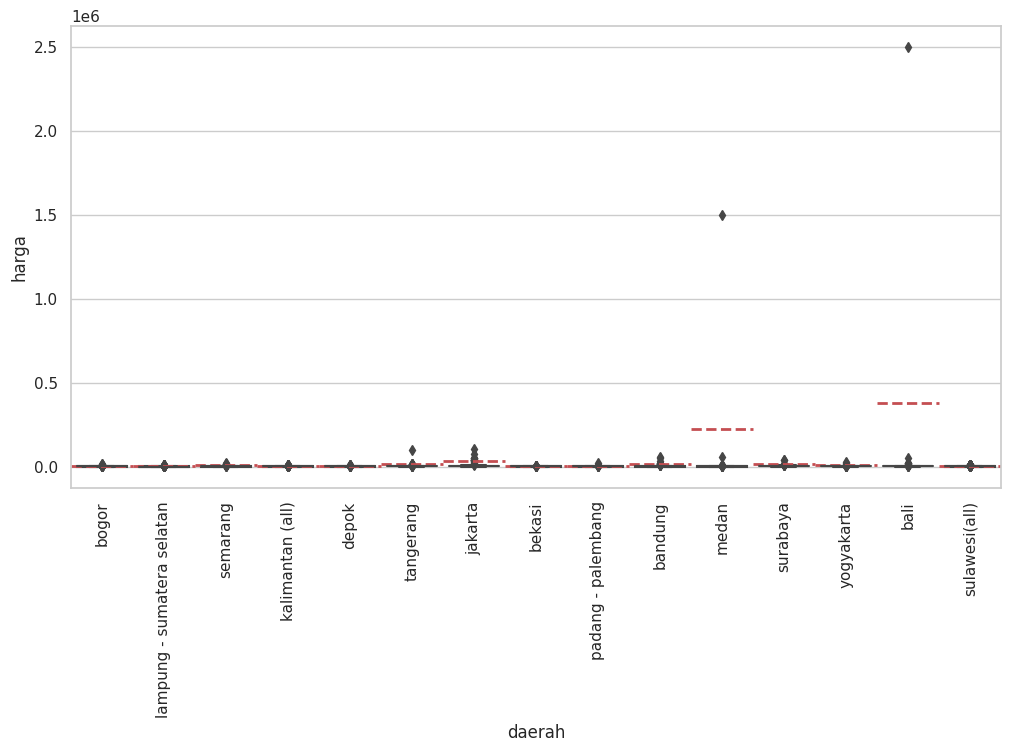

In [86]:
box_plot_cat(df=df, x_value='daerah', y_value='harga', rot=90, show_mean_lines_upper=True)

Dapat ditemukan outlier yang sangat tinggi hingga merusak visualisasi. Kedua outlier akan dipindahkan ke dataframe baru.

In [87]:
df.nlargest(10, 'harga')

LT      LB    KT    KM  garasi  carport sertifikat  listrik  \
3707   250.0   436.0   5.0   3.0     0.0      0.0        shm   6600.0   
2924   145.0   126.0   3.0   3.0     NaN      1.0        shm   2200.0   
2177   700.0  2000.0  10.0  10.0     NaN     10.0        shm  66000.0   
2042  3087.0  2500.0   5.0   5.0    10.0     10.0        NaN  66000.0   
2200   738.0   500.0   5.0   3.0     2.0      2.0        shm  13200.0   
3088  1827.0   950.0   4.0   4.0     1.0      3.0        shm  10000.0   
2880   375.0   320.0   6.0   4.0     2.0      2.0        shm  13900.0   
2202   840.0   800.0   5.0   4.0     8.0      NaN        shm      NaN   
2914  1071.0  1300.0   5.0   5.0     4.0      3.0        shm  66000.0   
3695  3430.0  2875.0  10.0  10.0     0.0     10.0        shm  23000.0   

          harga     daerah     SALARY  Dependency Ratio-2025  \
3707  2500000.0       bali  2516971.0                   42.2   
2924  1500000.0      medan  2522609.0                   53.6   
2177   105000.0    jakarta  4452724.0                   42.2   
2042   100000.0  tangerang  2501203.0                   43.9   
2200    74000.0    jakarta  4452724.0                   42.2   
3088    60000.0      medan  2522609.0                   53.6   
2880    55000.0    bandung  1841487.0                   46.4   
2202    50000.0    jakarta  4452724.0                   42.2   
2914    50000.0    bandung  1841487.0                   46.4   
3695    50000.0       bali  2516971.0                   42.2   

      Population Urban (%)  Population Rural (%)  Literacy rate  low_acad  \
3707                 60.21                 39.79      88.008569     91.13   
2924                 49.16                 50.84      93.655688     92.61   
2177                100.00                  0.00      97.551815     82.92   
2042                 67.01                 32.99      93.744602     92.15   
2200                100.00                  0.00      97.551815     82.92   
3088                 49.16                 50.84      93.655688     92.61   
2880                 65.69                 34.31      93.872261     92.96   
2202                100.00                  0.00      97.551815     82.92   
2914                 65.69                 34.31      93.872261     92.96   
3695                 60.21                 39.79      88.008569     91.13   

      suff_acad  
3707       7.28  
2924       4.90  
2177      12.84  
2042       5.79  
2200      12.84  
3088       4.90  
2880       5.17  
2202      12.84  
2914       5.17  
3695       7.28

In [88]:
df[df['harga']>1e6].nlargest(50, 'harga')

LT     LB   KT   KM  garasi  carport sertifikat  listrik      harga  \
3707  250.0  436.0  5.0  3.0     0.0      0.0        shm   6600.0  2500000.0   
2924  145.0  126.0  3.0  3.0     NaN      1.0        shm   2200.0  1500000.0   

     daerah     SALARY  Dependency Ratio-2025  Population Urban (%)  \
3707   bali  2516971.0                   42.2                 60.21   
2924  medan  2522609.0                   53.6                 49.16   

      Population Rural (%)  Literacy rate  low_acad  suff_acad  
3707                 39.79      88.008569     91.13       7.28  
2924                 50.84      93.655688     92.61       4.90

In [89]:
# Create a new DataFrame with rows where 'harga' is >= 1e6
df_highend = df[df['harga'] >= 1e6]

# Remove the rows from the original DataFrame
df = df[df['harga'] < 1e6]
df_highend.head()

LT     LB   KT   KM  garasi  carport sertifikat  listrik      harga  \
2924  145.0  126.0  3.0  3.0     NaN      1.0        shm   2200.0  1500000.0   
3707  250.0  436.0  5.0  3.0     0.0      0.0        shm   6600.0  2500000.0   

     daerah     SALARY  Dependency Ratio-2025  Population Urban (%)  \
2924  medan  2522609.0                   53.6                 49.16   
3707   bali  2516971.0                   42.2                 60.21   

      Population Rural (%)  Literacy rate  low_acad  suff_acad  
2924                 50.84      93.655688     92.61       4.90  
3707                 39.79      88.008569     91.13       7.28

---
Letak dataframe berisi kedua outlier terbesar.

In [90]:
df.nlargest(10, 'harga')

LT      LB    KT    KM  garasi  carport sertifikat  listrik  \
2177   700.0  2000.0  10.0  10.0     NaN     10.0        shm  66000.0   
2042  3087.0  2500.0   5.0   5.0    10.0     10.0        NaN  66000.0   
2200   738.0   500.0   5.0   3.0     2.0      2.0        shm  13200.0   
3088  1827.0   950.0   4.0   4.0     1.0      3.0        shm  10000.0   
2880   375.0   320.0   6.0   4.0     2.0      2.0        shm  13900.0   
2202   840.0   800.0   5.0   4.0     8.0      NaN        shm      NaN   
2914  1071.0  1300.0   5.0   5.0     4.0      3.0        shm  66000.0   
3695  3430.0  2875.0  10.0  10.0     0.0     10.0        shm  23000.0   
2162   424.0  1000.0   4.0   5.0     1.0      1.0        shm  33000.0   
2198   950.0  1400.0   6.0   4.0     7.0      NaN        shm  23000.0   

         harga     daerah     SALARY  Dependency Ratio-2025  \
2177  105000.0    jakarta  4452724.0                   42.2   
2042  100000.0  tangerang  2501203.0                   43.9   
2200   74000.0    jakarta  4452724.0                   42.2   
3088   60000.0      medan  2522609.0                   53.6   
2880   55000.0    bandung  1841487.0                   46.4   
2202   50000.0    jakarta  4452724.0                   42.2   
2914   50000.0    bandung  1841487.0                   46.4   
3695   50000.0       bali  2516971.0                   42.2   
2162   49500.0    jakarta  4452724.0                   42.2   
2198   49000.0    jakarta  4452724.0                   42.2   

      Population Urban (%)  Population Rural (%)  Literacy rate  low_acad  \
2177                100.00                  0.00      97.551815     82.92   
2042                 67.01                 32.99      93.744602     92.15   
2200                100.00                  0.00      97.551815     82.92   
3088                 49.16                 50.84      93.655688     92.61   
2880                 65.69                 34.31      93.872261     92.96   
2202                100.00                  0.00      97.551815     82.92   
2914                 65.69                 34.31      93.872261     92.96   
3695                 60.21                 39.79      88.008569     91.13   
2162                100.00                  0.00      97.551815     82.92   
2198                100.00                  0.00      97.551815     82.92   

      suff_acad  
2177      12.84  
2042       5.79  
2200      12.84  
3088       4.90  
2880       5.17  
2202      12.84  
2914       5.17  
3695       7.28  
2162      12.84  
2198      12.84

---
Setelah kedua outlier utama dipindahkan, masih ada beberapa outlier yang lebih minor dan akan dipindah ke dua dataframe yang berbeda untuk harga yang terlalu tinggi dan terlalu rendah, kemudian bisa dibandingkan apakah analisis umum tanpa outlier minimum lebih ideal. Meskipun lebih bagus, kedua outlier ini bisa digunakan untuk analisis yang lebih spesifik.

In [91]:
df_ori = df.copy()

In [92]:
df.nsmallest(20, 'harga')

LT     LB   KT   KM  garasi  carport sertifikat  listrik  harga  \
333    84.0   45.0  2.0  1.0     1.0      NaN        shm   1300.0   30.0   
334    84.0   45.0  2.0  1.0     1.0      NaN        shm   1300.0   30.0   
657    72.0   36.0  2.0  1.0     0.0      0.0        shm   1300.0   30.0   
658    72.0   36.0  2.0  1.0     0.0      0.0        shm   1300.0   30.0   
3491   78.0   40.0  2.0  1.0     0.0      2.0        shm   1300.0   40.0   
1801   60.0   42.0  2.0  1.0     NaN      NaN        shm   1300.0   41.0   
124    93.0   36.0  2.0  1.0     0.0      1.0       shgb   1300.0   65.0   
138   119.0   36.0  2.0  1.0     0.0      1.0        shm   1300.0   65.0   
151    84.0   36.0  2.0  1.0     0.0      1.0        shm   1300.0   65.0   
337   117.0  117.0  NaN  NaN     NaN      NaN        shm      NaN   68.0   
338   117.0  117.0  NaN  NaN     NaN      NaN        shm      NaN   68.0   
125    60.0   36.0  2.0  1.0     0.0      1.0        shm   1300.0   70.0   
2499   70.0   45.0  2.0  1.0     1.0      1.0        shm      NaN   80.0   
1975  128.0   88.0  3.0  3.0     NaN      1.0    lainnya   2200.0   95.0   
329    94.0   75.0  3.0  2.0     NaN      1.0        shm   1300.0  100.0   
330    94.0   75.0  3.0  2.0     NaN      1.0        shm   1300.0  100.0   
2779   40.0   30.0  1.0  1.0     NaN      1.0        shm   1300.0  115.0   
2783   80.0   60.0  3.0  1.0     NaN      1.0        shm   1300.0  115.0   
58     30.0   25.0  1.0  1.0     0.0      1.0        shm   1300.0  130.0   
1741   40.0   30.0  2.0  1.0     NaN      NaN        shm   1300.0  130.0   

                          daerah     SALARY  Dependency Ratio-2025  \
333   lampung - sumatera selatan  3144446.0                   47.3   
334   lampung - sumatera selatan  2440486.0                   47.3   
657   lampung - sumatera selatan  3144446.0                   47.3   
658   lampung - sumatera selatan  2440486.0                   47.3   
3491                  yogyakarta  1840951.0                   46.8   
1801                       depok  1841487.0                   46.4   
124                        bogor  1841487.0                   46.4   
138                        bogor  1841487.0                   46.4   
151                        bogor  1841487.0                   46.4   
337   lampung - sumatera selatan  3144446.0                   47.3   
338   lampung - sumatera selatan  2440486.0                   47.3   
125                        bogor  1841487.0                   46.4   
2499                      bekasi  1841487.0                   46.4   
1975                   tangerang  2501203.0                   43.9   
329   lampung - sumatera selatan  3144446.0                   47.3   
330   lampung - sumatera selatan  2440486.0                   47.3   
2779                     bandung  1841487.0                   46.4   
2783                     bandung  1841487.0                   46.4   
58                         bogor  1841487.0                   46.4   
1741                       depok  1841487.0                   46.4   

      Population Urban (%)  Population Rural (%)  Literacy rate  low_acad  \
333                  35.79                 64.21      93.745209     94.66   
334                  25.70                 74.30      93.019191     95.02   
657                  35.79                 64.21      93.745209     94.66   
658                  25.70                 74.30      93.019191     95.02   
3491                 66.44                 33.56      89.732036     86.31   
1801                 65.69                 34.31      93.872261     92.96   
124                  65.69                 34.31      93.872261     92.96   
138                  65.69                 34.31      93.872261     92.96   
151                  65.69                 34.31      93.872261     92.96   
337                  35.79                 64.21      93.745209     94.66   
338                  25.70                 74.30      93.019191     95.02   
125              

In [93]:
df[df['harga']<100].nsmallest(20, 'harga')

LT     LB   KT   KM  garasi  carport sertifikat  listrik  harga  \
333    84.0   45.0  2.0  1.0     1.0      NaN        shm   1300.0   30.0   
334    84.0   45.0  2.0  1.0     1.0      NaN        shm   1300.0   30.0   
657    72.0   36.0  2.0  1.0     0.0      0.0        shm   1300.0   30.0   
658    72.0   36.0  2.0  1.0     0.0      0.0        shm   1300.0   30.0   
3491   78.0   40.0  2.0  1.0     0.0      2.0        shm   1300.0   40.0   
1801   60.0   42.0  2.0  1.0     NaN      NaN        shm   1300.0   41.0   
124    93.0   36.0  2.0  1.0     0.0      1.0       shgb   1300.0   65.0   
138   119.0   36.0  2.0  1.0     0.0      1.0        shm   1300.0   65.0   
151    84.0   36.0  2.0  1.0     0.0      1.0        shm   1300.0   65.0   
337   117.0  117.0  NaN  NaN     NaN      NaN        shm      NaN   68.0   
338   117.0  117.0  NaN  NaN     NaN      NaN        shm      NaN   68.0   
125    60.0   36.0  2.0  1.0     0.0      1.0        shm   1300.0   70.0   
2499   70.0   45.0  2.0  1.0     1.0      1.0        shm      NaN   80.0   
1975  128.0   88.0  3.0  3.0     NaN      1.0    lainnya   2200.0   95.0   

                          daerah     SALARY  Dependency Ratio-2025  \
333   lampung - sumatera selatan  3144446.0                   47.3   
334   lampung - sumatera selatan  2440486.0                   47.3   
657   lampung - sumatera selatan  3144446.0                   47.3   
658   lampung - sumatera selatan  2440486.0                   47.3   
3491                  yogyakarta  1840951.0                   46.8   
1801                       depok  1841487.0                   46.4   
124                        bogor  1841487.0                   46.4   
138                        bogor  1841487.0                   46.4   
151                        bogor  1841487.0                   46.4   
337   lampung - sumatera selatan  3144446.0                   47.3   
338   lampung - sumatera selatan  2440486.0                   47.3   
125                        bogor  1841487.0                   46.4   
2499                      bekasi  1841487.0                   46.4   
1975                   tangerang  2501203.0                   43.9   

      Population Urban (%)  Population Rural (%)  Literacy rate  low_acad  \
333                  35.79                 64.21      93.745209     94.66   
334                  25.70                 74.30      93.019191     95.02   
657                  35.79                 64.21      93.745209     94.66   
658                  25.70                 74.30      93.019191     95.02   
3491                 66.44                 33.56      89.732036     86.31   
1801                 65.69                 34.31      93.872261     92.96   
124                  65.69                 34.31      93.872261     92.96   
138                  65.69                 34.31      93.872261     92.96   
151                  65.69                 34.31      93.872261     92.96   
337                  35.79                 64.21      93.745209     94.66   
338                  25.70                 74.30      93.019191     95.02   
125                  65.69                 34.31      93.872261     92.96   
2499                 65.69                 34.31      93.872261     92.96   
1975                 67.01                 32.99      93.744602     92.15   

      suff_acad  
333        4.23  
334        3.50  
657        4.23  
658        3.50  
3491       9.64  
1801       5.17  
124        5.17  
138        5.17  
151        5.17  
337        4.23  
338        3.50  
125        5.17  
2499       5.17  
1975       5.79

In [94]:
# Create a new DataFrame with rows where 'harga' is >= 150000
df_low = df[df['harga'] < 100]

# Remove the rows from the original DataFrame
df = df[df['harga'] >= 100]
df_low.head()

LT    LB   KT   KM  garasi  carport sertifikat  listrik  harga  \
124   93.0  36.0  2.0  1.0     0.0      1.0       shgb   1300.0   65.0   
125   60.0  36.0  2.0  1.0     0.0      1.0        shm   1300.0   70.0   
138  119.0  36.0  2.0  1.0     0.0      1.0        shm   1300.0   65.0   
151   84.0  36.0  2.0  1.0     0.0      1.0        shm   1300.0   65.0   
333   84.0  45.0  2.0  1.0     1.0      NaN        shm   1300.0   30.0   

                         daerah     SALARY  Dependency Ratio-2025  \
124                       bogor  1841487.0                   46.4   
125                       bogor  1841487.0                   46.4   
138                       bogor  1841487.0                   46.4   
151                       bogor  1841487.0                   46.4   
333  lampung - sumatera selatan  3144446.0                   47.3   

     Population Urban (%)  Population Rural (%)  Literacy rate  low_acad  \
124                 65.69                 34.31      93.872261     92.96   
125                 65.69                 34.31      93.872261     92.96   
138                 65.69                 34.31      93.872261     92.96   
151                 65.69                 34.31      93.872261     92.96   
333                 35.79                 64.21      93.745209     94.66   

     suff_acad  
124       5.17  
125       5.17  
138       5.17  
151       5.17  
333       4.23

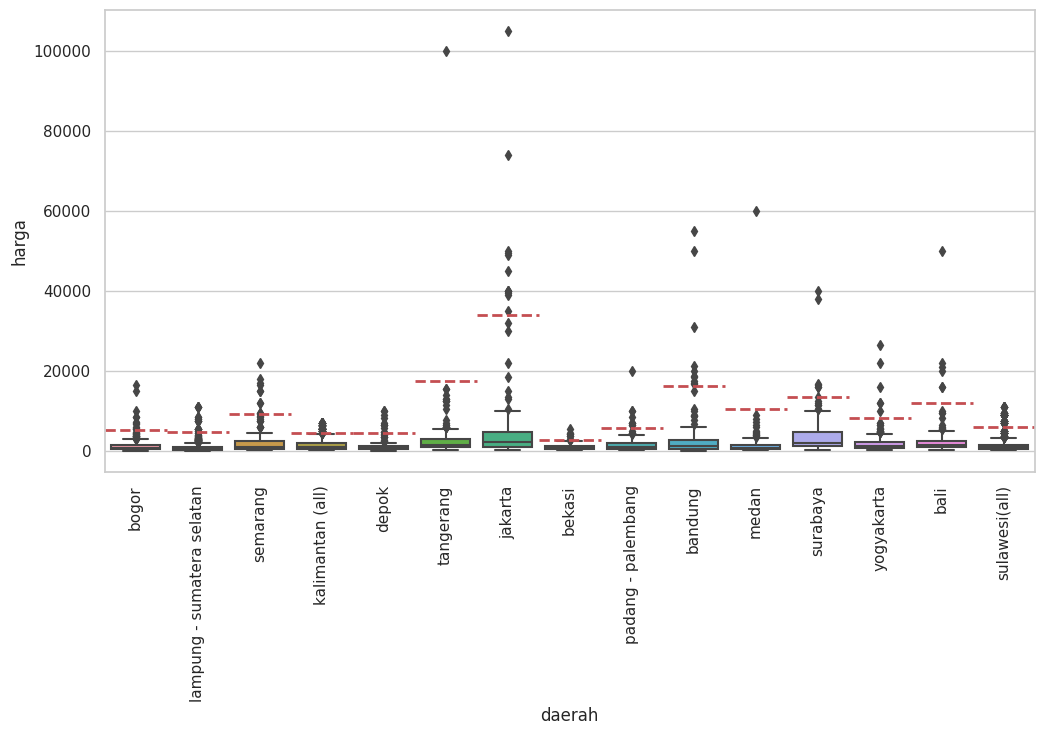

In [95]:
box_plot_cat(df=df, x_value='daerah', y_value='harga', rot=90, show_mean_lines_upper=True)

Number of outliers above Mean + 2s: 12


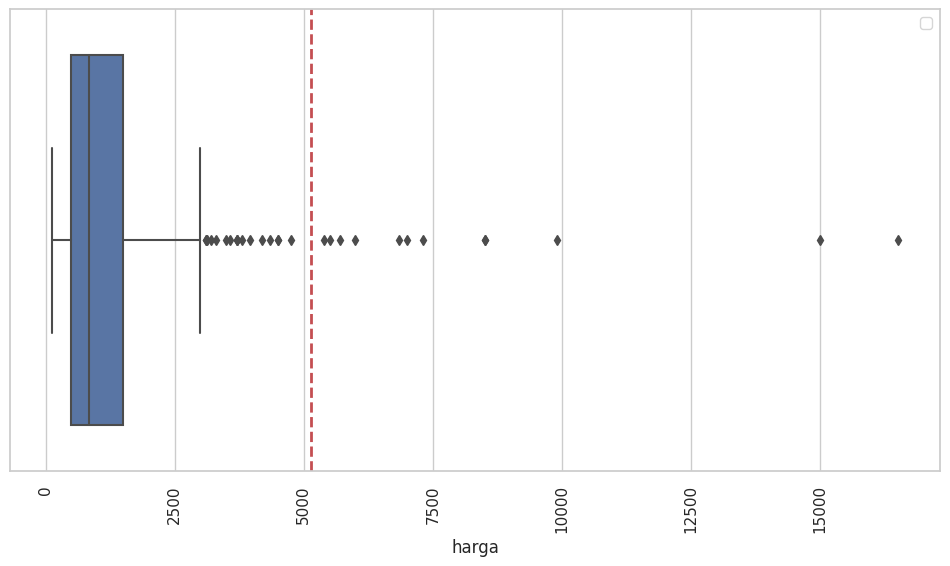

In [96]:
box_plot_cat(df=df[df['daerah']=='bogor'], x_value='harga', rot=90, show_mean_lines_upper=True)

In [97]:
# Remove the rows from the original DataFrame
df_high = df[df['harga'] >= 15e3]
df = df[df['harga'] < 15e3]
df.head()

LT    LB   KT   KM  garasi  carport sertifikat  listrik   harga daerah  \
0  75.0  38.0  2.0  1.0     1.0      1.0        shm   1300.0   692.0  bogor   
1  60.0  40.0  1.0  1.0     0.0      1.0        shm   2200.0   811.0  bogor   
2  60.0  50.0  2.0  2.0     0.0      1.0        shm   2200.0   900.0  bogor   
3  60.0  70.0  3.0  2.0     0.0      1.0        shm   2200.0  1001.0  bogor   
4  90.0  60.0  3.0  2.0     0.0      2.0        shm   2200.0  1200.0  bogor   

      SALARY  Dependency Ratio-2025  Population Urban (%)  \
0  1841487.0                   46.4                 65.69   
1  1841487.0                   46.4                 65.69   
2  1841487.0                   46.4                 65.69   
3  1841487.0                   46.4                 65.69   
4  1841487.0                   46.4                 65.69   

   Population Rural (%)  Literacy rate  low_acad  suff_acad  
0                 34.31      93.872261     92.96       5.17  
1                 34.31      93.872261     92.96       5.17  
2                 34.31      93.872261     92.96       5.17  
3                 34.31      93.872261     92.96       5.17  
4                 34.31      93.872261     92.96       5.17

---
Memisahkan outlier minor atas yang berharga di atas 15 Milyar rupiah.

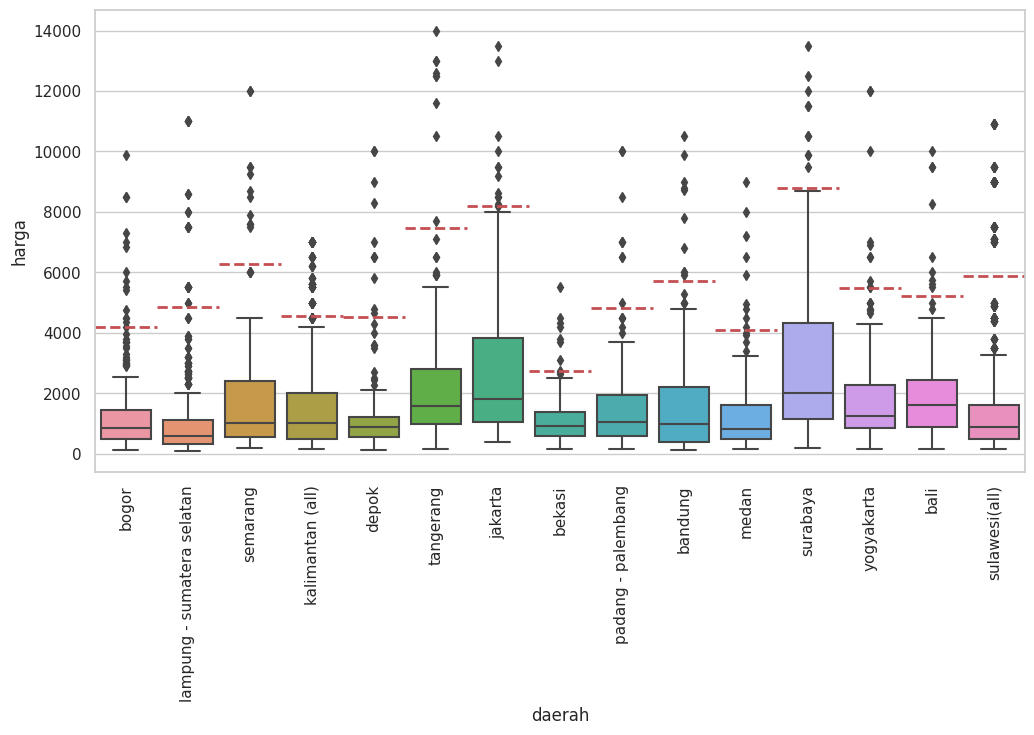

In [98]:
box_plot_cat(df=df, x_value='daerah', y_value='harga', rot=90, show_mean_lines_upper=True)

Sekarang outlier tidak begitu memengaruhi. Meski garis outlier yang umum digunakan di statistika terlihat, kami memilih untuk tidak menggunakan itu sebagai acuan atas banyaknya rumah yang di atas batas outlier, tetapi bisa memberi insight yang bermanfaat. Kami juga untuk EDA kali ini tidak menggunakan data outlier-outlier karena belum mendapat alasan dari analisis yang cukup spesifik yang melibatkan mereka dalam pencarian insight kami.

###Missing Values

In [99]:
df.isna().sum()

LT                          0
LB                          2
KT                         26
KM                         13
garasi                   1742
carport                   929
sertifikat                  9
listrik                   468
harga                       0
daerah                      0
SALARY                      0
Dependency Ratio-2025       0
Population Urban (%)        0
Population Rural (%)        0
Literacy rate               0
low_acad                    0
suff_acad                   0
dtype: int64

---
*Missing values* tidak akan langsung di-drop berhubung banyak sekali missing value yang ditemukan dari kolom yang tetap saja bisa memberikan insight, tetapi baris lainnya sangat relevan dalam analisis umum lainnya. *Missing values* juga tidak diisi berhubung saat kosong, belum tentu sesuatu adalah tidak ada atau 0. *Missing values* akan ditangani ketika melakukan visualisasi tertentu yang memang tidak ideal apabila terdapat banyak *missing values*.

#Visualization

##Additional Plots' Functions

In [100]:
# Create a figure with two subplots side by side

def two_stripplots(df_1: pd.DataFrame, df_2: pd.DataFrame, x_1: str, x_2: str,
                   y_1: str, y_2: str, hue_1: str = None, hue_2: str = None,
                   rot: int = 0, title1: str = 'Title 1', title2: str = 'Title 2',
                   figsize: tuple = (12, 8)):

  '''
  Berguna untuk membuat dua stripplot bersebelahan sebagai pemudah perbandingan.


  df_1 dan df_2 adalah 2 dataframe yang ingin digunakan dan bisa sama.
  x_1 dan x_2 berperan sebagai nama kolom yang akan dijadikan x-axis.
  y_1 dan y_2 berperan sebagai nama kolom yang akan dijadikan y-axis.
  hue_1 dan hue_2 sebagai tambahan informasi dari plot pada kolom yang berbeda.
  rot untuk rotation dari label x.
  title1 dan title2 untuk judul kedua plot.
  figsize untuk ukuran frame plot.
  '''

  fig = plt.figure(figsize=figsize)
  sns.set(style="whitegrid")

  # First plot (With minor outliers included)
  ax1 = fig.add_subplot(121)
  sns.stripplot(data=df_1, x=x_1, y=y_1, hue=hue_1, ax=ax1, alpha=0.7, jitter=True)
  plt.xticks(rotation=rot)
  # Move the hue legend outside of the plot to the right
  ax1.legend(title=hue_1, loc='center left', bbox_to_anchor=(1, 0.5))
  plt.title(title1)

  # Second plot (With minor outliers excluded)
  ax2 = fig.add_subplot(122)
  sns.stripplot(data=df_2, x=x_2, y=y_2, hue=hue_2, ax=ax2, alpha=0.7, jitter=True)
  plt.xticks(rotation=rot)
  # Move the hue legend outside of the plot to the right
  ax2.legend(title=hue_2, loc='center left', bbox_to_anchor=(1, 0.5))
  plt.title(title2)

  # Adjust spacing between subplots
  plt.close(2)
  plt.close(3)
  plt.tight_layout()
  plt.show()

In [101]:
def two_swarmplots(df_1: pd.DataFrame, df_2: pd.DataFrame, x_1: str, x_2: str,
                   y_1: str, y_2: str, hue_1: str = None, hue_2: str = None,
                   rot: int = 0, title1: str = 'Title 1', title2: str = 'Title 2',
                   figsize: tuple = (12, 8)):

    '''
    Berguna untuk membuat dua swarmplot bersebelahan sebagai pemudah perbandingan.


    df_1 dan df_2 adalah 2 dataframe yang ingin digunakan dan bisa sama.
    x_1 dan x_2 berperan sebagai nama kolom yang akan dijadikan x-axis.
    y_1 dan y_2 berperan sebagai nama kolom yang akan dijadikan y-axis.
    hue_1 dan hue_2 sebagai tambahan informasi dari plot pada kolom yang berbeda.
    rot untuk rotation dari label x.
    title1 dan title2 untuk judul kedua plot.
    figsize untuk ukuran frame plot.
    '''

    fig, axes = plt.subplots(1, 2, figsize=figsize)
    sns.set(style="whitegrid")

    # Combine unique hue values from both dataframes
    unique_hue_values = np.unique(pd.concat([df_1[hue_1], df_2[hue_2]]))

    # Create a custom color palette based on the combined unique hue values
    custom_palette = sns.color_palette("coolwarm", n_colors=len(unique_hue_values))

    # Function to map hue values to colors using quantiles
    def map_to_color(quantile, quantiles):
        n_colors = len(custom_palette)
        index = int(quantile * (n_colors - 1))
        return custom_palette[index]

    # First plot (With minor outliers included)
    sns.swarmplot(data=df_1, x=x_1, y=y_1, hue=hue_1, ax=axes[0], s=5, palette=custom_palette)
    axes[0].set_title(title1)

    # Second plot (With minor outliers excluded)
    sns.swarmplot(data=df_2, x=x_2, y=y_2, hue=hue_2, ax=axes[1], s=5, palette=custom_palette)
    axes[1].set_title(title2)

    # Define the quantiles you want to use
    quantiles = [0, 2/8, 3/8, 4/8, 5/8, 6/8, 9/10, 49/50, 1]

    # Customize the legends based on quantiles
    custom_legend_labels = [int(q) for q in df_1[y_1].quantile(quantiles)]
    custom_legend = [plt.Line2D([0], [0], marker='o', color='w', markersize=10,
                                markerfacecolor=map_to_color(q, quantiles),
                                label=label)
                     for q, label in zip(quantiles, custom_legend_labels)]

    axes[0].legend(handles=custom_legend, title=hue_1, bbox_to_anchor=(1.05, 0.2), loc='lower right')


    custom_legend_labels = [int(q) for q in df_2[y_2].quantile(quantiles)]
    custom_legend = [plt.Line2D([0], [0], marker='o', color='w', markersize=10,
                                markerfacecolor=map_to_color(q, quantiles),
                                label=label)
                     for q, label in zip(quantiles, custom_legend_labels)]

    axes[1].legend(handles=custom_legend, title=hue_2, bbox_to_anchor=(1.05, 0.2), loc='lower right')

    # Rotate x-axis labels
    axes[0].tick_params(axis='x', labelrotation=rot)
    axes[1].tick_params(axis='x', labelrotation=rot)

    # Adjust spacing between subplots
    plt.tight_layout()
    plt.show()

##Plotting - Early Analysis

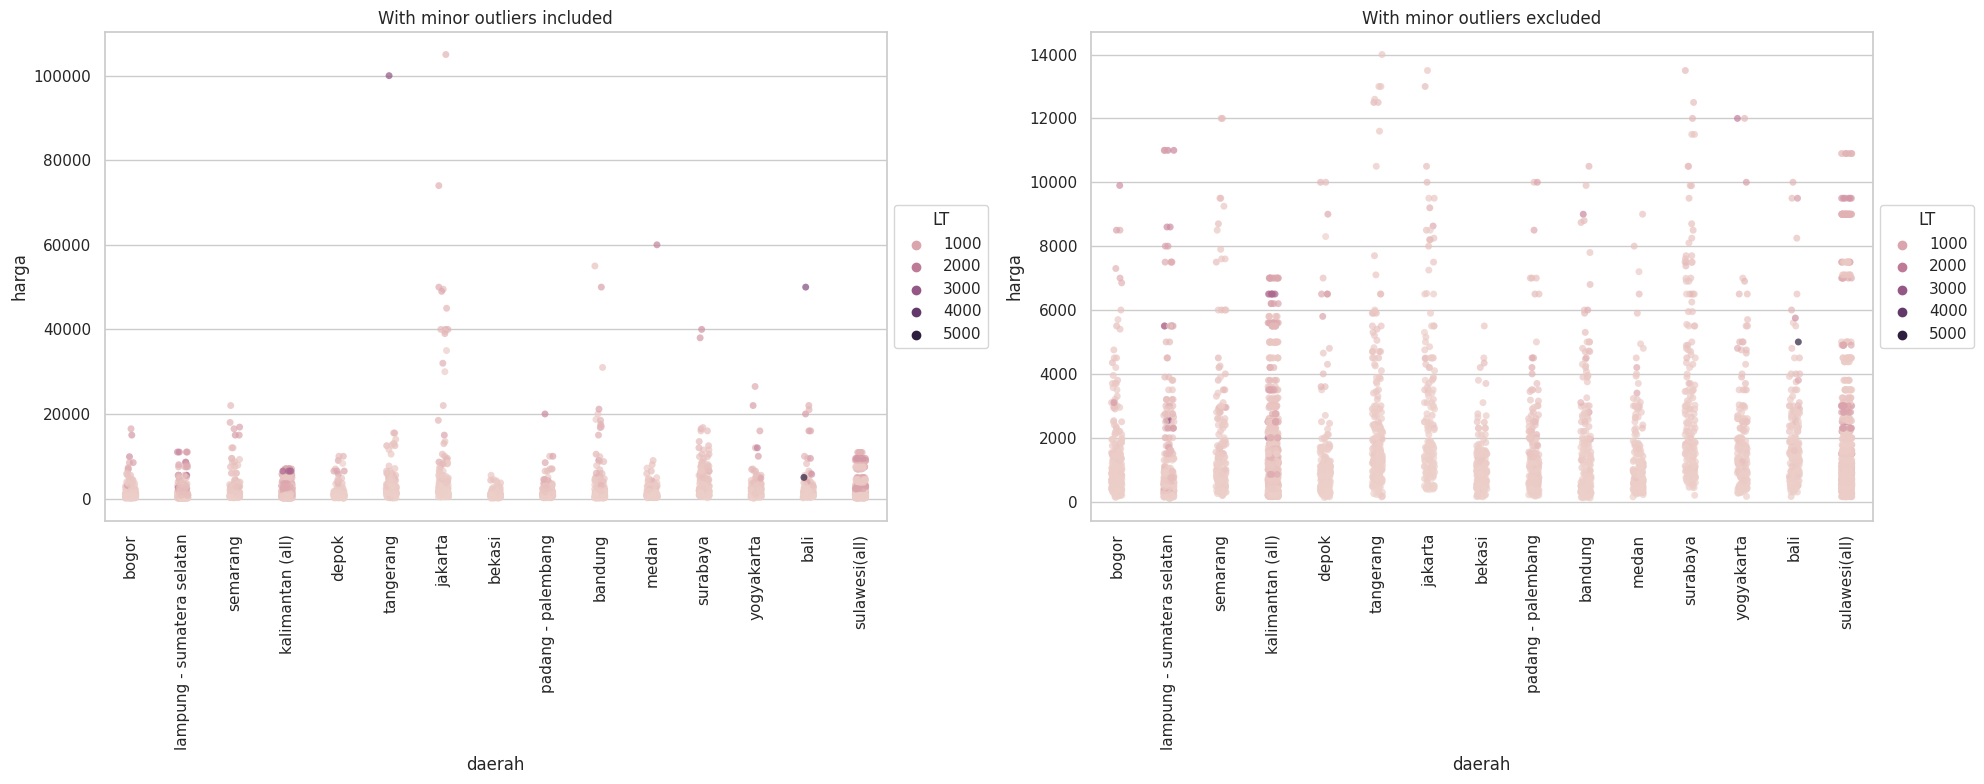

In [103]:
two_stripplots(df_1=df_ori, df_2=df, x_1='daerah', x_2='daerah',
               y_1='harga', y_2='harga', hue_1='LT',
               hue_2='LT', rot=90,
               title1='With minor outliers included',
               title2="With minor outliers excluded",
               figsize=(20, 8))



---

Visualisasi untuk dataframe dengan outlier minor lebih mudah diinterpretasi dan dilacak rumah yang terlihat menarik untuk harganya berdasarkan luas tanah. Dari sini cukup jelas bahwa memang ada beberapa rumah dengan luas tanah besar dengan harga yang tidak sangat tinggi, tetapi akan bisa lebih jelas dengan swarmplot. Menggunakan stripplot sedikit sulit untuk membedakan hue pada densitas tinggi sehingga tidak akan digunakan lagi.

<ipython-input-101-5e921ad3cd5d>:39: UserWarning: The palette list has more values (104) than needed (101), which may not be intended.
  sns.swarmplot(data=df_2, x=x_2, y=y_2, hue=hue_2, ax=axes[1], s=5, palette=custom_palette)


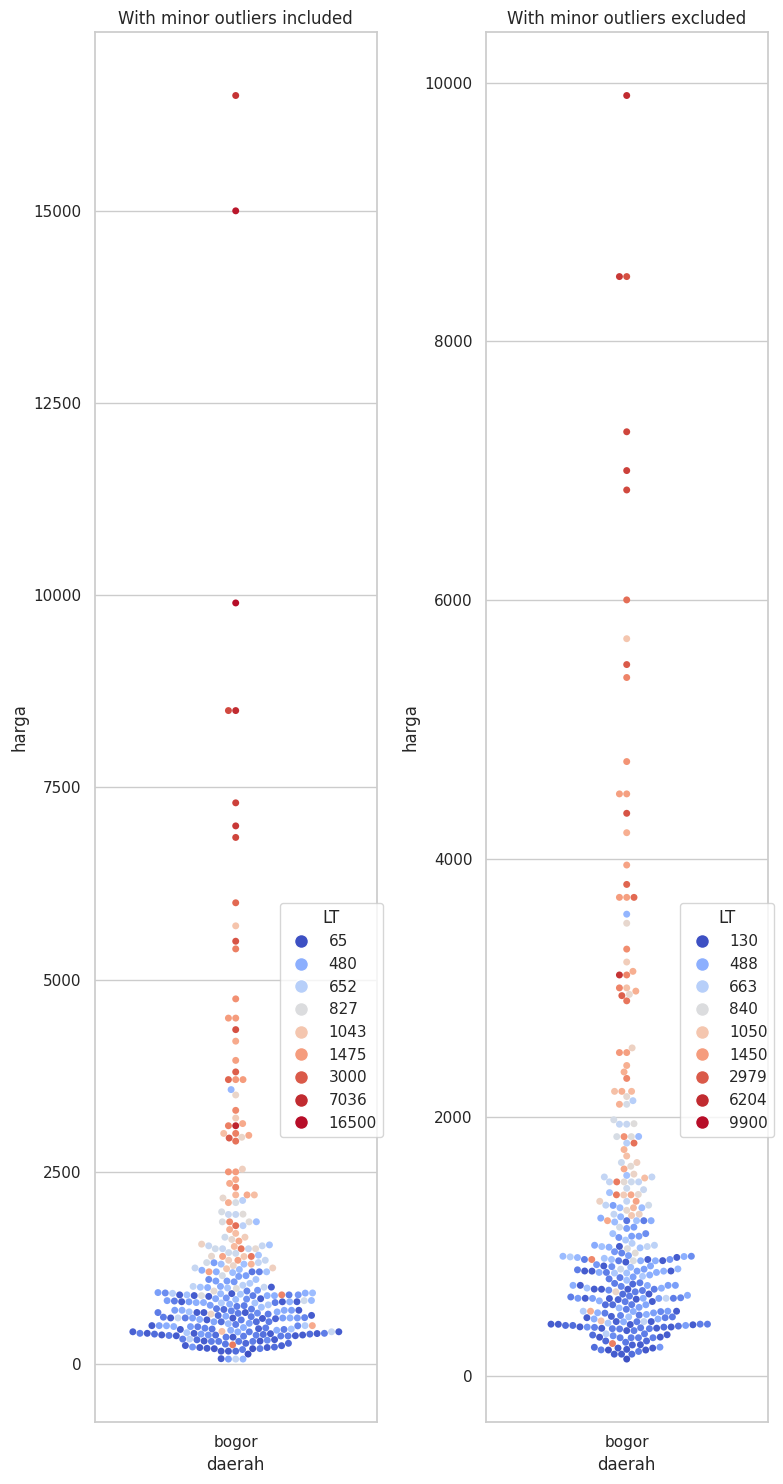

In [104]:
two_swarmplots(df_1=df_ori[df_ori['daerah']=='bogor'], df_2=df[df['daerah']=='bogor'], x_1='daerah', x_2='daerah',
               y_1='harga', y_2='harga', hue_1='LT',
               hue_2='LT',
               title1='With minor outliers included',
               title2="With minor outliers excluded",
               figsize=(8, 15))

---
Dengan swarm plot lebih jelas, tetapi visualisasi yang terlalu tinggi tidak begitu bagus sehingga untuk mencari rumah dengan *budget* yang ada akan dipotong untuk harga yang terlalu tinggi.

Selain itu, dari sini juga cukup jelas bahwa untuk keperluan ini, tidak dibutuhkan dataframe yang mengikutsertakan outlier minor yang mahal. Analisis untuk outlier-outlier tersebut dapat ditangani untuk insight tambahan yang tidak relevan untuk *budget* investasi.

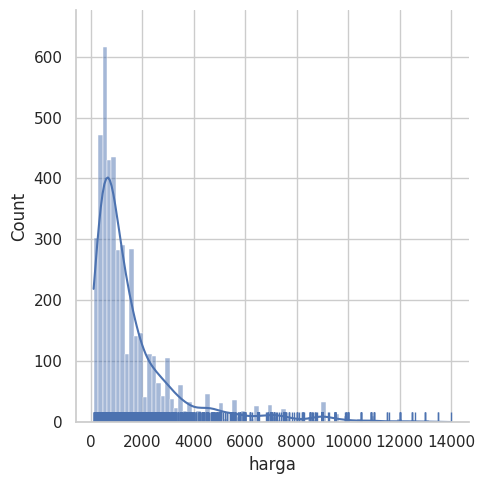

In [105]:
# Distributions
p = sns.displot(df['harga'], kde=True, rug=True)

---
Dari sini bisa didapat informasi yang sederhana, yaitu kecenderungan rumah yang dijual banyak di rumah yang berharga rendah

##Report to Senior Manager

###No. 1


---

**Kualitas data yang dimiliki perusahaan.**

Belum ideal. Data terasa masih kurang lengkap untuk mendapat insight yang lebih kritis. Selain itu, format data masih sangat berantakan dan tidak konsisten. Tidak hanya itu, banyak kerentanan pada beberapa bagian data yang berpotensi bias sehingga sulit digunakan, terutama pada bagian deskripsi. Ada deskripsi memang sesuatu yang bisa informatif, hanya saja kurangnya antisipasi penulisan dari penjual untuk deskripsi tersebutlah yang menyebabkan susahnya menarik informasi yang berharga dan konsisten dari hal tersebut.

###No. 2
---
**Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi data driven company yang unggul.**

1. Sebaiknya data dikonsistenkan untuk format dan tipenya. Pembagian lokasi dan/atau daerah dibuat lebih konsisten dan jelas sebagaimana pembagian daerah ke Depok, Bogor, Bandung, dan Bekasi masuk ke provinsi yang sama, tetapi dipisahkan, sementara ada daerah yang mencakup keseluruhan kalimantan sehingga skala yang dibuat tidak sama.
2. Tidak hanya itu, keberagaman data yang ada pun kurang untuk bisa menjadi data driven company. Penambahan kolom yang penting bisa berguna dalam mendapat insight yang lebih kritis, berharga, dan tidak terduga, seperti adanya kolom untuk jumlah orang yang tertarik pada rumah tertentu, jumlah pengunjung ke halaman web untuk rumah tersebut, jumlah rumah yang sudah terjual serta yang belum terjual, dan lainnya yang bisa menjadi indikator jumlah ketertarikan terhadap rumah tertentu. Hal ini bisa didapat dengan menambah fitur untuk link perusahaan dan lainnya yang menyediakan layanan masyarakat untuk mencari rumah dengan menjadi member secara gratis sehingga mendapat informasi umum terkait jenis pengguna yang tertarik ke rumah tertentu atau sesuatu yang lebih sederhana dengan jumlah pengguna itu sendiri yang mencari di daerah tertentu.
3. Hal yang lain bisa ditambahkan adalah informasi terkait penjual itu sendiri. Berhubung penjual pun bisa tidak menjual hanya 1 rumah saja dengan terlihat dari beberapa deskripsi untuk rumah yang berbeda bisa sama persis, maka karakteristik penjual berpotensi memberikan insight baru.
4. Terkait dengan informasi masing-masing rumah, adanya kolom deskripsi yang banyak digunakan dengan nuansa iklan berpotensi menyebabkan bias atau bahkan misinformasi dan ketidaklengkapan informasi sehingga kami juga menyarankan adanya penambahan kelengkapan informasi yang harus diiisi penjual dengan multiple-choice atau checkboxes agar lebih jelas apakah rumah tersebut memiliki fitur umum tertentu atau tidak atau tidak diketahui dibanding kosong sepenuhnya. Tentunya kolom deskripsi tetap dibutuhkan untuk beberapa spesifikasi rumah yang lebih spesifik, tetapi penggunaannya yang kerap sebagai advertasi menghalangi informasi untuk bisa diandalkan sehingga dapat dibuat fitur baru khusus untuk penambahan spesifikasi khusus rumah untuk penjual isi dan dimasukkan sebagai kolom baru pada data.
5. Kami juga menyarankan untuk menambahkan lagi data yang tidak hanya terbatas pada rumah yang dijual secara daring dari beberapa website tertentu, seperti data terkait yang dibagi per daerah meliputi jumlah rumah yang sedang dijual, pertumbuhan harga dan jumlah rumah yang sedang dijual seiring waktu dengan periode waktu yang lebih konsisten dan ekstensif, serta informasi geografis sederhana dari setiap daerah.

###No. 3
---
**Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?**

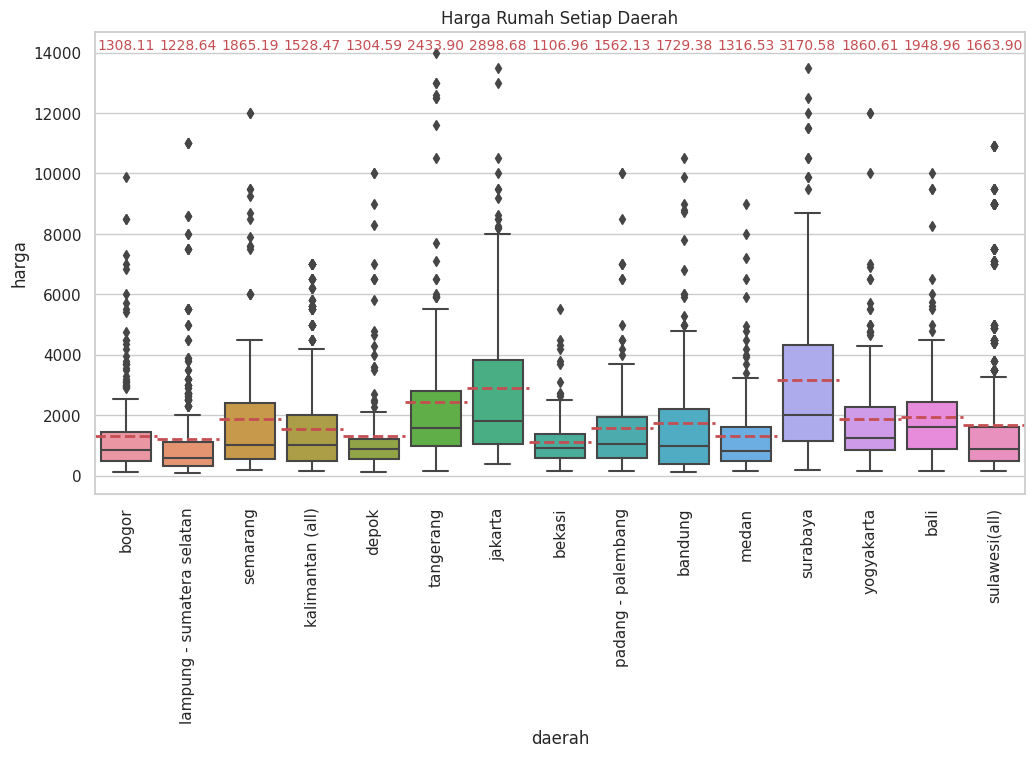

In [169]:
box_plot_cat(df=df, x_value='daerah', y_value='harga', rot=90, show_mean_lines_mean=True, show_mean_font=True, title='Harga Rumah Setiap Daerah')

Hanya dengan boxplot sederhana, cukup jelas bahwa beberapa daerah cenderung memiliki harga rumah yang lebih mahal atau murah saat dibandingkan dengan daerah lainnya. Perbandingan kedua ujung ada pada Surabaya sebagai daerah dengan rata-rata harga rumah termahal dibandingkan Bekasi yang memiliki rata-rata harga rumah termurah dengan perbedaan lebih dari 2 Miliar rupiah, dengan rata-rata harga rumah di Surabaya mendekati 300% dari rata-rata harga rumah di Bekasi. Pada daerah lainnya, perbedaan rata-rata yang ada cenderung cukup signifikan dengan sedikit pengecualian yang mirip, yaitu Bogor, Medan, dan Depok.

###No. 4
---
**Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).**

####Additional Data Preparation

In [107]:
df['daerah'].unique()

array(['bogor', 'lampung - sumatera selatan', 'semarang',
       'kalimantan (all)', 'depok', 'tangerang', 'jakarta', 'bekasi',
       'padang - palembang', 'bandung', 'medan', 'surabaya', 'yogyakarta',
       'bali', 'sulawesi(all)'], dtype=object)

In [108]:
# Define the mapping
mapping_jabar = {
    'bogor': 'jawa barat',
    'lampung - sumatera selatan': 'lampung - sumatera selatan',
    'semarang': 'semarang',
    'kalimantan (all)': 'kalimantan (all)',
    'depok': 'jawa barat',
    'tangerang': 'tangerang',
    'jakarta': 'jakarta',
    'bekasi': 'jawa barat',
    'padang - palembang': 'padang - palembang',
    'bandung': 'jawa barat',
    'medan': 'medan',
    'surabaya': 'surabaya',
    'yogyakarta': 'yogyakarta',
    'bali': 'bali',
    'sulawesi(all)': 'sulawesi(all)'
}

# Create a new column based on the mapping
df['NewDaerah'] = np.where(df['daerah'].isin(mapping_jabar.keys()), df['daerah'].map(mapping_jabar), df['daerah'])

In [109]:
add_data

SALARY                    Province  Dependency Ratio-2025  \
1   2522609                       Medan                   53.6   
3   2938564          Padang - Palembang                   48.4   
5   3144446  Lampung - Sumatera selatan                   47.3   
7   2440486  Lampung - Sumatera selatan                   47.3   
8   4452724                     Jakarta                   42.2   
9   1841487                       Bogor                   46.4   
10  1813011                    Semarang                   48.4   
11  1840951                  Yogyakarta                   46.8   
12  1891567                    Surabaya                   44.3   
13  2501203                   Tangerang                   43.9   
14  2516971                        Bali                   42.2   
17  2434328            Kalimantan (All)                   48.8   
18  2922516            Kalimantan (All)                   41.4   
19  2906473            Kalimantan (All)                   46.2   
20  3014497            Kalimantan (All)                   43.7   
21  3310723               Sulawesi(All)                   46.8   
22  2390739               Sulawesi(All)                   49.5   
23  3165876               Sulawesi(All)                   50.4   
24  2710595               Sulawesi(All)                   54.6   
25  2800580               Sulawesi(All)                   47.7   
26  2678863               Sulawesi(All)                   52.7   

    Population Urban (%)  Population Rural (%)  Literacy rate  low_acad  \
1                  49.16                 50.84      93.655688     92.61   
3                  39.17                 60.83      94.214608     93.05   
5                  35.79                 64.21      93.745209     94.66   
7                  25.70                 74.30      93.019191     95.02   
8                 100.00                  0.00      97.551815     82.92   
9                  65.69                 34.31      93.872261     92.96   
10                 45.72                 54.28      89.875142     94.41   
11                 66.44                 33.56      89.732036     86.31   
12                 47.58                 52.42      88.108246     93.91   
13                 67.01                 32.99      93.744602     92.15   
14                 60.21                 39.79      88.008569     91.13   
17                 30.21                 69.79      87.990329     95.30   
18                 33.46                 66.54      94.079029     93.86   
19                 42.05                 57.95      93.276681     93.90   
20                 62.08                 37.92      94.544065     90.90   
21                 45.21                 54.79      96.498502     90.64   
22                 24.32                 75.68      90.731371     93.79   
23                 36.66                 63.34      85.374668     92.80   
24                 27.38                 72.62      87.128433     92.84   
25                 34.00                 66.00      90.683563     94.42   
26                 22.88                 77.12      83.231685     94.51   

    suff_acad  
1        4.90  
3        5.03  
5        4.23  
7        3.50  
8       12.84  
9        5.17  
10       4.07  
11       9.64  
12       4.40  
13       5.79  
14       7.28  
17       3.50  
18       4.93  
19       4.83  
20       6.37  
21       5.64  
22       4.63  
23       5.92  
24       5.72  
25       4.01  
26       4.31

####Explore the Box Plot

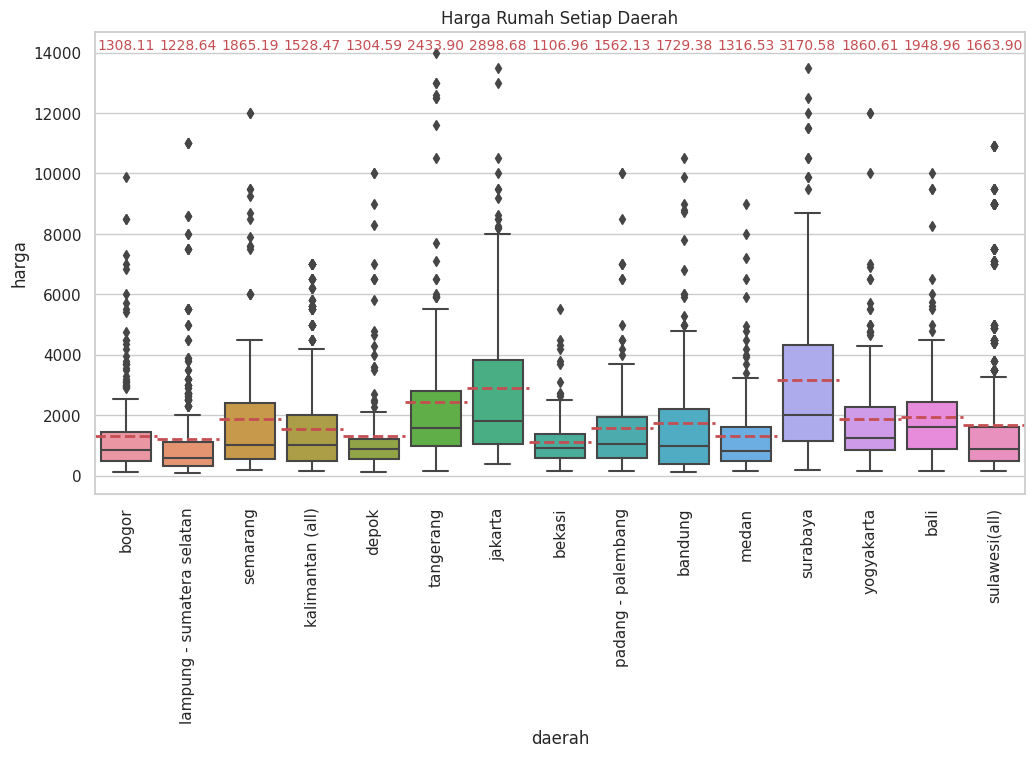

In [170]:
box_plot_cat(df=df, x_value='daerah', y_value='harga', rot=90, show_mean_lines_mean=True, show_mean_font=True, title='Harga Rumah Setiap Daerah')



---

Hanya dari boxplot sederhana, bisa dilihat sebaran harga rumah yang ada pada daerah tersebut, hanya saja harga rumah yang mahal atau murah atau bahkan yang di tengah yang menjadi preferensi adalah sesuai tujuan perusahaan, tetapi dapat dicari daerah yang lebih ideal dibanding lainnya dengan beberapa pertimbangan lainnya dari data eksternal dan faktor eksternal.

####Explore Trend Line Plots

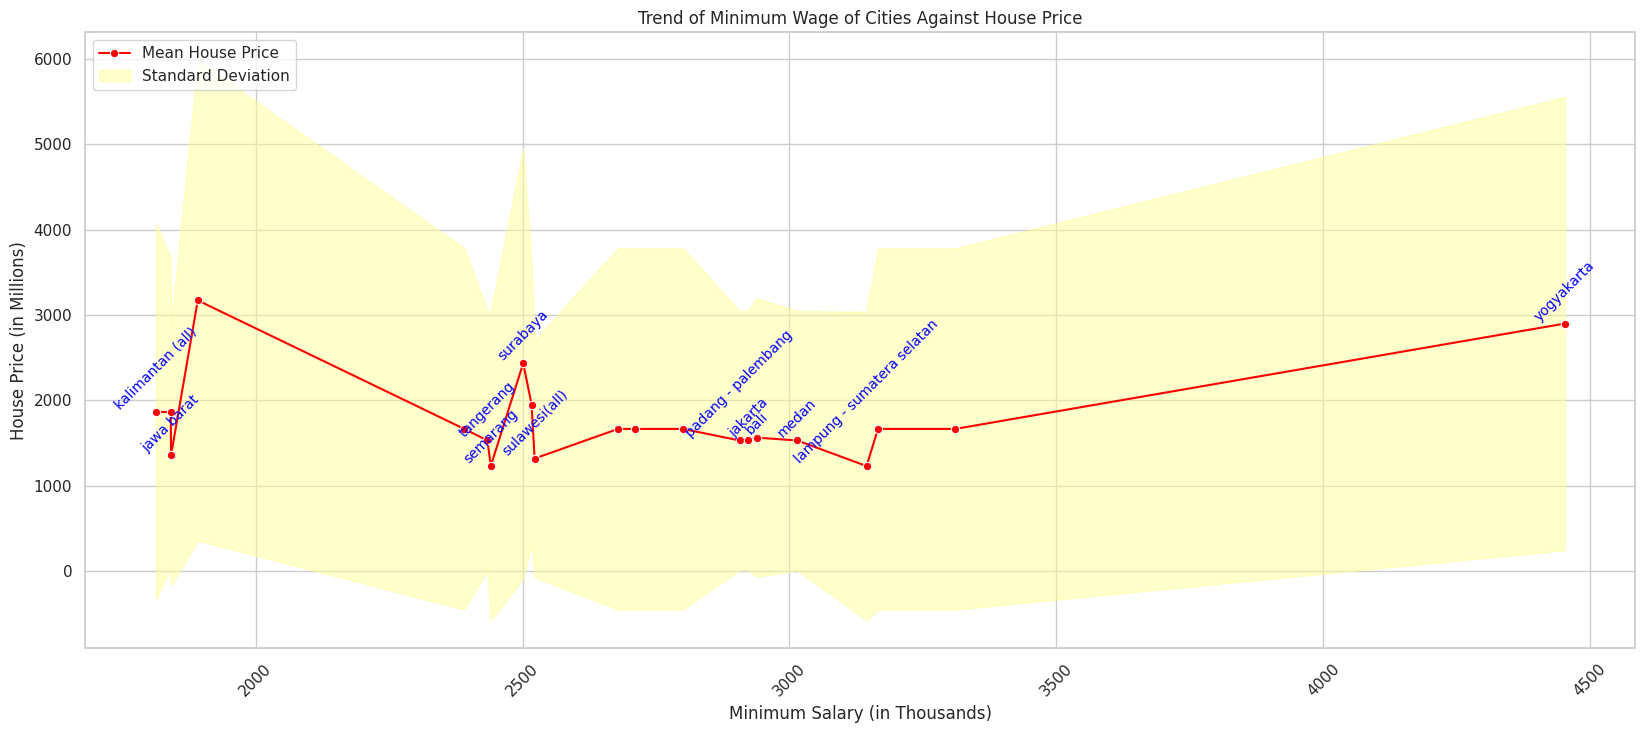

In [111]:
# Create a scatter plot
plt.figure(figsize=(20, 8))

# Scale down the minimum salary
df['ScaledMinimumSalary'] = df['SALARY'] / 1000
# Group the data by 'ScaledMinimumSalary' and calculate mean and standard deviation of 'harga'
mean_prices = df.groupby('ScaledMinimumSalary')['harga'].mean()
std_prices = df.groupby('ScaledMinimumSalary')['harga'].std()
x_values = mean_prices.index

# Create the line plot with a red line
sns.lineplot(x=x_values, y=mean_prices, label='Mean House Price', color='red', marker='o')

# Fill the area between the mean - std and mean + std with a tamer yellow shade
plt.fill_between(x_values, mean_prices - std_prices, mean_prices + std_prices, alpha=0.5, color='#FFFF99', label='Standard Deviation')

# Annotate the plot with city names corresponding to salary values
for salary, NewDaerah in zip(df['SALARY'].unique(), df['NewDaerah'].unique()):
    plt.text(salary / 1000, df[df['SALARY'] == salary]['harga'].mean(), NewDaerah, ha='center', va='bottom', fontsize=10, color='blue', rotation=45)

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add labels and legend
plt.xlabel('Minimum Salary (in Thousands)')
plt.ylabel('House Price (in Millions)')
plt.title("Trend of Minimum Wage of Cities Against House Price")
plt.legend(loc='upper left')

plt.show()

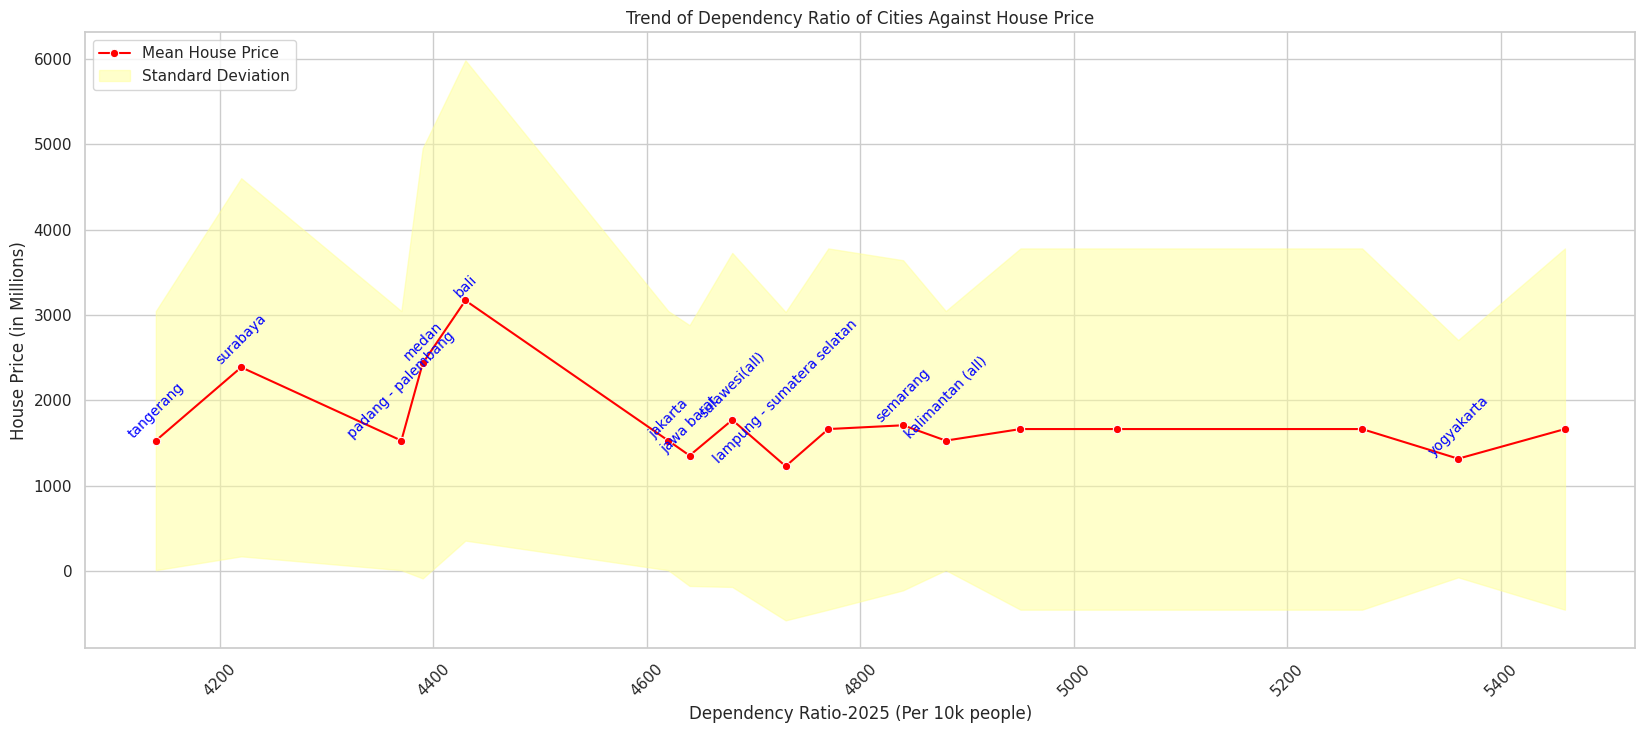

In [112]:
# Create a scatter plot
plt.figure(figsize=(20, 8))

# Scale down the minimum Dependency Ratio-2025
df['ScaledDependency Ratio-2025'] = df['Dependency Ratio-2025'] *100
# Group the data by 'ScaledDependency Ratio-2025' and calculate mean and standard deviation of 'harga'
mean_prices = df.groupby('ScaledDependency Ratio-2025')['harga'].mean()
std_prices = df.groupby('ScaledDependency Ratio-2025')['harga'].std()
x_values = mean_prices.index

# Create the line plot with a red line
sns.lineplot(x=x_values, y=mean_prices, label='Mean House Price', color='red', marker='o')

# Fill the area between the mean - std and mean + std with a tamer yellow shade
plt.fill_between(x_values, mean_prices - std_prices, mean_prices + std_prices, alpha=0.5, color='#FFFF99', label='Standard Deviation')

# Annotate the plot with city names corresponding to Dependency Ratio-2025 values
for DependencyRatio, NewDaerah in zip(df['Dependency Ratio-2025'].unique(), df['NewDaerah'].unique()):
    plt.text(DependencyRatio * 100, df[df['Dependency Ratio-2025'] == DependencyRatio]['harga'].mean(), NewDaerah, ha='center', va='bottom', fontsize=10, color='blue', rotation=45)

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add labels and legend
plt.xlabel('Dependency Ratio-2025 (Per 10k people)')
plt.ylabel('House Price (in Millions)')
plt.title("Trend of Dependency Ratio of Cities Against House Price")
plt.legend(loc='upper left')

plt.show()

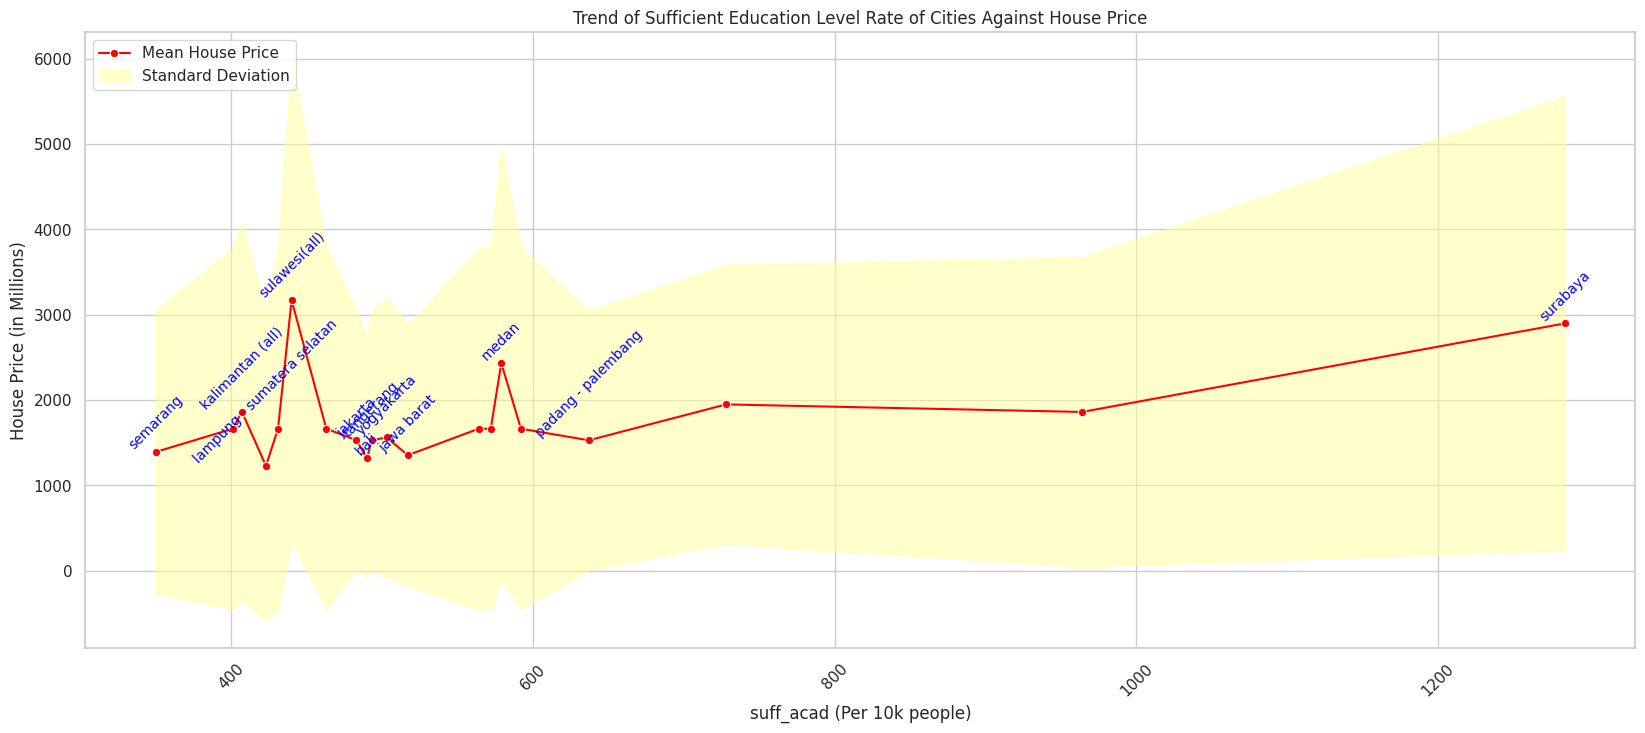

In [113]:
# Create a scatter plot
plt.figure(figsize=(20, 8))

# Scale down the minimum suff_acad
df['Scaledsuff_acad'] = df['suff_acad'] *100
# Group the data by 'Scaledsuff_acad' and calculate mean and standard deviation of 'harga'
mean_prices = df.groupby('Scaledsuff_acad')['harga'].mean()
std_prices = df.groupby('Scaledsuff_acad')['harga'].std()
x_values = mean_prices.index

# Create the line plot with a red line
sns.lineplot(x=x_values, y=mean_prices, label='Mean House Price', color='red', marker='o')

# Fill the area between the mean - std and mean + std with a tamer yellow shade
plt.fill_between(x_values, mean_prices - std_prices, mean_prices + std_prices, alpha=0.5, color='#FFFF99', label='Standard Deviation')

# Annotate the plot with city names corresponding to suff_acad values
for suff_acad, NewDaerah in zip(df['suff_acad'].unique(), df['NewDaerah'].unique()):
    plt.text(suff_acad * 100, df[df['suff_acad'] == suff_acad]['harga'].mean(), NewDaerah, ha='center', va='bottom', fontsize=10, color='blue', rotation=45)

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add labels and legend
plt.xlabel('suff_acad (Per 10k people)')
plt.ylabel('House Price (in Millions)')
plt.title("Trend of Sufficient Education Level Rate of Cities Against House Price")
plt.legend(loc='upper left')

plt.show()

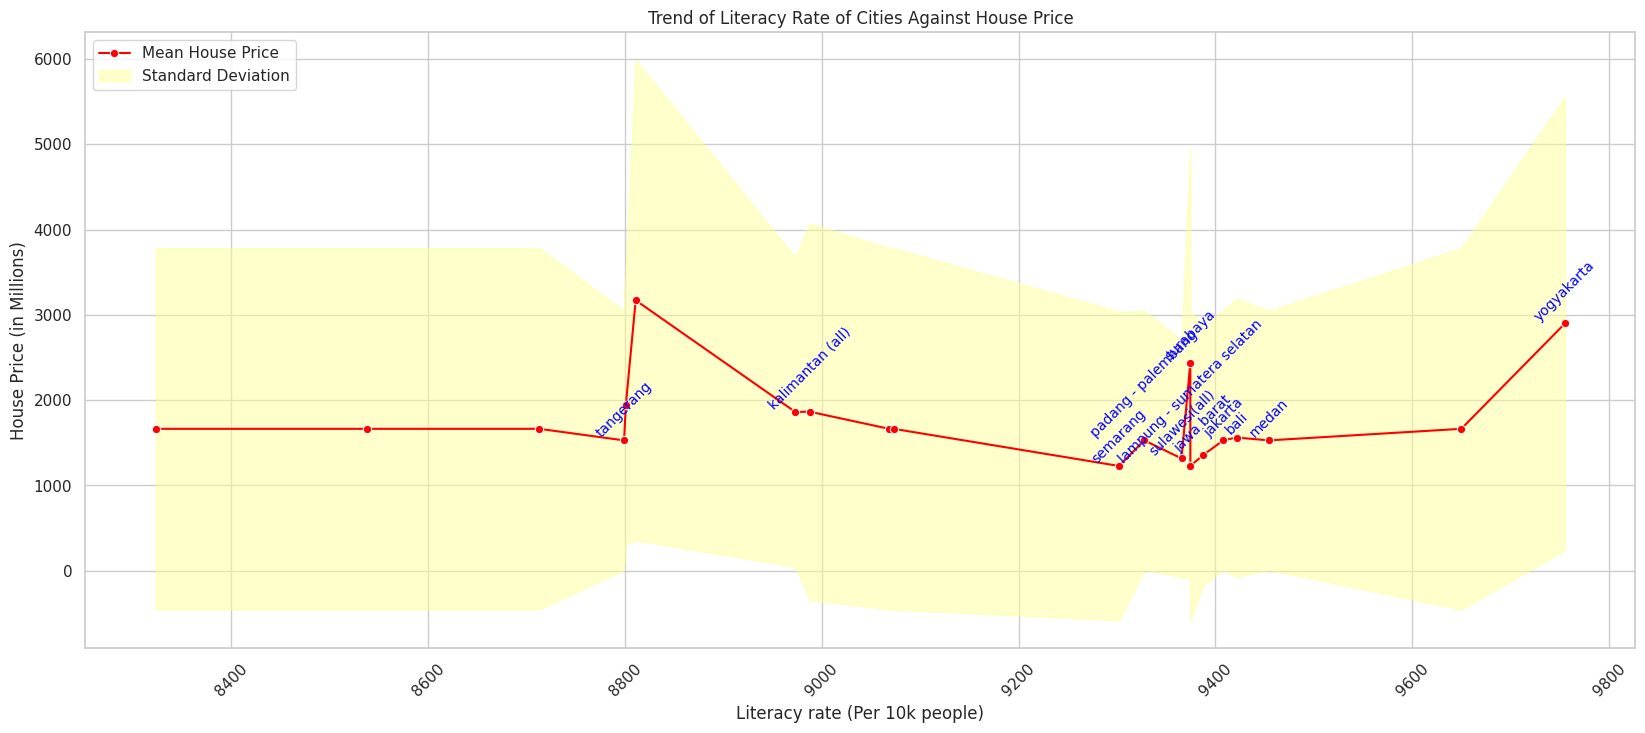

In [114]:
# Create a scatter plot
plt.figure(figsize=(20, 8))

# Scale down the minimum Literacy rate
df['ScaledLiteracy rate'] = df['Literacy rate'] *100
# Group the data by 'ScaledLiteracy rate' and calculate mean and standard deviation of 'harga'
mean_prices = df.groupby('ScaledLiteracy rate')['harga'].mean()
std_prices = df.groupby('ScaledLiteracy rate')['harga'].std()
x_values = mean_prices.index

# Create the line plot with a red line
sns.lineplot(x=x_values, y=mean_prices, label='Mean House Price', color='red', marker='o')

# Fill the area between the mean - std and mean + std with a tamer yellow shade
plt.fill_between(x_values, mean_prices - std_prices, mean_prices + std_prices, alpha=0.5, color='#FFFF99', label='Standard Deviation')

# Annotate the plot with city names corresponding to Literacy rate values
for literacy, NewDaerah in zip(df['Literacy rate'].unique(), df['NewDaerah'].unique()):
    plt.text(literacy * 100, df[df['Literacy rate'] == literacy]['harga'].mean(), NewDaerah, ha='center', va='bottom', fontsize=10, color='blue', rotation=45)

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add labels and legend
plt.xlabel('Literacy rate (Per 10k people)')
plt.ylabel('House Price (in Millions)')
plt.title("Trend of Literacy Rate of Cities Against House Price")
plt.legend(loc='upper left')

plt.show()

####Comments on the Trend



---

Pada beberapa line plot di atas, dapat dilihat bahwa karakteristik masyarakat yang ada pada daerah tidak terlihat tren yang jelas untuk menentukan daerah tertentu berdasarkan karakteristik masyarakat tertentu sehingga kesimpulan akan diambil dengan pendekatan lain.

####Minimum Wage Growth Table Preparation

In [115]:
add_data = df_salary.merge(df_province, left_on='REGION', right_on='Province', how='inner')
add_data.drop('REGION', axis=1, inplace=True)
add_data.head()

SALARY  YEAR Province  Dependency Ratio-2025  Population Urban (%)  \
0  128000  1997     aceh                   50.8                 28.12   
1  147000  1998     aceh                   50.8                 28.12   
2  171000  1999     aceh                   50.8                 28.12   
3  265000  2000     aceh                   50.8                 28.12   
4  300000  2001     aceh                   50.8                 28.12   

   Population Rural (%)  Literacy rate  low_acad  suff_acad  
0                 71.88      91.759558     92.57       6.33  
1                 71.88      91.759558     92.57       6.33  
2                 71.88      91.759558     92.57       6.33  
3                 71.88      91.759558     92.57       6.33  
4                 71.88      91.759558     92.57       6.33

In [116]:
mapping_dict = {
    'aceh': np.nan,  # Not found in 'daerah'
    'sumatera utara': 'Medan',  # Not found in 'daerah'
    'sumatera barat': np.nan,  # Not found in 'daerah'
    'riau': 'Padang - Palembang',  # Mapped to 'Padang - Palembang' in 'daerah'
    'jambi': np.nan,  # Not found in 'daerah'
    'sumatera selatan': 'Lampung - Sumatera selatan',  # Mapped to 'Lampung - Sumatera selatan' in 'daerah'
    'bengkulu': np.nan,  # Not found in 'daerah'
    'lampung': 'Lampung - Sumatera selatan',  # Mapped to 'Lampung - Sumatera selatan' in 'daerah'
    'dki jakarta': 'Jakarta',  # Mapped to 'Jakarta' in 'daerah'
    'jawa barat': 'Bogor',  # Mapped to 'Bogor' in 'daerah'
    'jawa tengah': 'Semarang',  # Mapped to 'Semarang' in 'daerah'
    'di yogyakarta': 'Yogyakarta',  # Mapped to 'Yogyakarta' in 'daerah'
    'jawa timur': 'Surabaya',  # Mapped to 'Surabaya' in 'daerah'
    'banten': 'Tangerang',  # Mapped to 'Tangerang' in 'daerah'
    'bali': 'Bali',  # Mapped to 'Bali' in 'daerah'
    'nusa tenggara barat': np.nan,  # Not found in 'daerah'
    'nusa tenggara timur': np.nan,  # Not found in 'daerah'
    'kalimantan barat': 'Kalimantan (All)',  # Mapped to 'Kalimantan (All)' in 'daerah'
    'kalimantan tengah': 'Kalimantan (All)',  # Mapped to 'Kalimantan (All)' in 'daerah'
    'kalimantan selatan': 'Kalimantan (All)',  # Mapped to 'Kalimantan (All)' in 'daerah'
    'kalimantan timur': 'Kalimantan (All)',  # Mapped to 'Kalimantan (All)' in 'daerah'
    'sulawesi utara': 'Sulawesi(All)',  # Mapped to 'Sulawesi(All)' in 'daerah'
    'sulawesi tengah': 'Sulawesi(All)',  # Mapped to 'Sulawesi(All)' in 'daerah'
    'sulawesi selatan': 'Sulawesi(All)',  # Mapped to 'Sulawesi(All)' in 'daerah'
    'sulawesi tenggara': 'Sulawesi(All)',  # Mapped to 'Sulawesi(All)' in 'daerah'
    'gorontalo': 'Sulawesi(All)',  # Mapped to 'Sulawesi(All)' in 'daerah'
    'sulawesi barat': 'Sulawesi(All)',  # Mapped to 'Sulawesi(All)' in 'daerah'
    'maluku': np.nan,  # Not found in 'daerah'
    'maluku utara': np.nan,  # Not found in 'daerah'
    'papua barat': np.nan,  # Not found in 'daerah'
    'papua': np.nan  # Not found in 'daerah'
}

# Map the property types using the mapping dictionary
add_data['Province'] = add_data['Province'].map(mapping_dict)
add_data['Province'].unique()

array([nan, 'Medan', 'Padang - Palembang', 'Lampung - Sumatera selatan',
       'Jakarta', 'Bogor', 'Semarang', 'Yogyakarta', 'Surabaya', 'Bali',
       'Kalimantan (All)', 'Sulawesi(All)', 'Tangerang'], dtype=object)

In [117]:
add_data = add_data[add_data['YEAR']>=2010]

In [118]:
add_data[add_data['Province']=='Bogor'].head()

SALARY  YEAR Province  Dependency Ratio-2025  Population Urban (%)  \
247   671500  2010    Bogor                   46.4                 65.69   
248   732000  2011    Bogor                   46.4                 65.69   
249   780000  2012    Bogor                   46.4                 65.69   
250   850000  2013    Bogor                   46.4                 65.69   
251  1000000  2014    Bogor                   46.4                 65.69   

     Population Rural (%)  Literacy rate  low_acad  suff_acad  
247                 34.31      93.872261     92.96       5.17  
248                 34.31      93.872261     92.96       5.17  
249                 34.31      93.872261     92.96       5.17  
250                 34.31      93.872261     92.96       5.17  
251                 34.31      93.872261     92.96       5.17

In [119]:
add_data.dropna(inplace=True)

<ipython-input-119-e38433ffcddd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add_data.dropna(inplace=True)


####Minimum Wage Growth Early Analysis

In [120]:
# Initialize a list to store DataFrames for each province
dfs = []

# Loop through unique provinces
for province in add_data['Province'].unique():
    province_data = add_data[add_data['Province'] == province]

    # Calculate the percentage increase
    start_salary = province_data['SALARY'].iloc[0]
    end_salary = province_data['SALARY'].iloc[-1]
    percentage_increase = ((end_salary - start_salary) / start_salary) * 100

    # Create a DataFrame for the province
    province_df = pd.DataFrame({'Province': [province], 'Percentage Growth': [percentage_increase]})

    # Append the DataFrame to the list
    dfs.append(province_df)

# Concatenate all DataFrames into a single result DataFrame
result_df = pd.concat(dfs, ignore_index=True)

# Sort the result DataFrame by percentage growth (highest to lowest)
result_df = result_df.sort_values(by='Percentage Growth', ascending=False)

# Display the sorted result DataFrame
result_df

Province  Percentage Growth
9             Kalimantan (All)         306.814710
3                      Jakarta         298.272644
8                         Bali         203.499631
7                     Surabaya         200.248730
1           Padang - Palembang         189.228740
5                     Semarang         174.698636
4                        Bogor         174.234847
10               Sulawesi(All)         167.886300
2   Lampung - Sumatera selatan         163.033007
11                   Tangerang         161.823825
0                        Medan         161.410259
6                   Yogyakarta         146.877540



---

Pendekatan yang digunakan adalah pertumbuhan gaji minimum yang akan berkorespondensi dengan lebih cepatnya pertumbuhan pendapatan masyarakat dan kemampuan membeli rumah sehingga *demand* akan lebih banyak pada daerah tertentu. Meskipun hasil tabel di atas adalah kenaikan gaji minimum sejak tahun 2010, tidak bisa dijadikan indikator sejati untuk keseluruhan tren yang bagus, sebab tren beberapa tahun yang dekat dengan tahun ini lebih harus diperhatikan.

####Deeper Minimum Wage Analysis by Line Plot

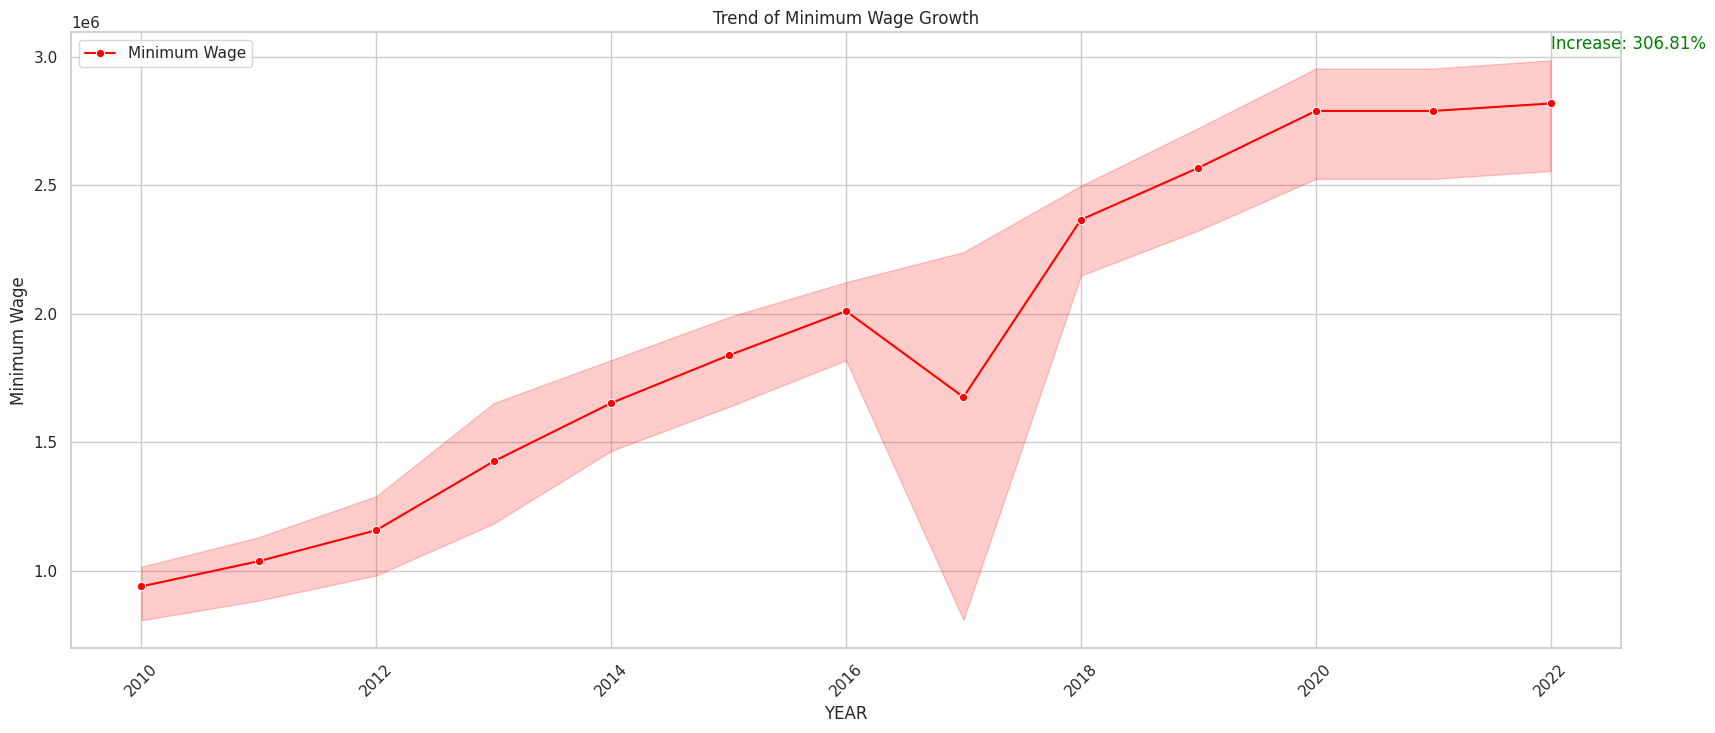

In [121]:
def Temp_Salary_Growth_Function(prov: str):
  # Create a scatter plot
  plt.figure(figsize=(20, 8))

  # Create the line plot with a red line
  sns.lineplot(x=add_data[add_data['Province']==prov]['YEAR'], y=add_data[add_data['Province']==prov]['SALARY'], label='Minimum Wage', color='red', marker='o')

  # Rotate the x-axis labels by 45 degrees
  plt.xticks(rotation=45)

  # Add labels and legend
  plt.xlabel('YEAR')
  plt.ylabel('Minimum Wage')
  plt.title("Trend of Minimum Wage Growth")
  plt.legend(loc='upper left')

  # Calculate the percentage increase
  start_salary = add_data[add_data['Province']==prov]['SALARY'].iloc[0]
  end_salary = add_data[add_data['Province']==prov]['SALARY'].iloc[-1]
  percentage_increase = ((end_salary - start_salary) / start_salary) * 100

  # Define the coordinates for the text
  text_x = add_data[add_data['Province']==prov]['YEAR'].iloc[-1]
  text_y = end_salary

  # Add the text to the plot
  plt.text(text_x, text_y, f'Increase: {percentage_increase:.2f}%', ha='left', va='bottom', fontsize=12, color='green')

  plt.show()

Temp_Salary_Growth_Function(prov='Kalimantan (All)')

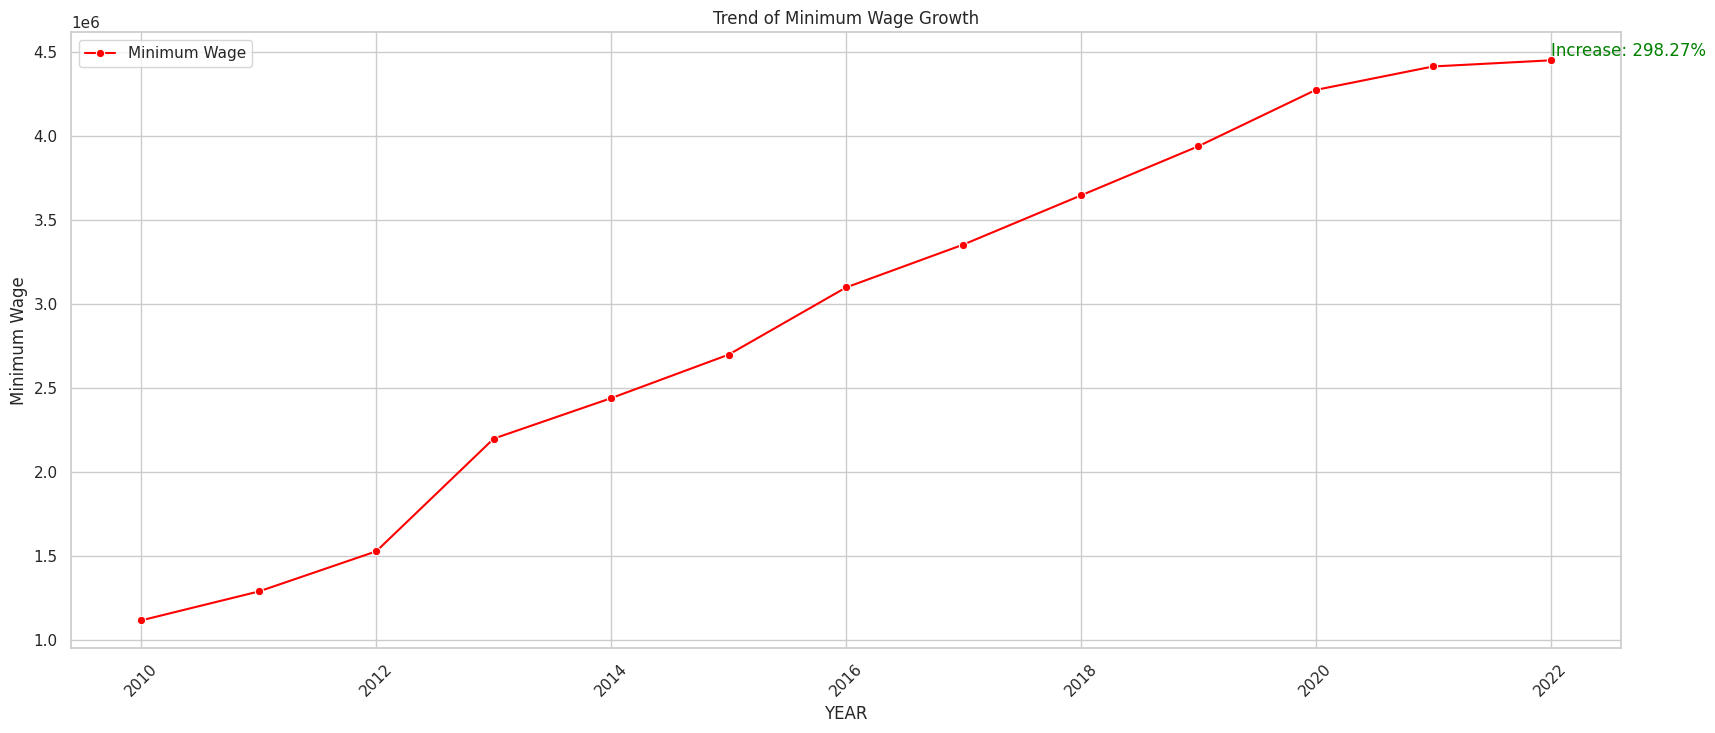

In [122]:
Temp_Salary_Growth_Function('Jakarta')

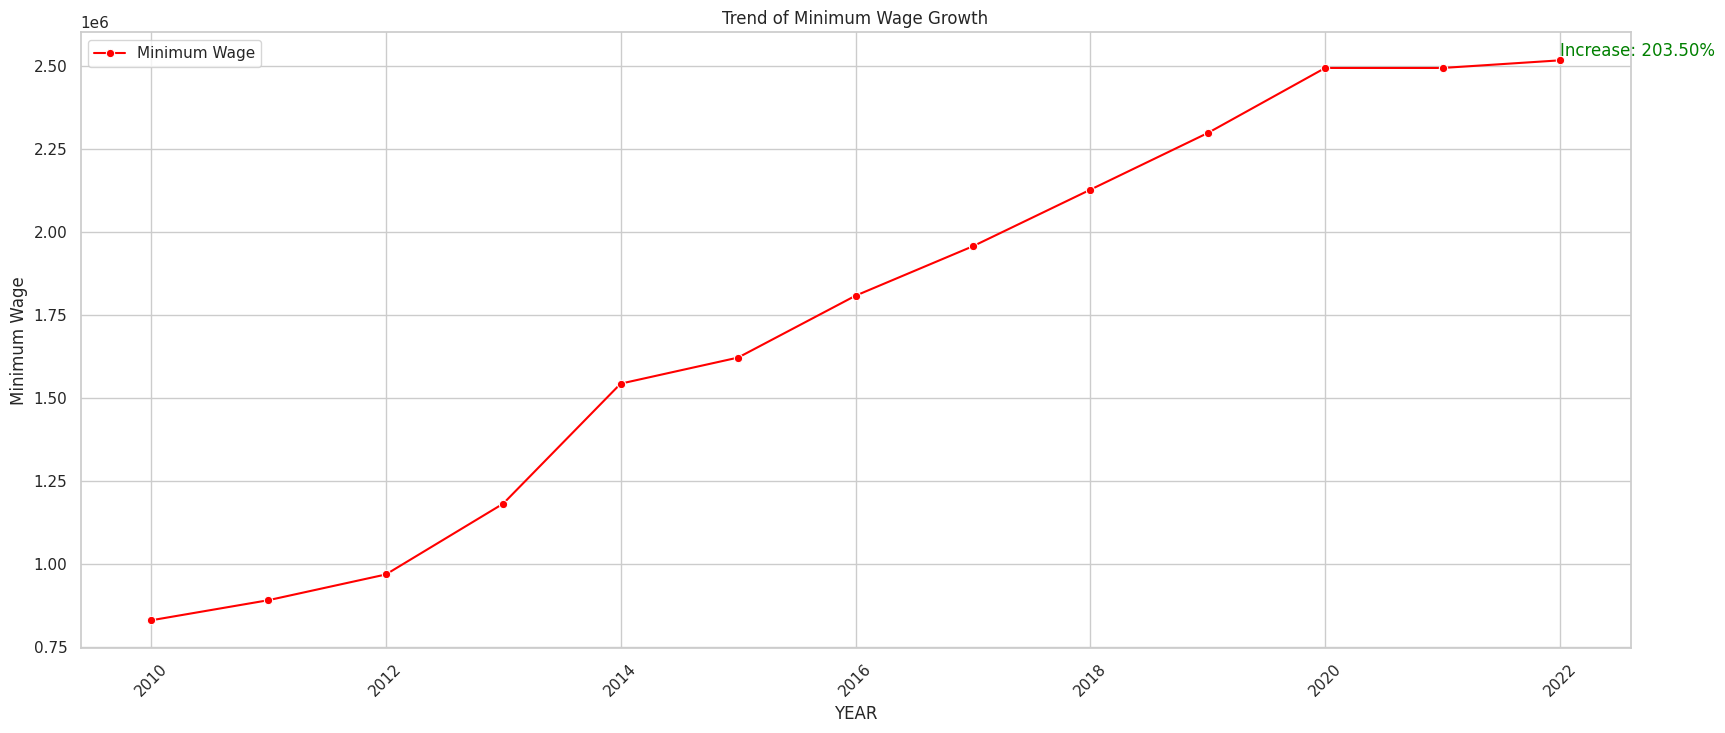

In [123]:
Temp_Salary_Growth_Function('Bali')

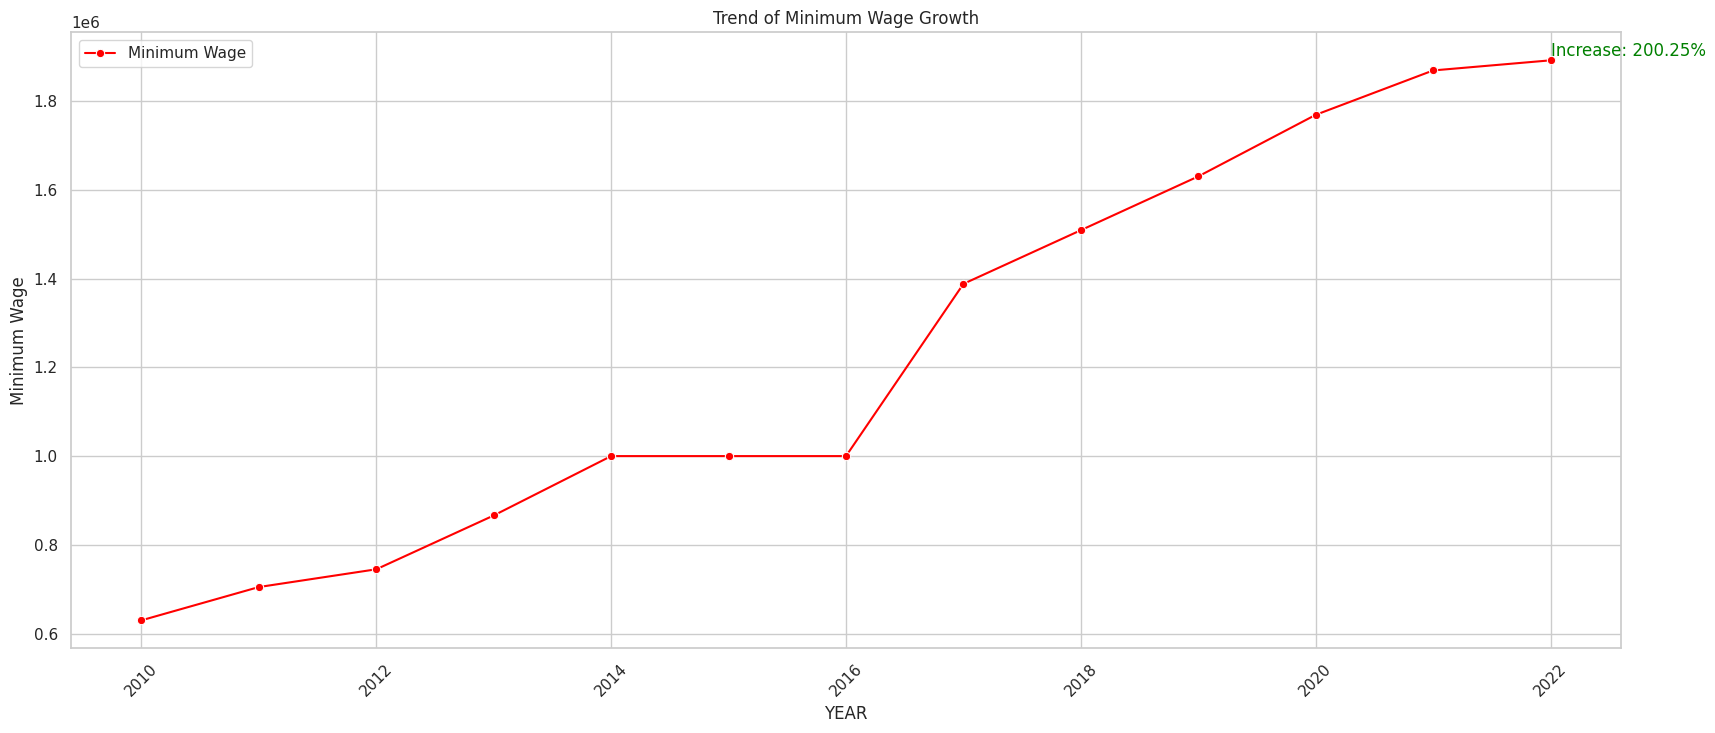

In [124]:
Temp_Salary_Growth_Function('Surabaya')

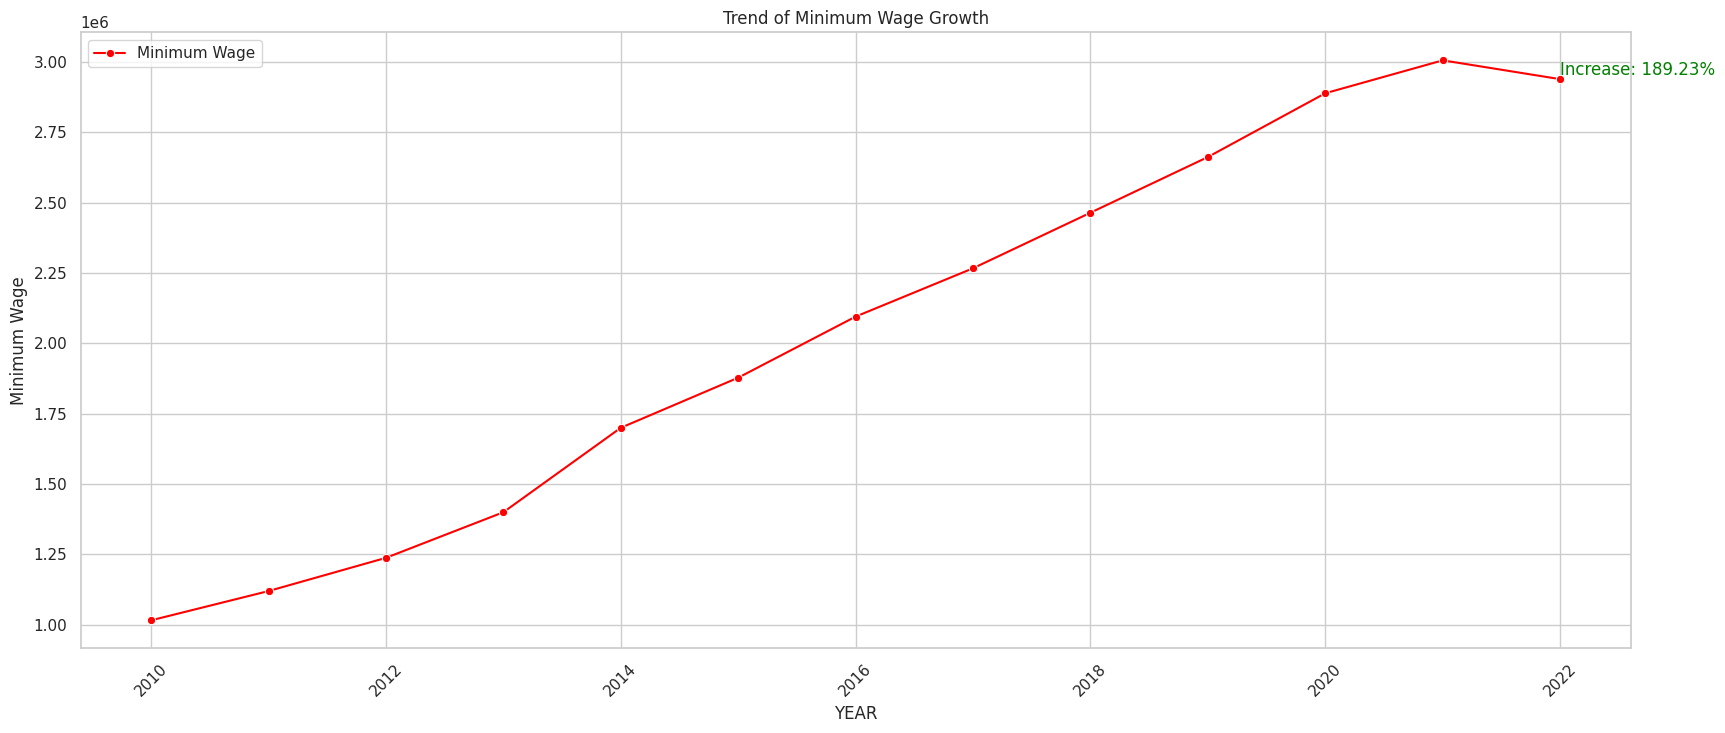

In [125]:
Temp_Salary_Growth_Function('Padang - Palembang')

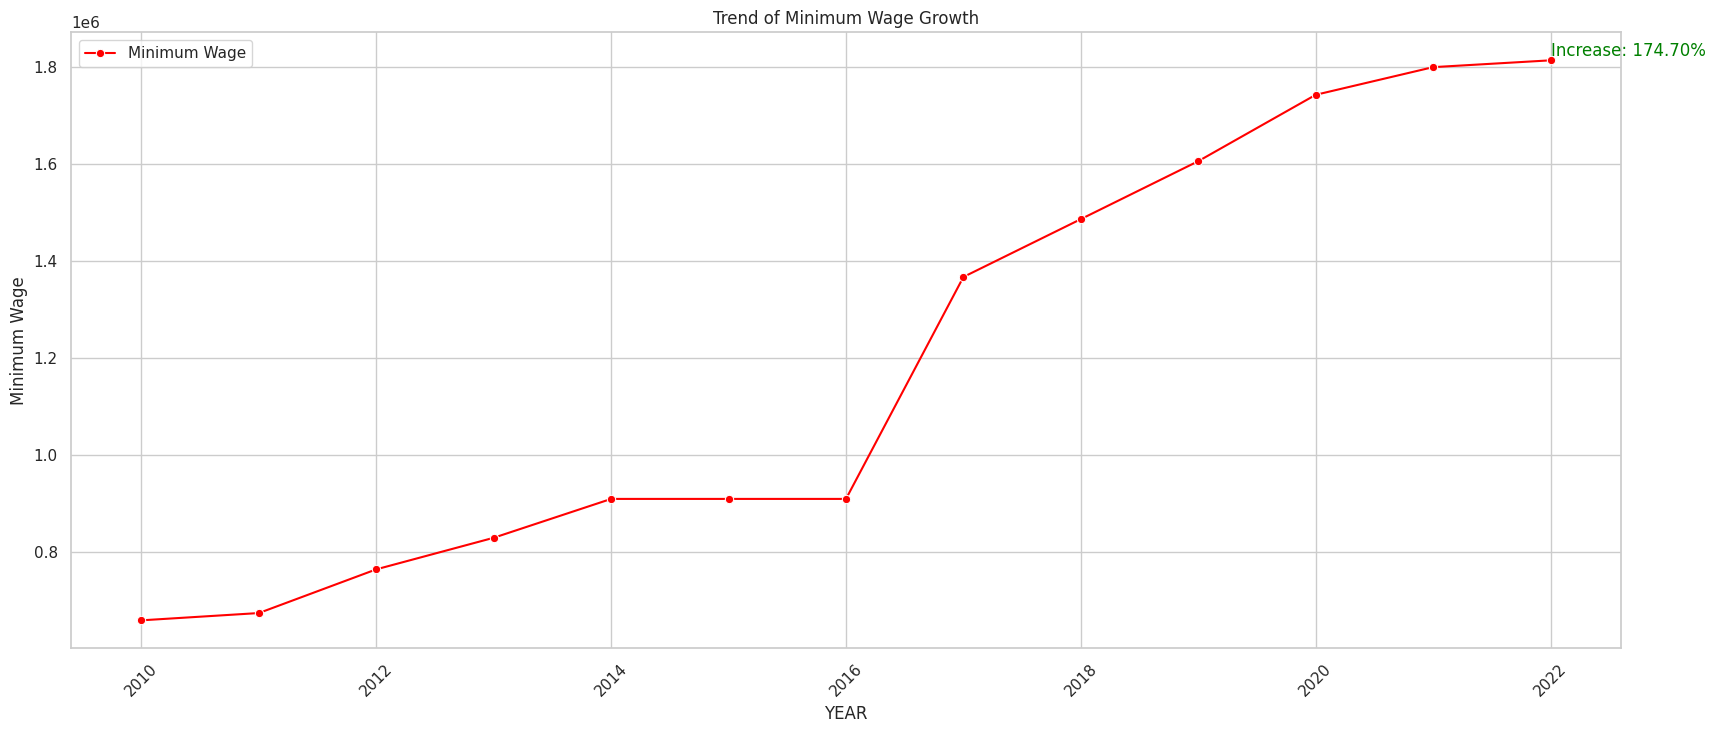

In [126]:
Temp_Salary_Growth_Function('Semarang')

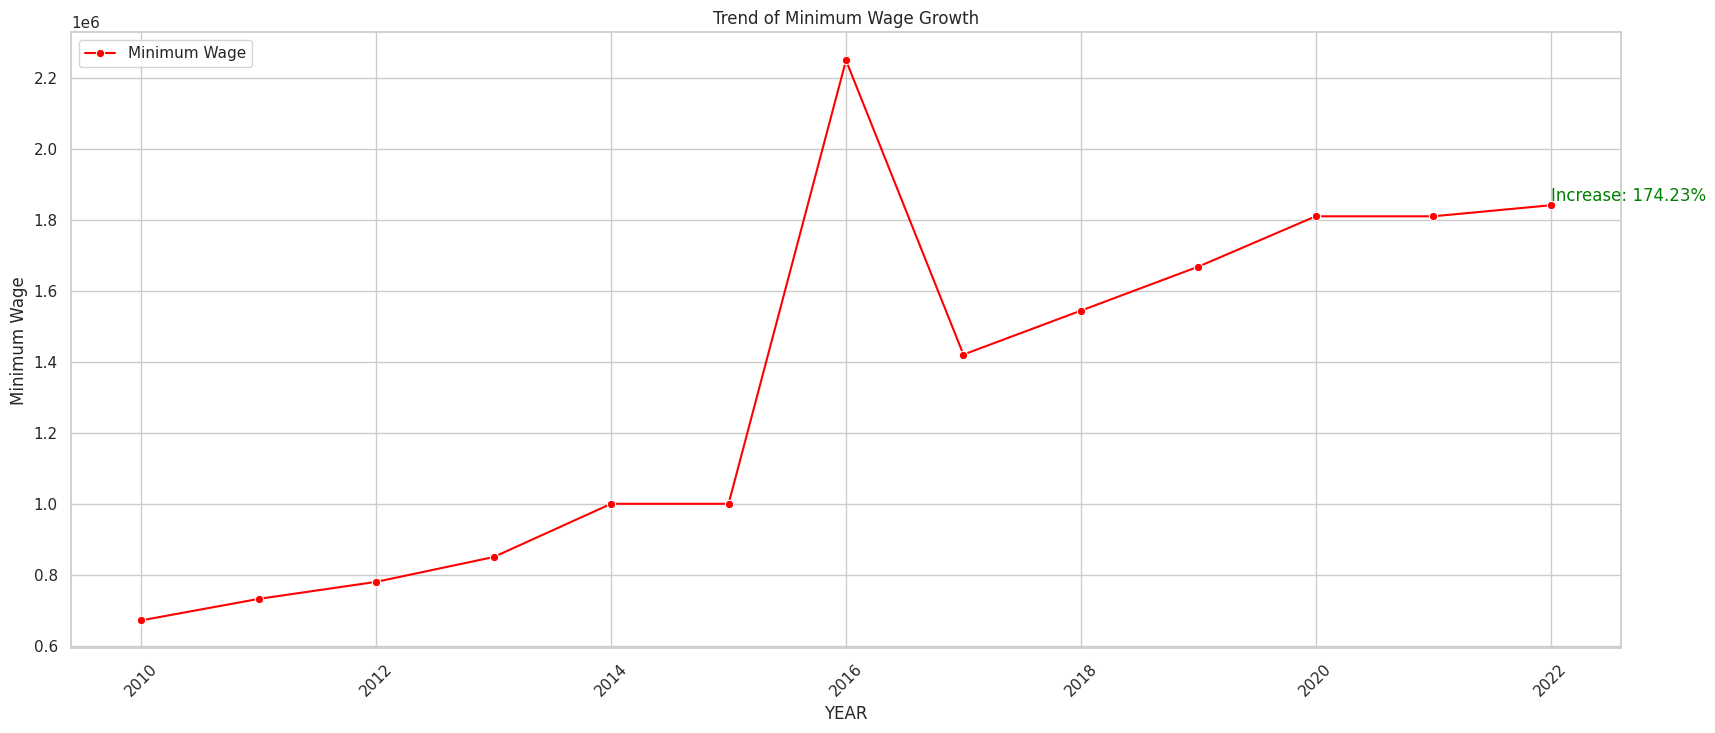

In [127]:
Temp_Salary_Growth_Function('Bogor')

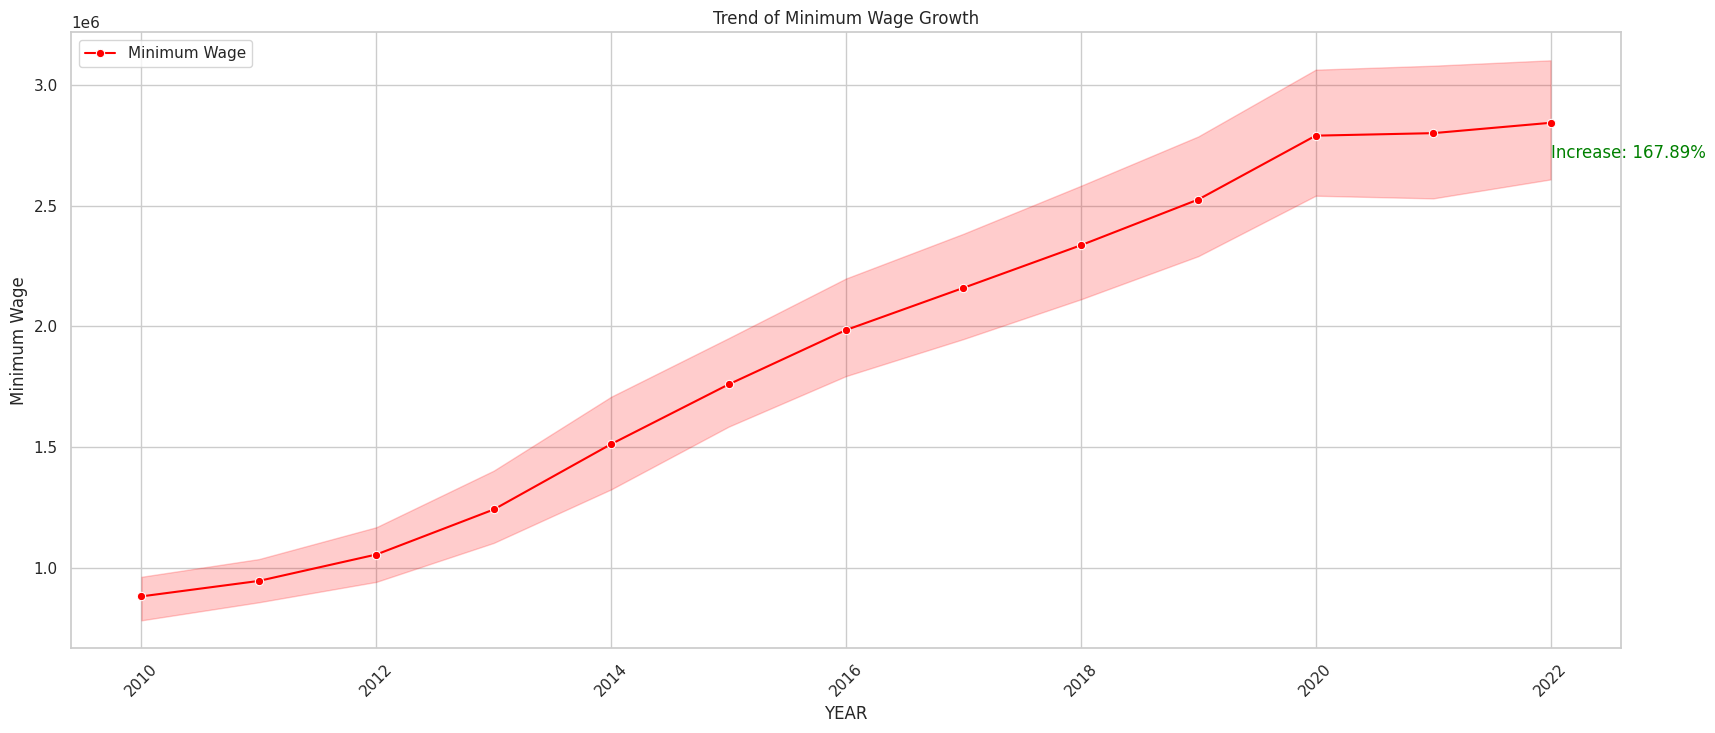

In [128]:
Temp_Salary_Growth_Function('Sulawesi(All)')

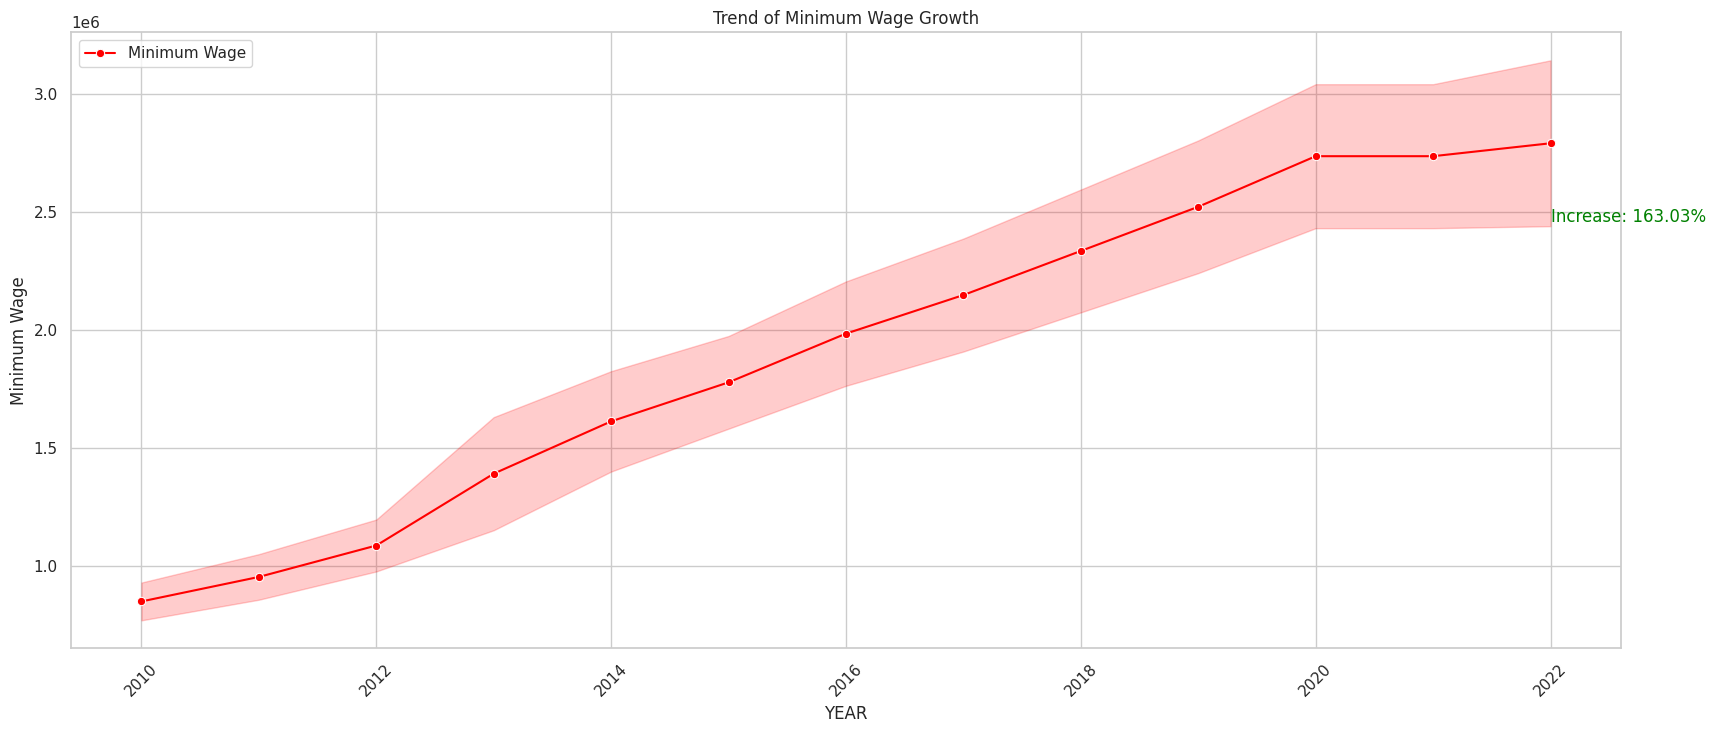

In [129]:
Temp_Salary_Growth_Function('Lampung - Sumatera selatan')

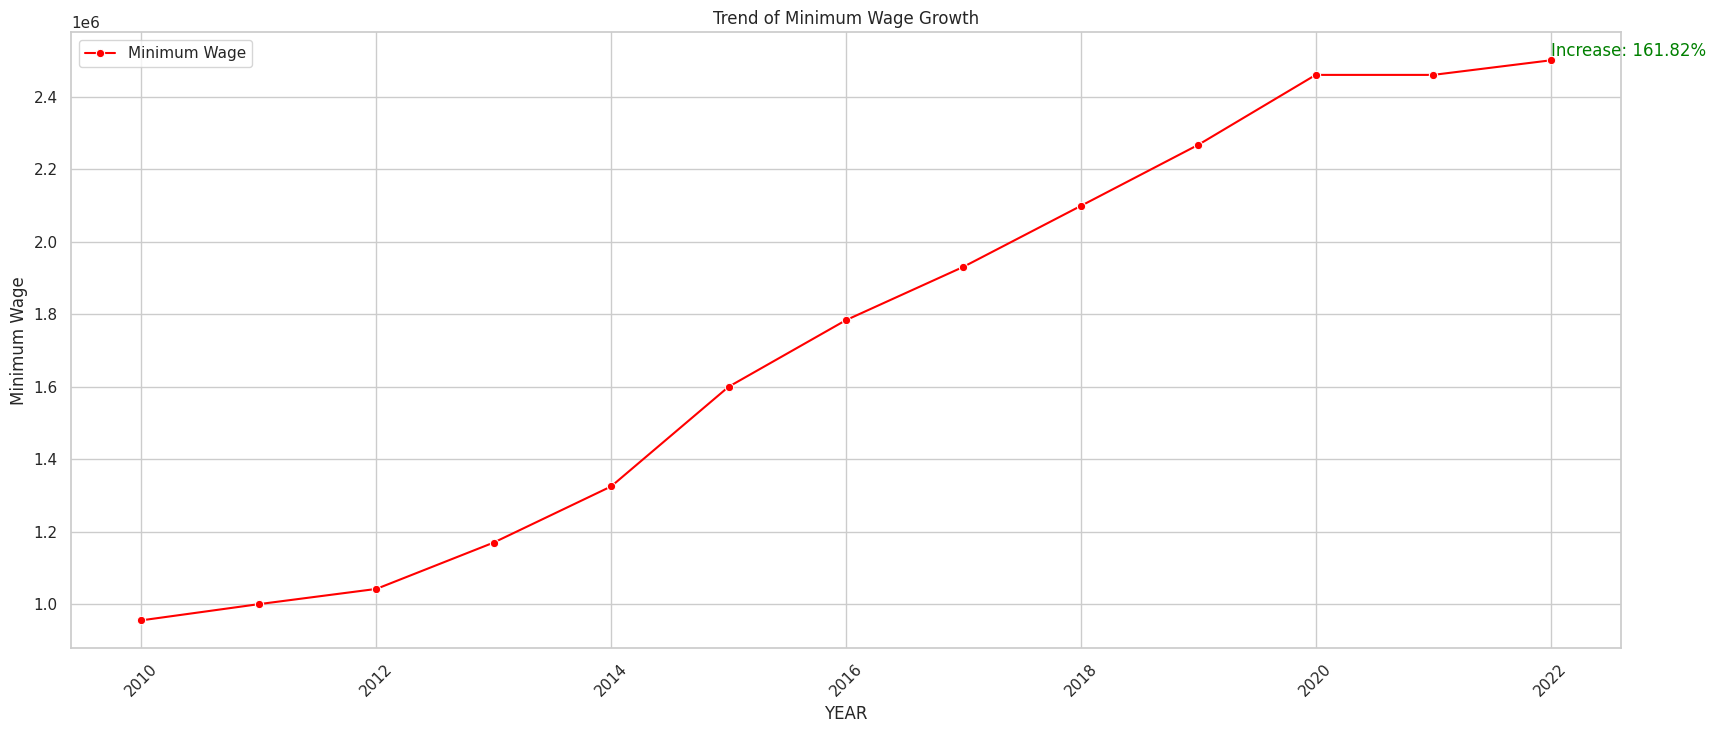

In [130]:
Temp_Salary_Growth_Function('Tangerang')

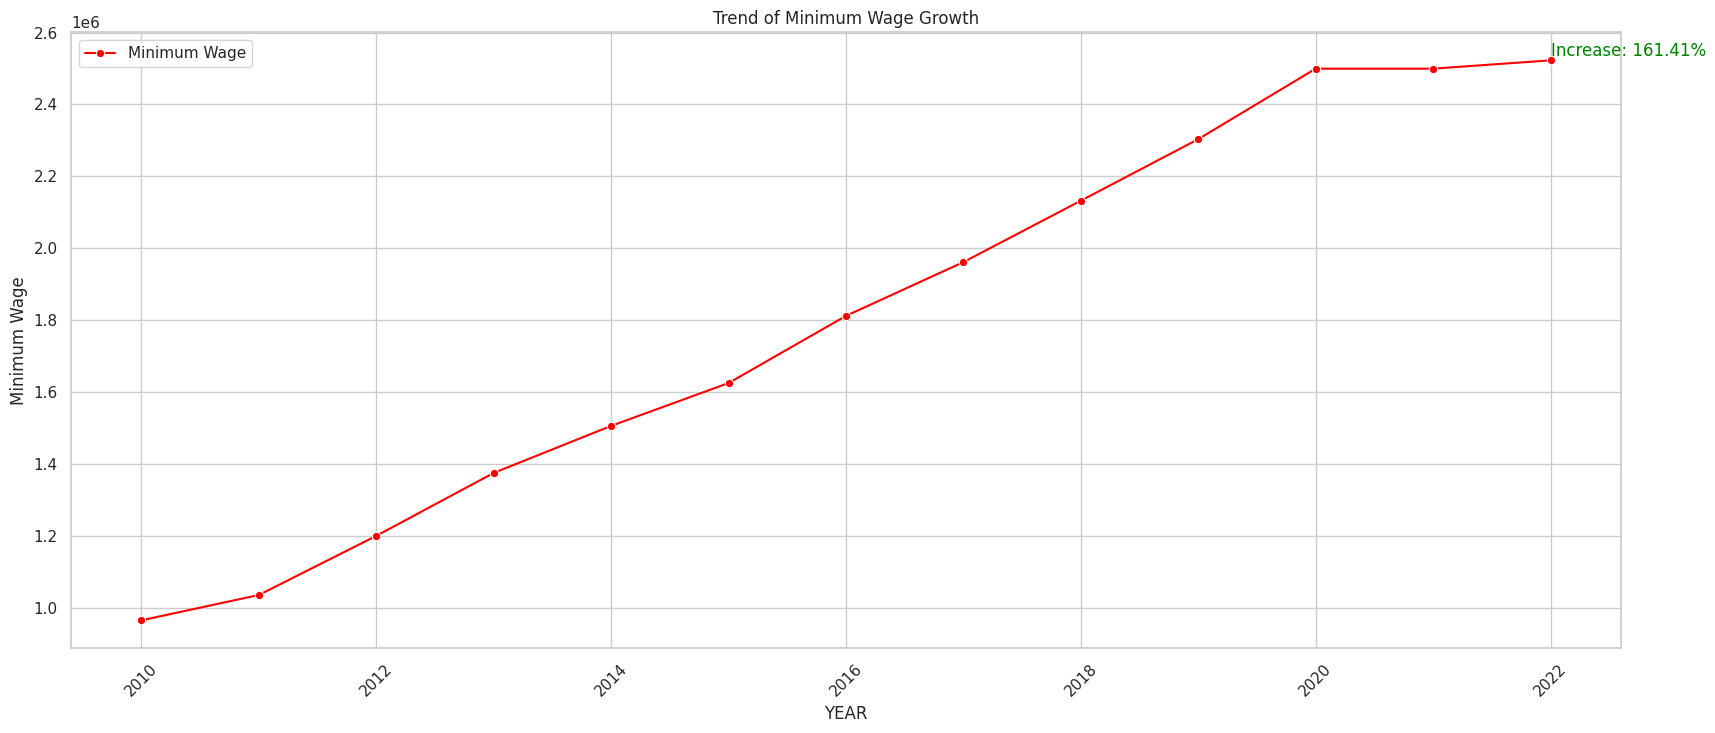

In [131]:
Temp_Salary_Growth_Function('Medan')

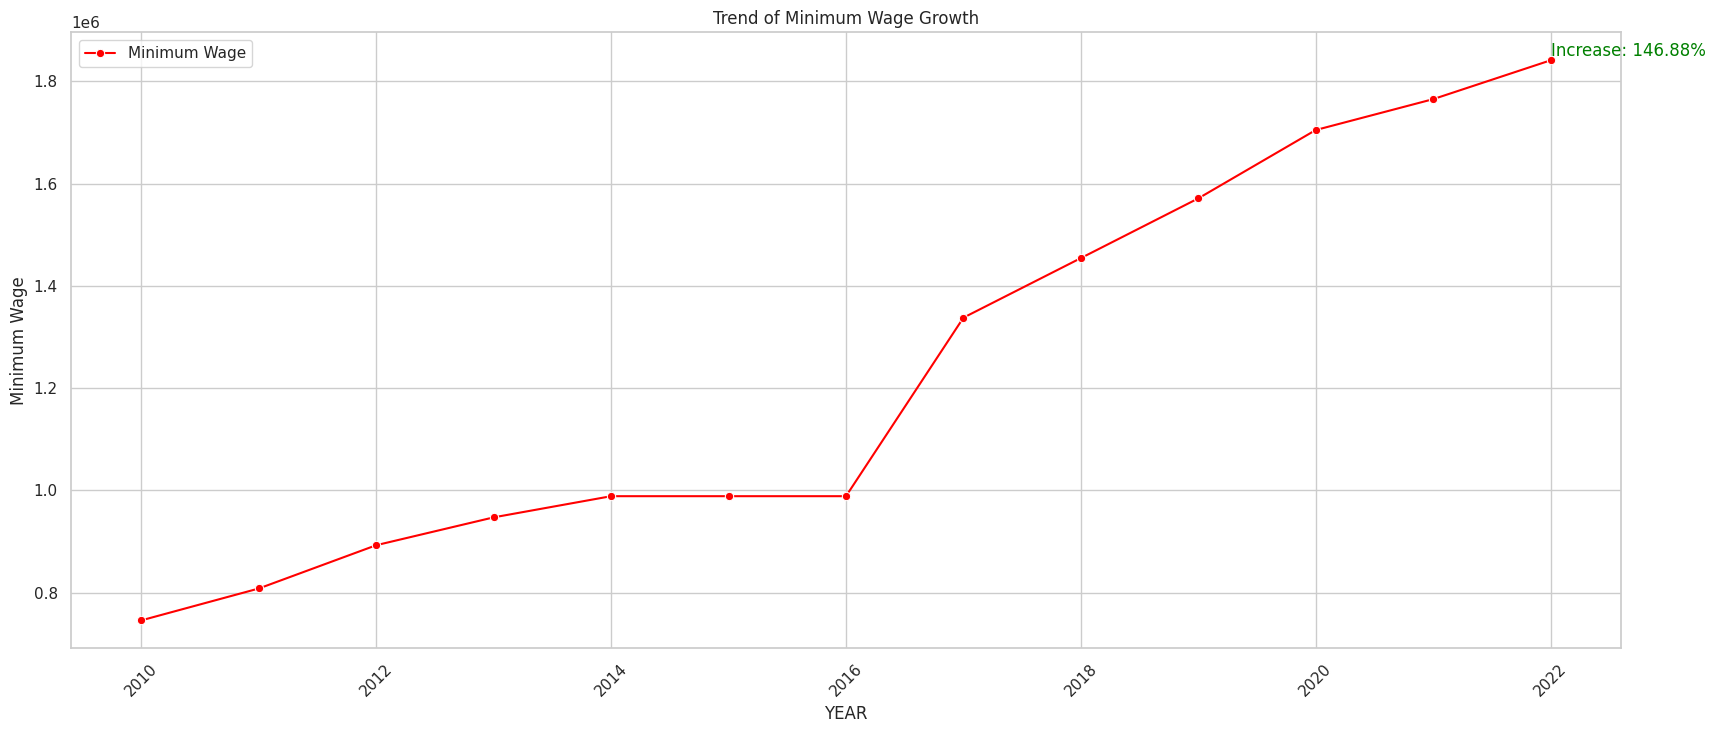

In [132]:
Temp_Salary_Growth_Function('Yogyakarta')

####Conclusion and Comments

Surabaya memiliki tren gaji minimum yang naik cukup tinggi dengan tren beberapa tahun ini masih bagus, meski dengan rata-rata harga rumah yang tinggi. Apabila perusahaan memiliki tujuan yang selaras dengan kecenderungan menjual rumah yang lebih mahal, maka Surbaya adalah lokasi yang kami sarankan.

Medan adalah pilihan yang dapat dipertimbangkan jika memang mengincar rumah yang cenderung lebih murah meski kenaikan gaji minimum cukup stagnan beberapa tahun belakangan.

Yogyakarta terlihat tren yang masih cukup bagus, tetapi secara keseluruhan, kenaikan gaji minimum masih rendah dengan harga rumahnya pun tidak sepadan dengan nilai dan kenaikan gaji minimum yang cukup rendah sehingga tidak kami sarankan.

Akan tetapi, menurut kami data yang disediakan tidak cukup untuk menentukan secara lebih pasti daerah yang lebih strategis untuk membuka cabang. Saran yang kami berikan pun masih hanya dari faktor eksternal saja, bukan mengacu ke rumah itu sendiri dan karakteristik-karakteristik yang ada di daerah-daerah tertentu. Untuk mendapatkan insight yang lebih kritis, dibutuhkan berbagai macam data tambahan pada masing-masing daerah, seperti jumlah rumah yang berhasil terjual, pertumbuhan harga dan jumlah penjualan rumah per periode waktu, hingga informasi geografi umum terkait.

###No. 5
---
**Rumah dengan karakteristik seperti apa yang paling banyak dijual?**

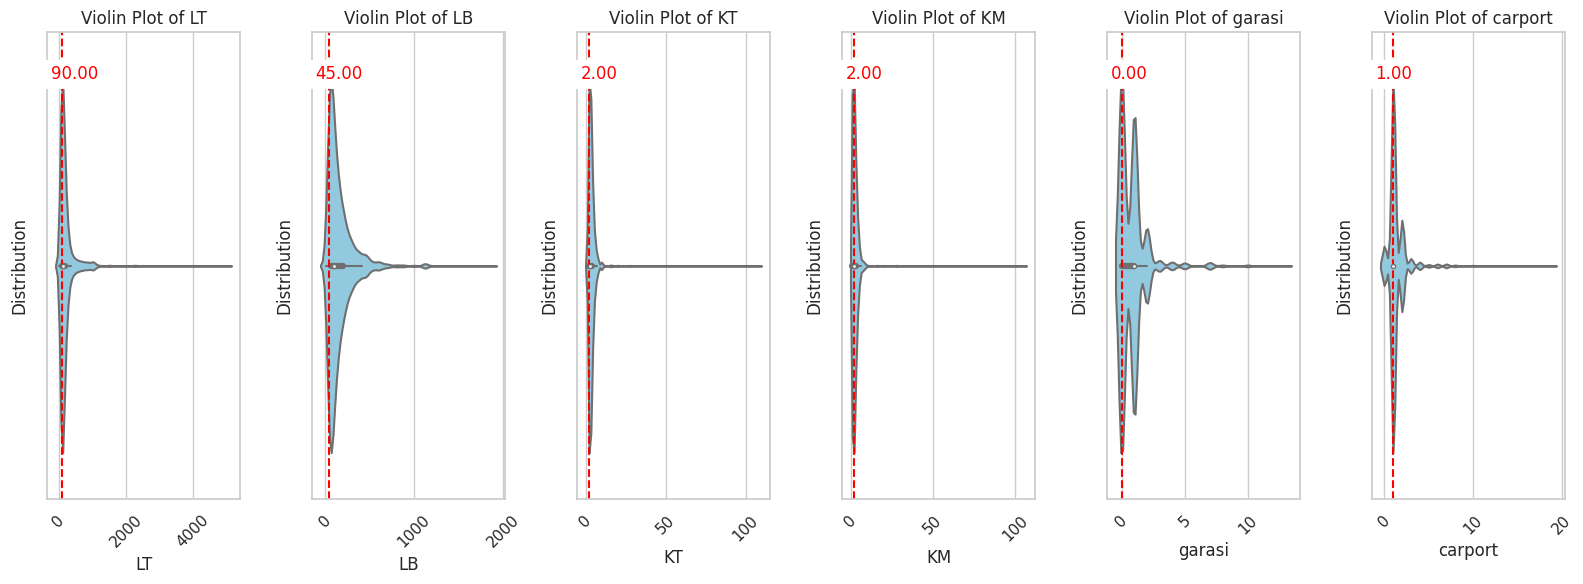

In [134]:
# Specify the column names containing float values
columns_to_plot = ['LT', 'LB', 'KT', 'KM', 'garasi', 'carport']

# Create subplots
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(16, 6))

# Plot violin plots for each column
for i, column_name in enumerate(columns_to_plot):
    sns.violinplot(data=df, x=column_name, ax=axes[i], color='skyblue')
    axes[i].set_xlabel(column_name)
    axes[i].set_ylabel('Distribution')
    axes[i].set_title(f'Violin Plot of {column_name}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability if needed

    # Calculate the mode excluding NaN values
    values = df[column_name].dropna()

    if len(values) > 0:
        mode = values.mode().values[0]
        axes[i].axvline(x=mode, color='red', linestyle='--', label=f'{mode:.2f}')
        axes[i].text(0.02, 0.9, f'{mode:.2f}', transform=axes[i].transAxes, fontsize=12, color='red', bbox=dict(facecolor='white', edgecolor='none'))

plt.tight_layout()
plt.show()



---

Karakteristik yang bisa dilihat untuk rumah yang dijual adalah pada luas tanah dan bangunan. Luas tanah cenderung terkonsentrasi di sekitar 90 m^2 dengan sedikit lebih condong ke lebih dari 90m^2 meski berpuncak di titik tersebut. Mirip dengan luas tanah, luas bangunan berpuncak di 45m^2, tetapi lebih jelas dalam kecenderungan luasnya yang lebih dari 45m^2. Untuk jumlah kamar tidur dan kamar mandi juga memiliki karakteristik yang mirip dengan puncaknya pada 2 kamar tidur dan kamar mandi, tetapi lebih jelas bahwa jumlah mereka tidak berbeda jauh dari 2 untuk kebanyakan rumah. Sementara itu, pada garasi dan carport, hasil bisa bias karena banyaknya *missing values* yang bisa disebabkan ketidakadaan dari awal, tetapi bukan diisi 0, melainkan hanya dikosongkan. Meski demikian, garasi tetap terbanyak pada jumlah 0, tetapi untuk yang mencantumkan jumlahnya, 2 garasi adalah jumlah yang paling umum ditemukan. Pada carport, hal yang sama dengan garasi bisa dikatakan juga untuk carport dengan perbedaannya bagi yang mengisi jumlah carport terkonsentrasi di 1 carport.

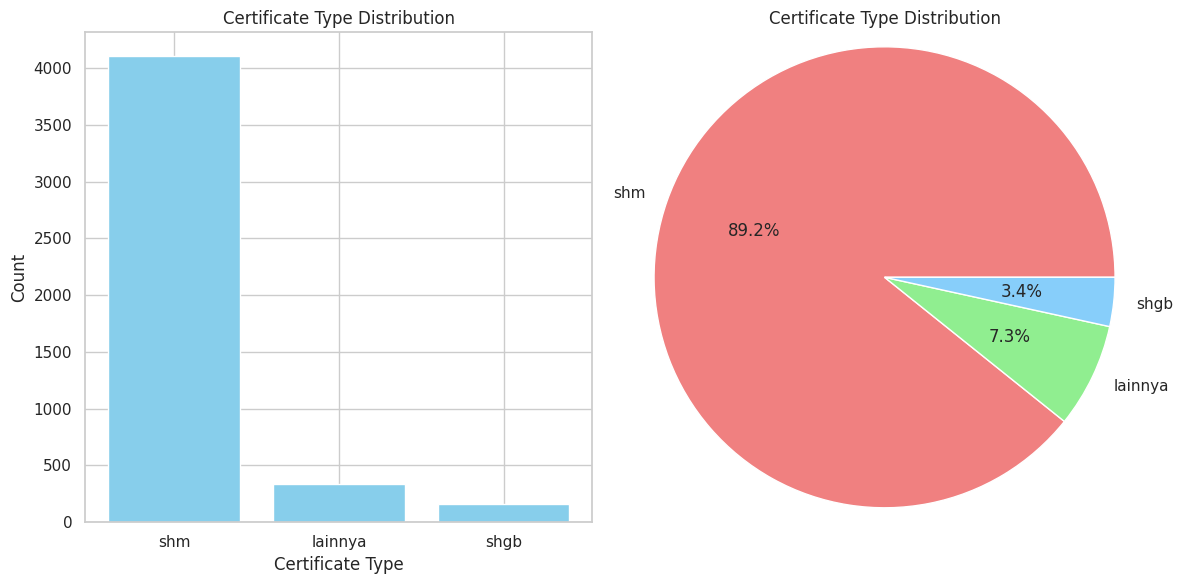

In [135]:
# Count the occurrences of each certificate type
certificate_counts = df['sertifikat'].value_counts()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create a bar plot for certificate counts
ax1.bar(certificate_counts.index, certificate_counts.values, color='skyblue')
ax1.set_xlabel('Certificate Type')
ax1.set_ylabel('Count')
ax1.set_title('Certificate Type Distribution')

# Create a pie plot for certificate counts
ax2.pie(certificate_counts, labels=certificate_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightskyblue'])
ax2.set_title('Certificate Type Distribution')

# Ensure both plots have equal aspect ratio for the pie chart to be circular
ax2.axis('equal')

plt.tight_layout()
plt.show()



---

Untuk sertifikat rumah yang dijual, sertifikat SHM jelas merupakan sertifikat yang jauh lebih banyak ditawarkan dibanding sertifikat lainnya. SHGB jauh lebih sedikit dibanding SHM, sementara "lainnya" yang terdiri dari banyak jenis sertifikat lainnya pun tetap berjumlah jauh lebih sedikit dibanding SHM.

###No. 6
---
**Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?**



---

Pemilihan rumah yang tepat tentunya membutuhkan banyak pertimbangan lainnya yang belum ada pada data kami, tetapi kami bisa memberi beberapa insight untuk rumah yang dengan harganya, cukup menarik untuk diinvestasikan.

####Explore the Plots

---
Berhubung investasi maksimum adalah 25 Milyar, tentunya hanya menginvestasikan ke sedikit rumah akan berisiko sehingga kami menampilkan rumah dengan maksimum berharga 4 Milyar.

<ipython-input-101-5e921ad3cd5d>:35: UserWarning: The palette list has more values (147) than needed (90), which may not be intended.
  sns.swarmplot(data=df_1, x=x_1, y=y_1, hue=hue_1, ax=axes[0], s=5, palette=custom_palette)
<ipython-input-101-5e921ad3cd5d>:39: UserWarning: The palette list has more values (147) than needed (94), which may not be intended.
  sns.swarmplot(data=df_2, x=x_2, y=y_2, hue=hue_2, ax=axes[1], s=5, palette=custom_palette)


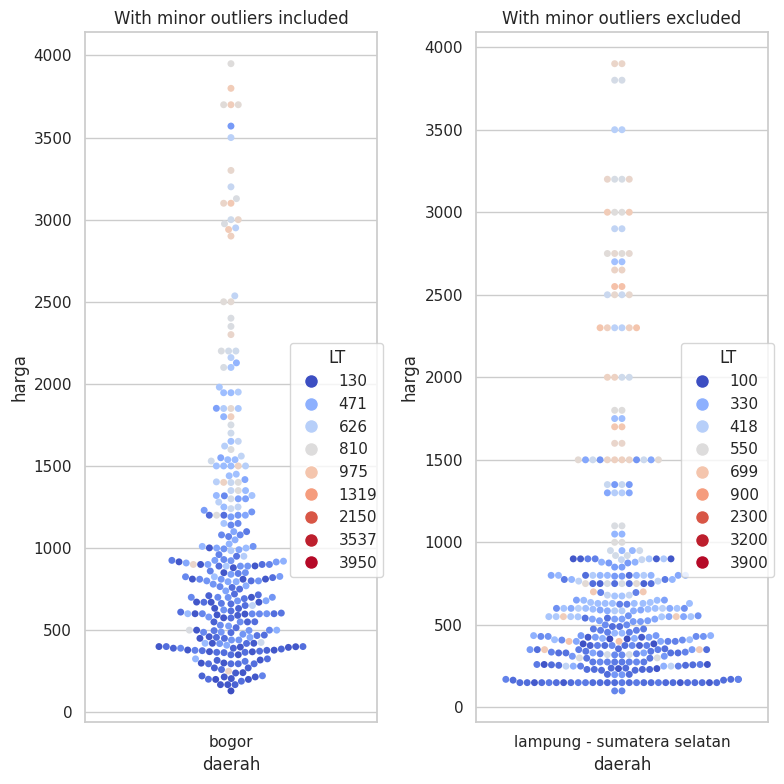

In [158]:
two_swarmplots(df_1=df[(df['daerah']=='bogor') & (df['harga'] <= 4e3)], df_2=df[(df['daerah']=='lampung - sumatera selatan') & (df['harga'] <= 4e3)], x_1='daerah', x_2='daerah',
               y_1='harga', y_2='harga', hue_1='LT',
               hue_2='LT',
               title1='With minor outliers included',
               title2="With minor outliers excluded",
               figsize=(8, 8))

---
Bogor terlihat beberapa yang menarik, tetapi ada yang di harga sekitar 250 juta yang sangat menarik, sementara Lampung - Sumatera Selatan memiliki banyak rumah murah dengan luas tanah yang signifikan yang juga dapat dipertimbangkan.

<ipython-input-101-5e921ad3cd5d>:35: UserWarning: The palette list has more values (160) than needed (90), which may not be intended.
  sns.swarmplot(data=df_1, x=x_1, y=y_1, hue=hue_1, ax=axes[0], s=5, palette=custom_palette)
<ipython-input-101-5e921ad3cd5d>:39: UserWarning: The palette list has more values (160) than needed (105), which may not be intended.
  sns.swarmplot(data=df_2, x=x_2, y=y_2, hue=hue_2, ax=axes[1], s=5, palette=custom_palette)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


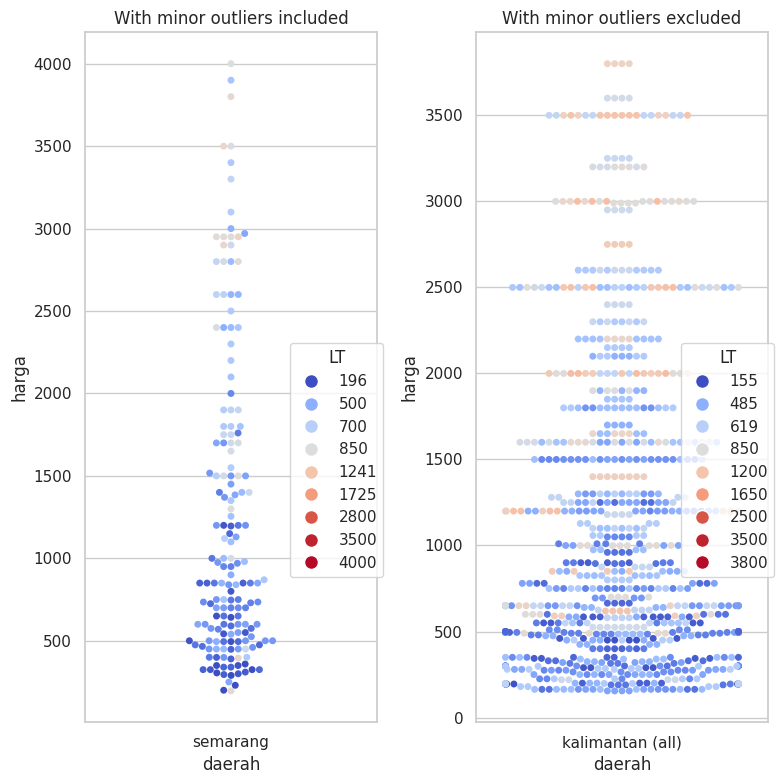

In [159]:
two_swarmplots(df_1=df[(df['daerah']=='semarang')& (df['harga'] <= 4e3)], df_2=df[(df['daerah']=='kalimantan (all)')& (df['harga'] <= 4e3)], x_1='daerah', x_2='daerah',
               y_1='harga', y_2='harga', hue_1='LT',
               hue_2='LT',
               title1='With minor outliers included',
               title2="With minor outliers excluded",
               figsize=(8, 8))

---
Di Semarang ditemukan 3 rumah di bawah 500 juta yang dapat dipertimbangkan, sedangkan Kalimantan ditemukan banyak rumah yang murah dengan luas tanah signifikan, tetapi butuh dipertimbangkan dengan hal yang sama seperti Sulawesi.

<ipython-input-101-5e921ad3cd5d>:35: UserWarning: The palette list has more values (118) than needed (72), which may not be intended.
  sns.swarmplot(data=df_1, x=x_1, y=y_1, hue=hue_1, ax=axes[0], s=5, palette=custom_palette)
<ipython-input-101-5e921ad3cd5d>:39: UserWarning: The palette list has more values (118) than needed (74), which may not be intended.
  sns.swarmplot(data=df_2, x=x_2, y=y_2, hue=hue_2, ax=axes[1], s=5, palette=custom_palette)


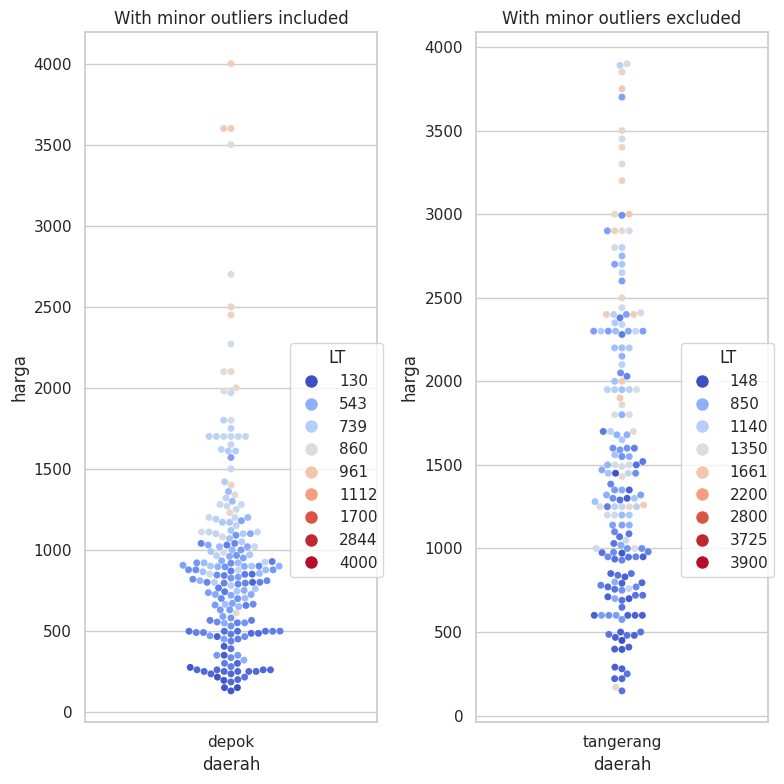

In [160]:
two_swarmplots(df_1=df[(df['daerah']=='depok')& (df['harga'] <= 4e3)], df_2=df[(df['daerah']=='tangerang')& (df['harga'] <= 4e3)], x_1='daerah', x_2='daerah',
               y_1='harga', y_2='harga', hue_1='LT',
               hue_2='LT',
               title1='With minor outliers included',
               title2="With minor outliers excluded",
               figsize=(8, 8))

<ipython-input-101-5e921ad3cd5d>:35: UserWarning: The palette list has more values (117) than needed (69), which may not be intended.
  sns.swarmplot(data=df_1, x=x_1, y=y_1, hue=hue_1, ax=axes[0], s=5, palette=custom_palette)
<ipython-input-101-5e921ad3cd5d>:39: UserWarning: The palette list has more values (117) than needed (74), which may not be intended.
  sns.swarmplot(data=df_2, x=x_2, y=y_2, hue=hue_2, ax=axes[1], s=5, palette=custom_palette)


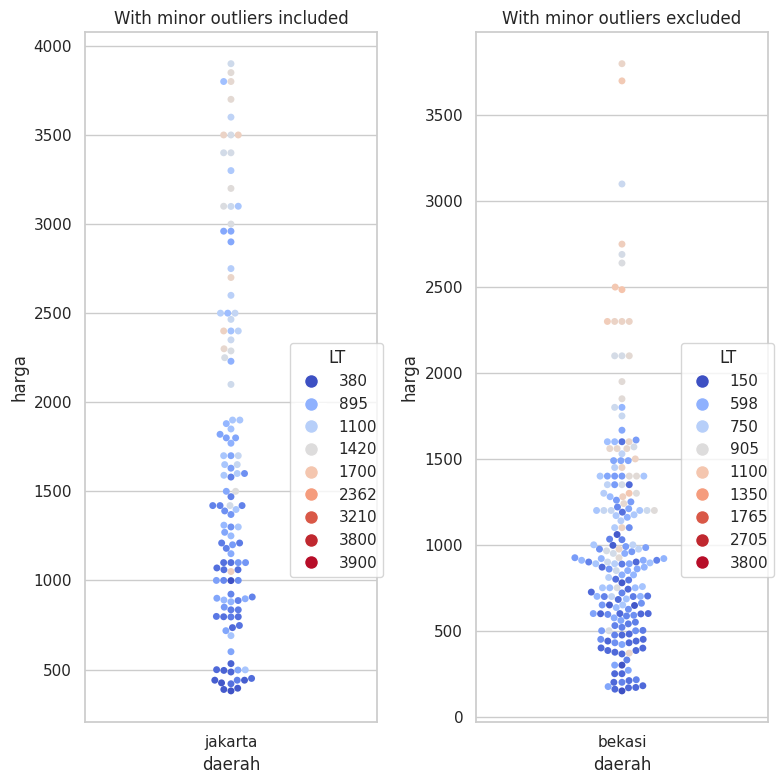

In [161]:
two_swarmplots(df_1=df[(df['daerah']=='jakarta')& (df['harga'] <= 4e3)], df_2=df[(df['daerah']=='bekasi')& (df['harga'] <= 4e3)], x_1='daerah', x_2='daerah',
               y_1='harga', y_2='harga', hue_1='LT',
               hue_2='LT',
               title1='With minor outliers included',
               title2="With minor outliers excluded",
               figsize=(8, 8))

<ipython-input-101-5e921ad3cd5d>:35: UserWarning: The palette list has more values (145) than needed (103), which may not be intended.
  sns.swarmplot(data=df_1, x=x_1, y=y_1, hue=hue_1, ax=axes[0], s=5, palette=custom_palette)
<ipython-input-101-5e921ad3cd5d>:39: UserWarning: The palette list has more values (145) than needed (73), which may not be intended.
  sns.swarmplot(data=df_2, x=x_2, y=y_2, hue=hue_2, ax=axes[1], s=5, palette=custom_palette)


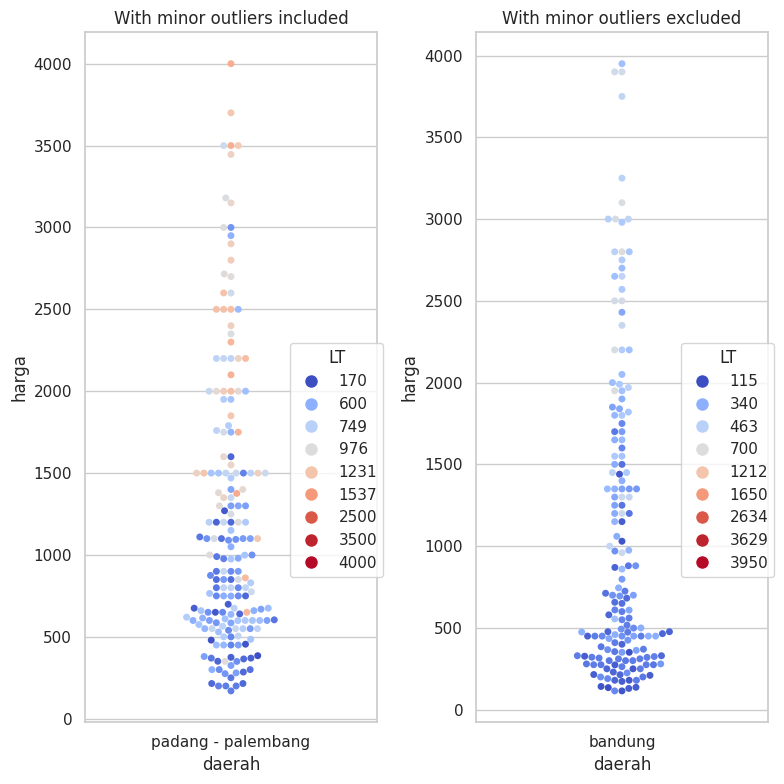

In [162]:
two_swarmplots(df_1=df[(df['daerah']=='padang - palembang')& (df['harga'] <= 4e3)], df_2=df[(df['daerah']=='bandung')& (df['harga'] <= 4e3)], x_1='daerah', x_2='daerah',
               y_1='harga', y_2='harga', hue_1='LT',
               hue_2='LT',
               title1='With minor outliers included',
               title2="With minor outliers excluded",
               figsize=(8, 8))

<ipython-input-101-5e921ad3cd5d>:35: UserWarning: The palette list has more values (110) than needed (73), which may not be intended.
  sns.swarmplot(data=df_1, x=x_1, y=y_1, hue=hue_1, ax=axes[0], s=5, palette=custom_palette)
<ipython-input-101-5e921ad3cd5d>:39: UserWarning: The palette list has more values (110) than needed (68), which may not be intended.
  sns.swarmplot(data=df_2, x=x_2, y=y_2, hue=hue_2, ax=axes[1], s=5, palette=custom_palette)


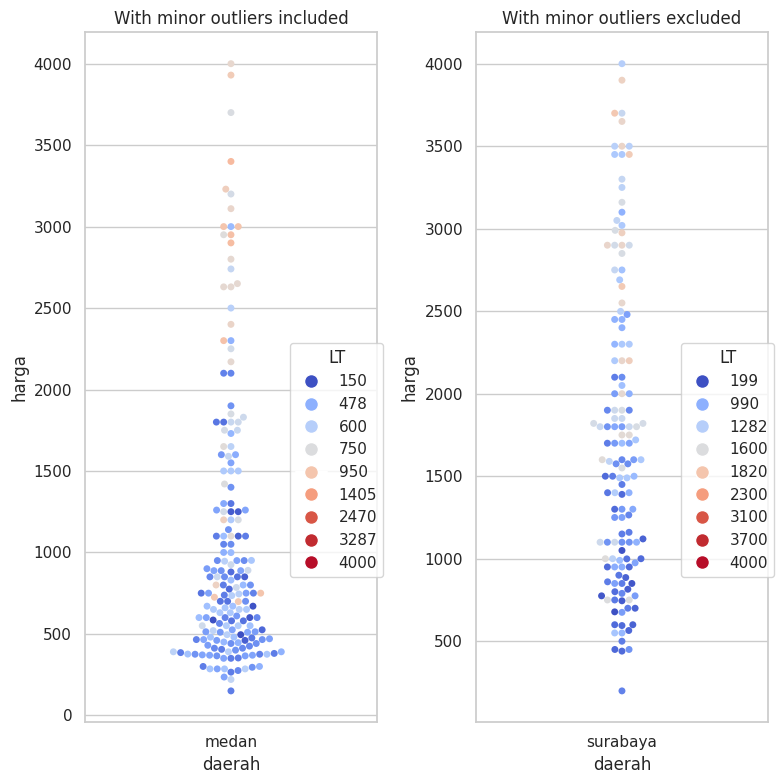

In [163]:
two_swarmplots(df_1=df[(df['daerah']=='medan')& (df['harga'] <= 4e3)], df_2=df[(df['daerah']=='surabaya')& (df['harga'] <= 4e3)], x_1='daerah', x_2='daerah',
               y_1='harga', y_2='harga', hue_1='LT',
               hue_2='LT',
               title1='With minor outliers included',
               title2="With minor outliers excluded",
               figsize=(8, 8))

<ipython-input-101-5e921ad3cd5d>:35: UserWarning: The palette list has more values (127) than needed (93), which may not be intended.
  sns.swarmplot(data=df_1, x=x_1, y=y_1, hue=hue_1, ax=axes[0], s=5, palette=custom_palette)
<ipython-input-101-5e921ad3cd5d>:39: UserWarning: The palette list has more values (127) than needed (77), which may not be intended.
  sns.swarmplot(data=df_2, x=x_2, y=y_2, hue=hue_2, ax=axes[1], s=5, palette=custom_palette)


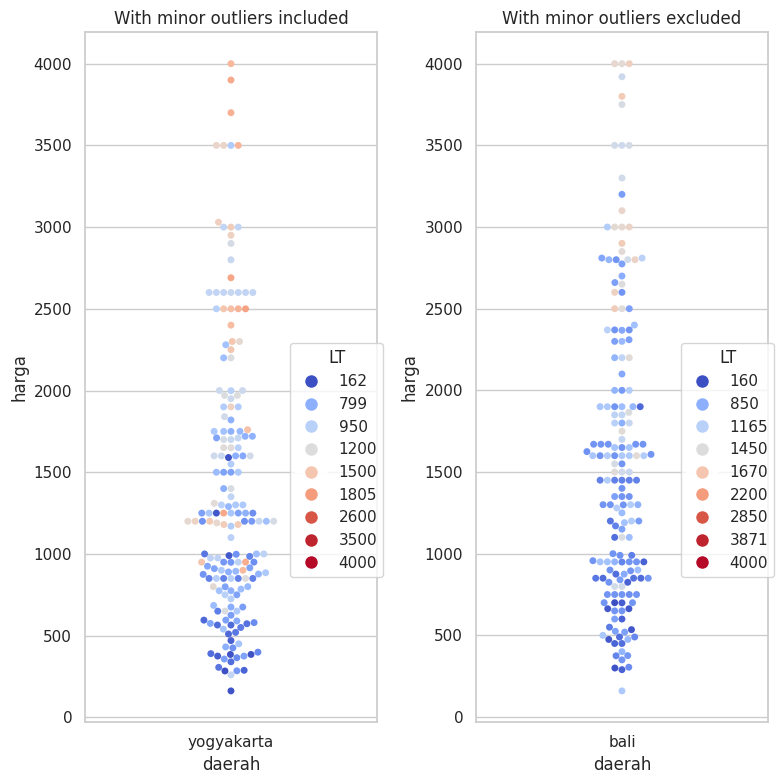

In [164]:
two_swarmplots(df_1=df[(df['daerah']=='yogyakarta')& (df['harga'] <= 4e3)], df_2=df[(df['daerah']=='bali')& (df['harga'] <= 4e3)], x_1='daerah', x_2='daerah',
               y_1='harga', y_2='harga', hue_1='LT',
               hue_2='LT',
               title1='With minor outliers included',
               title2="With minor outliers excluded",
               figsize=(8, 8))

<ipython-input-101-5e921ad3cd5d>:35: UserWarning: The palette list has more values (147) than needed (66), which may not be intended.
  sns.swarmplot(data=df_1, x=x_1, y=y_1, hue=hue_1, ax=axes[0], s=5, palette=custom_palette)
<ipython-input-101-5e921ad3cd5d>:39: UserWarning: The palette list has more values (147) than needed (105), which may not be intended.
  sns.swarmplot(data=df_2, x=x_2, y=y_2, hue=hue_2, ax=axes[1], s=5, palette=custom_palette)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


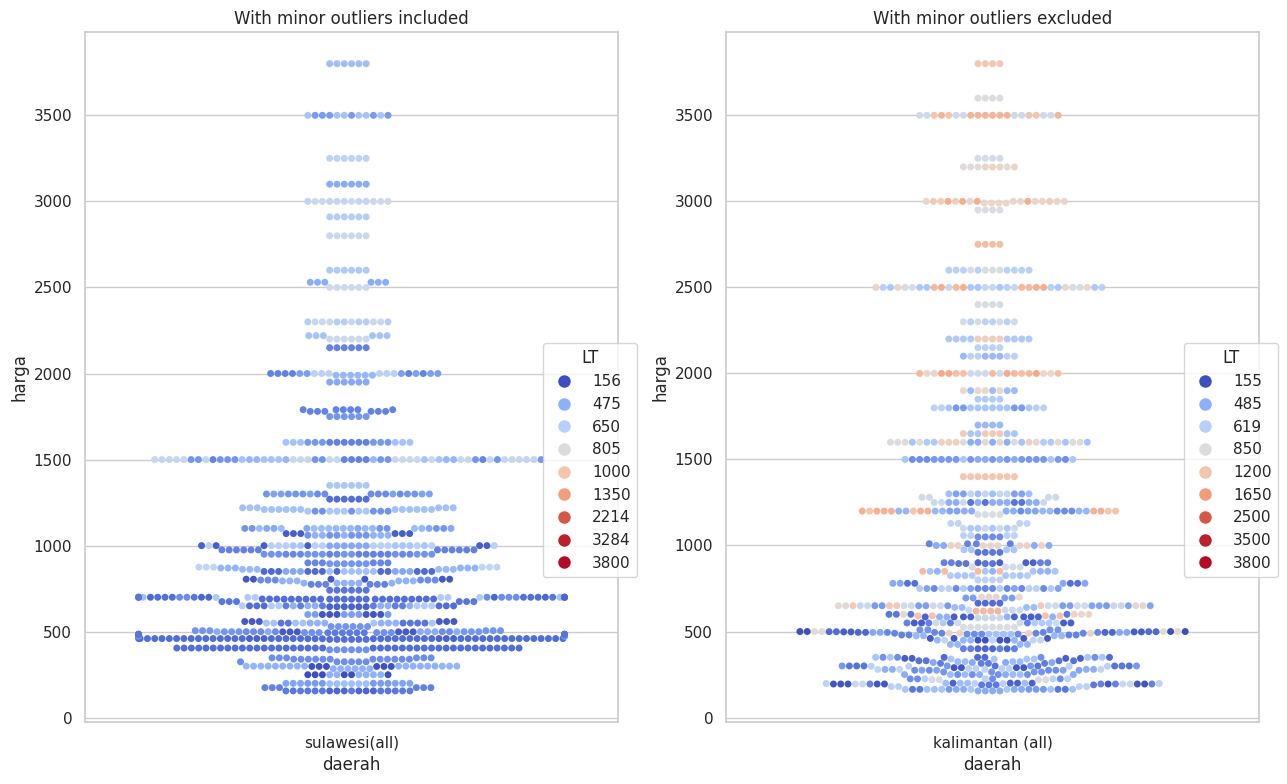

In [165]:
two_swarmplots(df_1=df[(df['daerah']=='sulawesi(all)')& (df['harga'] <= 4e3)], df_2=df[(df['daerah']=='kalimantan (all)')& (df['harga'] <= 4e3)], x_1='daerah', x_2='daerah',
               y_1='harga', y_2='harga', hue_1='LT',
               hue_2='LT',
               title1='With minor outliers included',
               title2="With minor outliers excluded",
               figsize=(13, 8))

####Conclusion and Comments

Kami bisa memilih rumah dengan representasi luas tanah apabila memang hal tersebut yang dianggap terpenting, dengan luas bangunan yang bisa ditampilkan juga, tetapi untuk kali ini kami cukup gunakan luas tanah sebagai indikator.
Kami asumsikan bahwa perusahaan mampu mengurus seluruh rumah yang tersedia pada setiap daerah yang ada, meskipun beberapa rumah yang dipilih bisa pada daerah yang berbeda. Pada seluruh swarm plot yang sudah dibuat untuk setiap daerah dapat dipilih rumah dengan harga rendah, tetapi dengan warna yang lebih dekat dengan warna merah dan jauh dari biru tua sebagai indikator luas tanah lebih besar. Kami juga lebih menyarankan menginvestasikan rumah yang cenderung di daerah-daerah yang sudah kami rekomendasikan untuk membuka cabang, kecuali memang ada rumah di daerah lain yang sangat berharga untuk tetap dibeli. Untuk pemilihan rumah yang spesifik, dibutuhkan beberapa tambahan informasi lagi dengan survei langsung untuk kepastian kesiapan rumah tersebut untuk menjadi bahan investasi.

###No. 7
---
**Dan yang terpenting, informasi berharga apa lagi yang bisa anda dapatkan dari data?**

####Explore the Plots

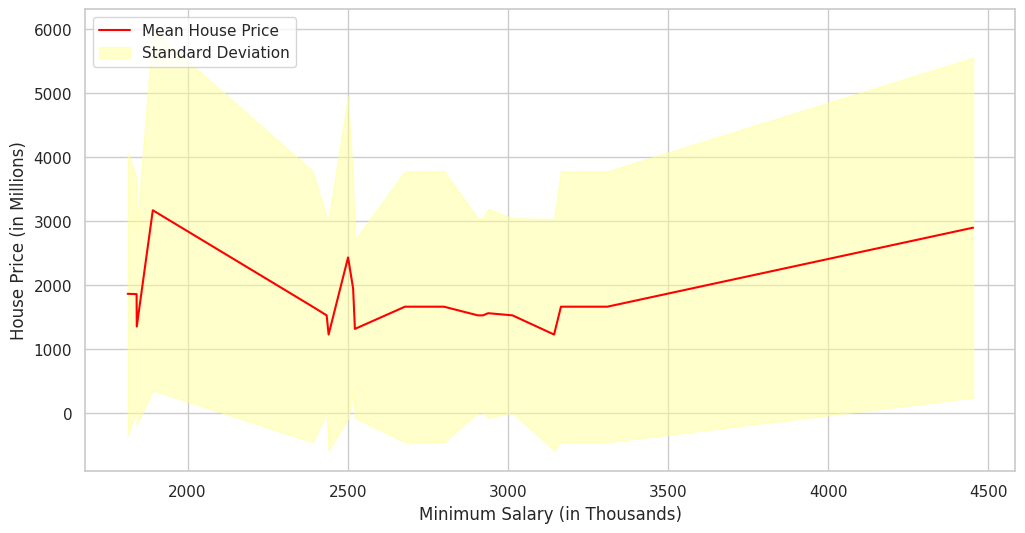

In [145]:
# Create a scatter plot
plt.figure(figsize=(12, 6))
# Scale down the minimum salary
df['ScaledMinimumSalary'] = df['SALARY'] / 1000
# Group the data by 'ScaledMinimumSalary' and calculate mean and standard deviation of 'harga'
mean_prices = df.groupby('ScaledMinimumSalary')['harga'].mean()
std_prices = df.groupby('ScaledMinimumSalary')['harga'].std()
x_values = mean_prices.index

# Create the line plot with a red line
sns.lineplot(x=x_values, y=mean_prices, label='Mean House Price', color='red')

# Fill the area between the mean - std and mean + std with a tamer yellow shade
plt.fill_between(x_values, mean_prices - std_prices, mean_prices + std_prices, alpha=0.5, color='#FFFF99', label='Standard Deviation')

# Add labels and legend
plt.xlabel('Minimum Salary (in Thousands)')
plt.ylabel('House Price (in Millions)')
plt.legend(loc='upper left')

plt.show()

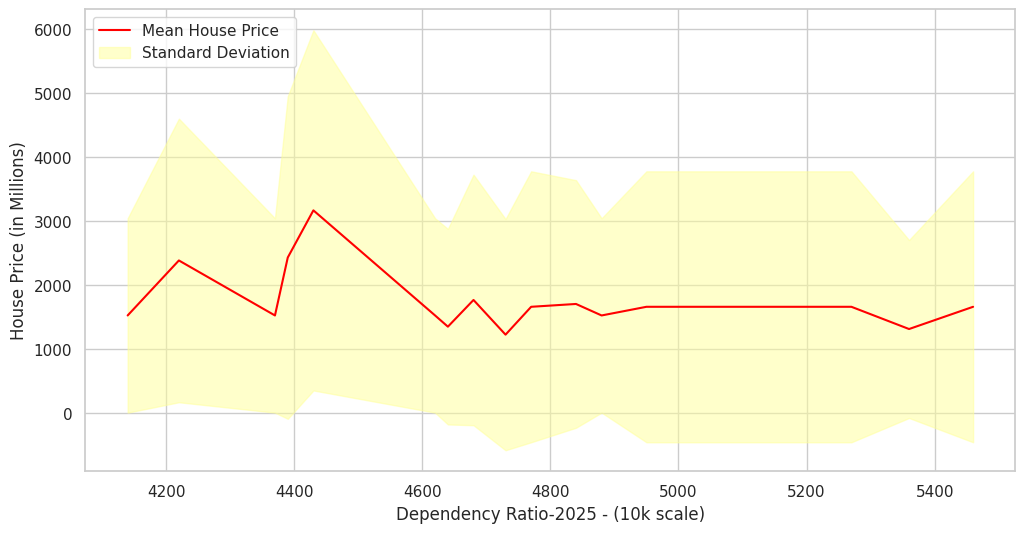

In [148]:
# Create a scatter plot
plt.figure(figsize=(12, 6))
# Scale down the minimum Dependency Ratio-2025
df['ScaledDependency Ratio-2025'] = df['Dependency Ratio-2025'] *100
# Group the data by 'ScaledDependency Ratio-2025' and calculate mean and standard deviation of 'harga'
mean_prices = df.groupby('ScaledDependency Ratio-2025')['harga'].mean()
std_prices = df.groupby('ScaledDependency Ratio-2025')['harga'].std()
x_values = mean_prices.index

# Create the line plot with a red line
sns.lineplot(x=x_values, y=mean_prices, label='Mean House Price', color='red')

# Fill the area between the mean - std and mean + std with a tamer yellow shade
plt.fill_between(x_values, mean_prices - std_prices, mean_prices + std_prices, alpha=0.5, color='#FFFF99', label='Standard Deviation')

# Add labels and legend
plt.xlabel('Dependency Ratio-2025 - (10k scale)')
plt.ylabel('House Price (in Millions)')
plt.legend(loc='upper left')

plt.show()

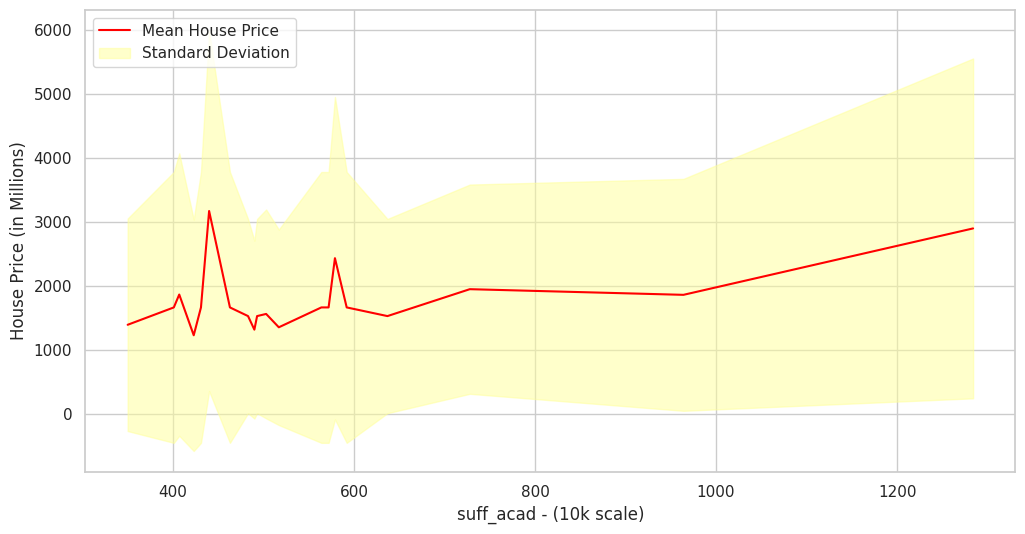

In [149]:
# Create a scatter plot
plt.figure(figsize=(12, 6))
# Scale down the minimum suff_acad
df['Scaledsuff_acad'] = df['suff_acad'] *100
# Group the data by 'Scaledsuff_acad' and calculate mean and standard deviation of 'harga'
mean_prices = df.groupby('Scaledsuff_acad')['harga'].mean()
std_prices = df.groupby('Scaledsuff_acad')['harga'].std()
x_values = mean_prices.index

# Create the line plot with a red line
sns.lineplot(x=x_values, y=mean_prices, label='Mean House Price', color='red')

# Fill the area between the mean - std and mean + std with a tamer yellow shade
plt.fill_between(x_values, mean_prices - std_prices, mean_prices + std_prices, alpha=0.5, color='#FFFF99', label='Standard Deviation')

# Add labels and legend
plt.xlabel('suff_acad - (10k scale)')
plt.ylabel('House Price (in Millions)')
plt.legend(loc='upper left')

plt.show()

####Conclusion and Comments

---
Hal yang cukup menarik adalah, berkebalikan dengan dugaan awal kami, karakteristik masyarakat tidak menimbulkan tren yang jelas terhadap harga rumah. Sebagaimana visualisasi yang diberikan di atas, hal-hal seperti gaji minimum, tingkat literasi, tingkat pendidikan, hingga rasio ketergantungan yang cukup umum untuk berkorelasi terhadap pendapatan tidak begitu terlihat pengaruhnya terhadap harga rumah di suatu daerah. Ini berarti harga rumah di suatu daerah tidak begitu berkorelasi dengan kualitas dan pendapatan umum masyarakat di daerah tersebut. Hal ini bisa membantu dalam mengurangi pengeluaran biaya khusus yang memang digunakan dengan asumsi bahwa karakteristik masyarakat pada daerah tertentu menyebabkan perbedaan harga rumah.

####Analysis of Outliers

In [150]:
df_highend

LT     LB   KT   KM  garasi  carport sertifikat  listrik      harga  \
2924  145.0  126.0  3.0  3.0     NaN      1.0        shm   2200.0  1500000.0   
3707  250.0  436.0  5.0  3.0     0.0      0.0        shm   6600.0  2500000.0   

     daerah     SALARY  Dependency Ratio-2025  Population Urban (%)  \
2924  medan  2522609.0                   53.6                 49.16   
3707   bali  2516971.0                   42.2                 60.21   

      Population Rural (%)  Literacy rate  low_acad  suff_acad  
2924                 50.84      93.655688     92.61       4.90  
3707                 39.79      88.008569     91.13       7.28

---
Terdapat 2 outlier yang sebelumnya sudah dipisahkan karena harganya yang sangat tinggi. Masing-masing berharga 1.5 dan 2.5 Triliun rupiah dan berasal dari Medan dan Bali dengan luas tanah dan luas bangunan yang sangat luas sehingga memang merupakan rumah yang sangat mewah.

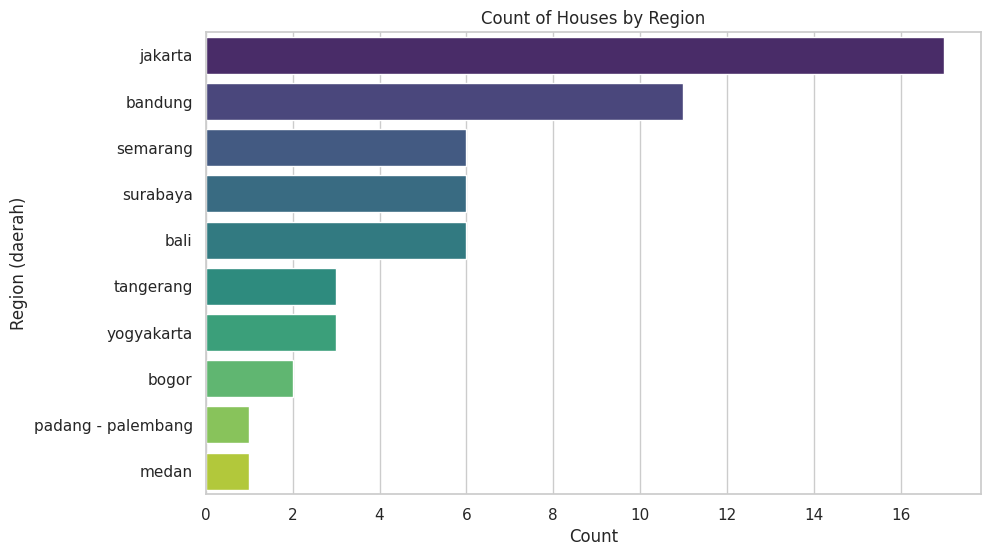

In [152]:
# Create a countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_high, y='daerah', order=df_high['daerah'].value_counts().index, palette='viridis')

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Region (daerah)')
plt.title('Count Rumah Mahal per Daerah')

plt.show()

---
Outlier minor yang dipisah adalah rumah-rumah yang berharga di atas 15 Milyar rupiah. Dengan visualisasi countplot sederhana, dapat dilihat bahwa Jakarta memiliki rumah dengan harga tinggi terbanyak, diikuti oleh Bandung. Apabila suatu saat nanti perusahaan ada ketertarikan untuk memiliki target pasaran yang berpenghasilan cukup tinggi dan mencari rumah yang cukup mewah atau perusahaan ingin mengantisipasi wilayah yang berkemungkinan akan terjual rumah dengan biaya yang tinggi, maka kedua daerah tersebut adalah daerah terutama yang perlu diperhatikan. Surabaya, sebagai kota yang kami rekomendasikan sebelumnya sebagai lokasi pembukaan cabang apabila perusahaan cukup tertarik dalam daerah dengan harga rumah yang cukup mahal juga ditemukan 6 rumah yang cukup mahal sebagai argumen tambahan untuk daerah yang tetap cukup strategis dalam tujuan menargetkan pasar rumah yang cukup mahal.

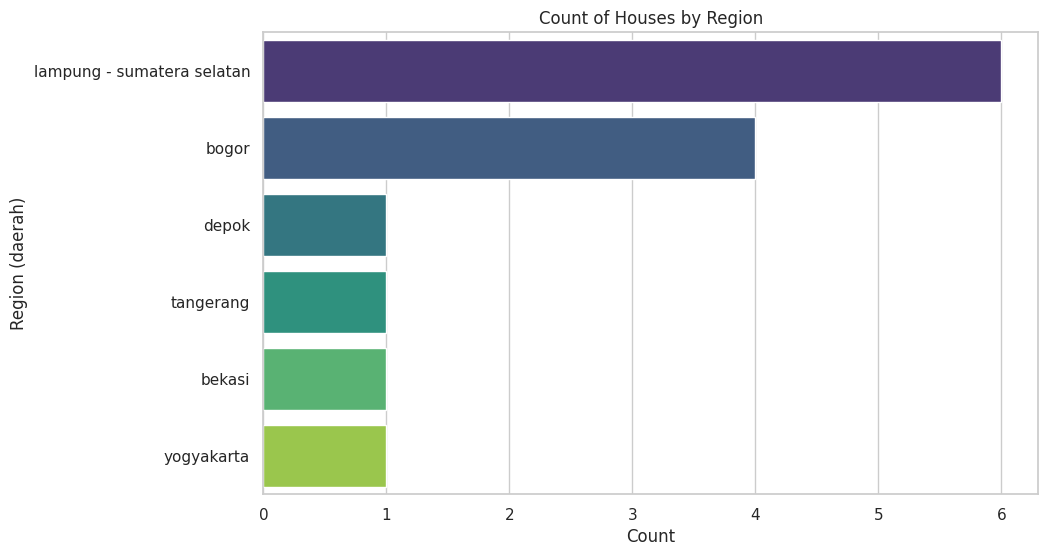

In [153]:
# Create a countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_low, y='daerah', order=df_low['daerah'].value_counts().index, palette='viridis')

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Region (daerah)')
plt.title('Count Rumah Murah per Daerah')

plt.show()

---
Outlier minor bawah yang dipisah adalah rumah-rumah yang berharga di bawah 100 Juta rupiah. Dengan visualisasi countplot sederhana, dapat dilihat bahwa Lampung - Sumatera Selatan memiliki rumah dengan harga rendah terbanyak, diikuti oleh Bogor. Apabila perusahaan sedang membutuhkan informasi terkait daerah dengan rumah berharga terendah, kedua lokasi tersebut yang perlu diperhatikan berhubung di daerah lainnya yang ada pada visualisasi hanya berjumlah 1.

In [155]:
result.sort_values(by='SALARY', ascending=False)

Province     SALARY  Dependency Ratio-2025  \
2                      Jakarta  4452724.0              42.200000   
6           Padang - Palembang  2938564.0              48.400000   
8                Sulawesi(All)  2842896.0              50.283333   
3             Kalimantan (All)  2819453.5              45.025000   
4   Lampung - Sumatera selatan  2792466.0              47.300000   
5                        Medan  2522609.0              53.600000   
0                         Bali  2516971.0              42.200000   
10                   Tangerang  2501203.0              43.900000   
9                     Surabaya  1891567.0              44.300000   
1                        Bogor  1841487.0              46.400000   
11                  Yogyakarta  1840951.0              46.800000   
7                     Semarang  1813011.0              48.400000   

    Population Urban (%)  Population Rural (%)  Literacy rate   low_acad  \
2             100.000000              0.000000      97.551815  82.920000   
6              39.170000             60.830000      94.214608  93.050000   
8              31.741667             68.258333      88.941371  93.166667   
3              41.950000             58.050000      92.472526  93.490000   
4              30.745000             69.255000      93.382200  94.840000   
5              49.160000             50.840000      93.655688  92.610000   
0              60.210000             39.790000      88.008569  91.130000   
10             67.010000             32.990000      93.744602  92.150000   
9              47.580000             52.420000      88.108246  93.910000   
1              65.690000             34.310000      93.872261  92.960000   
11             66.440000             33.560000      89.732036  86.310000   
7              45.720000             54.280000      89.875142  94.410000   

    suff_acad  
2   12.840000  
6    5.030000  
8    5.038333  
3    4.907500  
4    3.865000  
5    4.900000  
0    7.280000  
10   5.790000  
9    4.400000  
1    5.170000  
11   9.640000  
7    4.070000

---
Secara gaji minimum murni, Jakarta dengan tingkat literasi dan gaji minimum tertinggi memiliki jumlah rumah mahal terbanyak, sedangkan Bandung (yang direpresentasikan oleh Bogor sebagai sesama provinsi Jawa Barat) memiliki gaji minimum dan tingkat literasi yang tergolong rendah dibanding provinsi lainnya, tetapi tetap memiliki jumlah rumah dengan harga tinggi yang cukup banyak. Mungkin dibutuhkan data yang lebih spesifik khusus Bandung saja, tetapi untuk saat ini kami menyarankan untuk mengurus rumah dari Bandung dengan pertimbangan hal ini berhubung harga yang ditawarkan dengan kapabilitas masyarakat yang ada sekilas terlihat kurang cocok.

####Additional Certificate by Region Brief Analysis

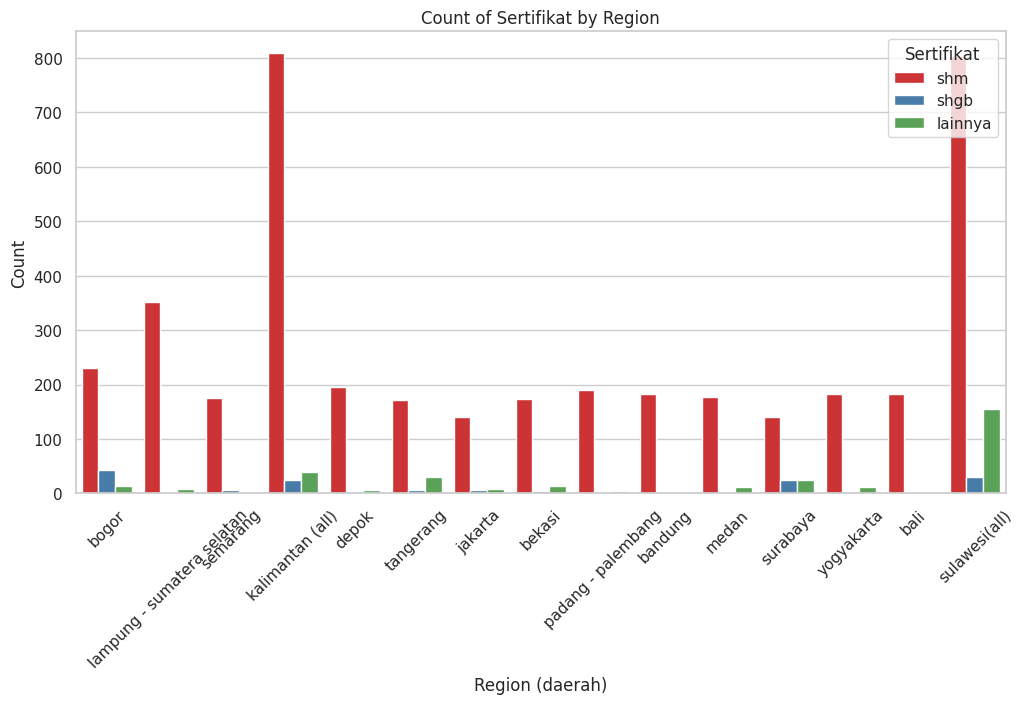

In [167]:
# Create a countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='daerah', hue='sertifikat', palette='Set1')

# Customize the plot
plt.xlabel('Region (daerah)')
plt.ylabel('Count')
plt.title('Count Sertifikat per Daerah')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the legend
plt.legend(title='Sertifikat', loc='upper right')

plt.show()

---
Dengan visualisasi di atas, terlihat bahwa dengan konsisten semua rumah pada setiap daerah mayoritas memiliki sertifikat SHM, tetapi dengan catatan bahwa di Sulawesi memiliki yang memiliki proporsi sertifikat lainnya yang cukup tinggi dibanding daerah lainnya. Hal ini mungkin bisa dikaitkan dengan kondisi di sana yang bisa dianalisis lebih lagi dengan data tambahan yang saat ini belum dimiliki.